# Reconnaissance d’écriture par réseaux de neurones



## Information importante:<br> Lors de ce TP, il nous semble que les scores trouvés ne soient peut être pas ceux qui sont attendus,si c'est effectivement le cas, cela fausserait la majorité des résultats, nous avons donc tenté d'apporter des conclusions exhaustives afin d'éviter de trop nous pénaliser.


# 1. Analyse des données
## Chargement de la base de données digits disponible sous sklearn

In [41]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import time
import seaborn as sn
from sklearn import *
from sklearn.linear_model import *
from sklearn.neural_network import *
from sklearn.neighbors import KNeighborsClassifier
digits = load_digits()

## Affichage d'une image

<Figure size 432x288 with 0 Axes>

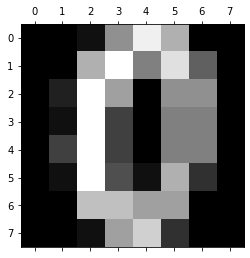

In [4]:
plt.gray()
plt.matshow(digits.images[10])
plt.show()

## Récupération des données et des labels

In [5]:
X = digits.data
y = digits.target

## Affichage du nombre d'exemples par classe

In [6]:
print("Il y a ", y.size , "exemples en tout dans le dataset dont :")
[print ( digits.data[digits.target == a].shape[0], "exemples d'images de",a) for a in list(range(10))]


Il y a  1797 exemples en tout dans le dataset dont :
178 exemples d'images de 0
182 exemples d'images de 1
177 exemples d'images de 2
183 exemples d'images de 3
181 exemples d'images de 4
182 exemples d'images de 5
181 exemples d'images de 6
179 exemples d'images de 7
174 exemples d'images de 8
180 exemples d'images de 9


[None, None, None, None, None, None, None, None, None, None]

## Dimensionalité des données

In [7]:
print("les données ont", X.shape[1], "dimensions")
print("Chaque dimension correspond à un pixel, qui peut prendre les valeurs:",np.unique(X))

les données ont 64 dimensions
Chaque dimension correspond à un pixel, qui peut prendre les valeurs: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


## Séparation en base d'apprentissage et base de test

In [64]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3)

# 2. Apprentissage
## Etude de l'influence du nombre de neurones de la couche cachée sur le résultat (attention, ce calcul a un temps d'éxécution significatif)

In [121]:
clfArray = []
clfResultsTrain = []
clfResultsTest = []
i = 0;
for numNeuroneCache in [int(1.25**x) for x in range(5,39)]:
    localClfArray = []
    localClfResultsTest = []
    localClfResultsTrain = []
    for iterateur in range (3): 
        print("Entrainement, avec C=", numNeuroneCache)
        print("Itération numéro : ", iterateur)
        localClfArray.append(MLPClassifier(hidden_layer_sizes=numNeuroneCache,max_iter=500, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=1))
        localClfArray[iterateur].fit(X_train,y_train)
        localClfResultsTest.append(localClfArray[iterateur].score(X_test,y_test))
        localClfResultsTrain.append(localClfArray[iterateur].score(X_train,y_train))
    clfArray.append(localClfArray)
    clfResultsTest.append(localClfResultsTest)
    clfResultsTrain.append(localClfResultsTrain)
    i += 1

Entrainement, avec C= 3
Itération numéro :  0
Iteration 1, loss = 2.30562624
Iteration 2, loss = 2.29088100
Iteration 3, loss = 2.15802719
Iteration 4, loss = 2.08805267
Iteration 5, loss = 2.13161461
Iteration 6, loss = 2.00688807
Iteration 7, loss = 1.99141456
Iteration 8, loss = 1.91148343
Iteration 9, loss = 1.93949850
Iteration 10, loss = 1.90924877
Iteration 11, loss = 1.94080392
Iteration 12, loss = 1.90149804
Iteration 13, loss = 1.89340398
Iteration 14, loss = 1.87772949
Iteration 15, loss = 2.02368570
Iteration 16, loss = 1.87140695
Iteration 17, loss = 1.87758766
Iteration 18, loss = 1.85005439
Iteration 19, loss = 1.88593422
Iteration 20, loss = 1.90628171
Iteration 21, loss = 1.70630750
Iteration 22, loss = 1.55102565
Iteration 23, loss = 1.56170018
Iteration 24, loss = 1.48470226
Iteration 25, loss = 1.44856416
Iteration 26, loss = 1.38980818
Iteration 27, loss = 1.40837277
Iteration 28, loss = 1.42554990
Iteration 29, loss = 1.35894486
Iteration 30, loss = 1.33920952
Ite

Iteration 11, loss = 1.91701958
Iteration 12, loss = 2.03438099
Iteration 13, loss = 1.94068217
Iteration 14, loss = 1.88117597
Iteration 15, loss = 1.98219148
Iteration 16, loss = 1.89239075
Iteration 17, loss = 1.95106993
Iteration 18, loss = 1.92097815
Iteration 19, loss = 1.92356927
Iteration 20, loss = 1.91631341
Iteration 21, loss = 1.95804994
Iteration 22, loss = 1.91026566
Iteration 23, loss = 1.91429206
Iteration 24, loss = 1.90166034
Iteration 25, loss = 1.84370981
Iteration 26, loss = 1.60192962
Iteration 27, loss = 1.52987266
Iteration 28, loss = 1.56014847
Iteration 29, loss = 1.49613033
Iteration 30, loss = 1.49280667
Iteration 31, loss = 1.49793441
Iteration 32, loss = 1.50675734
Iteration 33, loss = 1.46922322
Iteration 34, loss = 1.57984103
Iteration 35, loss = 1.48240172
Iteration 36, loss = 1.47843575
Iteration 37, loss = 1.46156336
Iteration 38, loss = 1.43238119
Iteration 39, loss = 1.42080793
Iteration 40, loss = 1.43500726
Iteration 41, loss = 1.43915315
Iteratio

Iteration 37, loss = 1.45944921
Iteration 38, loss = 1.40079208
Iteration 39, loss = 1.34411082
Iteration 40, loss = 1.37484622
Iteration 41, loss = 1.33458832
Iteration 42, loss = 1.31344442
Iteration 43, loss = 1.30838380
Iteration 44, loss = 1.41337847
Iteration 45, loss = 1.35469036
Iteration 46, loss = 1.37280603
Iteration 47, loss = 1.43745002
Iteration 48, loss = 1.40117050
Iteration 49, loss = 1.36795462
Iteration 50, loss = 1.35053601
Iteration 51, loss = 1.33251408
Iteration 52, loss = 1.37776582
Iteration 53, loss = 1.34631353
Iteration 54, loss = 1.33500546
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 55, loss = 1.38459504
Iteration 56, loss = 1.31090534
Iteration 57, loss = 1.28683355
Iteration 58, loss = 1.27920127
Iteration 59, loss = 1.28669772
Iteration 60, loss = 1.27693424
Iteration 61, loss = 1.27622456
Iteration 62, loss = 1.27839080
Iteration 63, loss = 1.27824311
Iteration 64, loss = 1

Iteration 106, loss = 1.33837405
Iteration 107, loss = 1.34215611
Iteration 108, loss = 1.33455770
Iteration 109, loss = 1.33468769
Iteration 110, loss = 1.33691762
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 111, loss = 1.33111192
Iteration 112, loss = 1.32881901
Iteration 113, loss = 1.32875434
Iteration 114, loss = 1.32864649
Iteration 115, loss = 1.32956159
Iteration 116, loss = 1.32936673
Iteration 117, loss = 1.32384036
Iteration 118, loss = 1.32731161
Iteration 119, loss = 1.32554370
Iteration 120, loss = 1.32302369
Iteration 121, loss = 1.32318224
Iteration 122, loss = 1.32277416
Iteration 123, loss = 1.32273334
Iteration 124, loss = 1.32265270
Iteration 125, loss = 1.32267142
Iteration 126, loss = 1.32262537
Iteration 127, loss = 1.32265835
Iteration 128, loss = 1.32253727
Iteration 129, loss = 1.32257169
Iteration 130, loss = 1.32252154
Iteration 131, loss = 1.32245720
Iteration 132, loss = 1.3224

Iteration 155, loss = 1.74744048
Iteration 156, loss = 1.74744040
Iteration 157, loss = 1.74744015
Iteration 158, loss = 1.74744011
Iteration 159, loss = 1.74743981
Iteration 160, loss = 1.74743981
Iteration 161, loss = 1.74743938
Iteration 162, loss = 1.74743934
Iteration 163, loss = 1.74743901
Iteration 164, loss = 1.74743887
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Entrainement, avec C= 3
Itération numéro :  2
Iteration 1, loss = 2.33592699
Iteration 2, loss = 2.12824090
Iteration 3, loss = 1.97520125
Iteration 4, loss = 1.94135093
Iteration 5, loss = 1.86375391
Iteration 6, loss = 1.89248519
Iteration 7, loss = 1.87360965
Iteration 8, loss = 1.88109774
Iteration 9, loss = 1.80517378
Iteration 10, loss = 1.84206716
Iteration 11, loss = 1.78850864
Iteration 12, loss = 1.78536419
Iteration 13, loss = 1.85198713
Iteration 14, loss = 1.81805121
Iteration 15, loss = 1.84715691
Iteration 16, loss = 1.83677623
Iterat

Iteration 91, loss = 0.73619699
Iteration 92, loss = 0.72983731
Iteration 93, loss = 0.72447121
Iteration 94, loss = 0.73184227
Iteration 95, loss = 0.75637967
Iteration 96, loss = 0.73769429
Iteration 97, loss = 0.73780363
Iteration 98, loss = 0.73735900
Iteration 99, loss = 0.74858540
Iteration 100, loss = 0.74024648
Iteration 101, loss = 0.72669659
Iteration 102, loss = 0.72633394
Iteration 103, loss = 0.73724144
Iteration 104, loss = 0.72780633
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 105, loss = 0.72430194
Iteration 106, loss = 0.72054493
Iteration 107, loss = 0.72002960
Iteration 108, loss = 0.71809690
Iteration 109, loss = 0.71616839
Iteration 110, loss = 0.71642659
Iteration 111, loss = 0.71613151
Iteration 112, loss = 0.71603855
Iteration 113, loss = 0.71623860
Iteration 114, loss = 0.71579002
Iteration 115, loss = 0.71583062
Iteration 116, loss = 0.71596466
Iteration 117, loss = 0.71616248
Iter

Iteration 146, loss = 1.20112330
Iteration 147, loss = 1.20084482
Iteration 148, loss = 1.20036307
Iteration 149, loss = 1.19834841
Iteration 150, loss = 1.19773881
Iteration 151, loss = 1.19747531
Iteration 152, loss = 1.19804148
Iteration 153, loss = 1.19726833
Iteration 154, loss = 1.19802915
Iteration 155, loss = 1.19681016
Iteration 156, loss = 1.19654026
Iteration 157, loss = 1.19656292
Iteration 158, loss = 1.19654972
Iteration 159, loss = 1.19651948
Iteration 160, loss = 1.19645890
Iteration 161, loss = 1.19646207
Iteration 162, loss = 1.19641563
Iteration 163, loss = 1.19641701
Iteration 164, loss = 1.19637962
Iteration 165, loss = 1.19640537
Iteration 166, loss = 1.19636164
Iteration 167, loss = 1.19633097
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 168, loss = 1.19586683
Iteration 169, loss = 1.19585955
Iteration 170, loss = 1.19585534
Iteration 171, loss = 1.19586597
Iteration 172, loss = 1.1958

Iteration 15, loss = 1.15242780
Iteration 16, loss = 1.17425334
Iteration 17, loss = 1.15259146
Iteration 18, loss = 1.10099973
Iteration 19, loss = 1.08185373
Iteration 20, loss = 1.09351211
Iteration 21, loss = 1.10901839
Iteration 22, loss = 1.22383262
Iteration 23, loss = 1.18101351
Iteration 24, loss = 0.98069745
Iteration 25, loss = 1.11466789
Iteration 26, loss = 0.87021810
Iteration 27, loss = 0.95892653
Iteration 28, loss = 0.90642670
Iteration 29, loss = 0.85688554
Iteration 30, loss = 0.85173605
Iteration 31, loss = 0.98170805
Iteration 32, loss = 0.94769757
Iteration 33, loss = 0.98858419
Iteration 34, loss = 0.90356809
Iteration 35, loss = 0.97792453
Iteration 36, loss = 0.84020283
Iteration 37, loss = 0.84377747
Iteration 38, loss = 0.86303633
Iteration 39, loss = 0.82491098
Iteration 40, loss = 0.86721165
Iteration 41, loss = 0.87754553
Iteration 42, loss = 0.85823898
Iteration 43, loss = 0.83845965
Iteration 44, loss = 0.91238504
Iteration 45, loss = 1.01551578
Iteratio

Iteration 1, loss = 2.29936966
Iteration 2, loss = 2.18574083
Iteration 3, loss = 2.11194405
Iteration 4, loss = 2.08980693
Iteration 5, loss = 2.05109171
Iteration 6, loss = 2.02425269
Iteration 7, loss = 2.01058492
Iteration 8, loss = 2.01743514
Iteration 9, loss = 1.97253009
Iteration 10, loss = 1.91263709
Iteration 11, loss = 1.88455125
Iteration 12, loss = 1.89825258
Iteration 13, loss = 1.93813096
Iteration 14, loss = 1.85531366
Iteration 15, loss = 1.84552612
Iteration 16, loss = 1.85684015
Iteration 17, loss = 1.86353611
Iteration 18, loss = 1.86787746
Iteration 19, loss = 1.83641302
Iteration 20, loss = 1.82949212
Iteration 21, loss = 1.81867615
Iteration 22, loss = 1.88141464
Iteration 23, loss = 1.81318407
Iteration 24, loss = 1.81275768
Iteration 25, loss = 1.80109258
Iteration 26, loss = 1.77923290
Iteration 27, loss = 1.83470626
Iteration 28, loss = 1.82806403
Iteration 29, loss = 1.79565393
Iteration 30, loss = 1.76362878
Iteration 31, loss = 1.81046729
Iteration 32, los

Iteration 62, loss = 1.46582610
Iteration 63, loss = 1.51618679
Iteration 64, loss = 1.52407134
Iteration 65, loss = 1.48967408
Iteration 66, loss = 1.49772947
Iteration 67, loss = 1.52263159
Iteration 68, loss = 1.46649863
Iteration 69, loss = 1.51886611
Iteration 70, loss = 1.45752202
Iteration 71, loss = 1.52000813
Iteration 72, loss = 1.48821777
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 73, loss = 1.40202048
Iteration 74, loss = 1.40339332
Iteration 75, loss = 1.39774875
Iteration 76, loss = 1.37975009
Iteration 77, loss = 1.38620024
Iteration 78, loss = 1.37165460
Iteration 79, loss = 1.36951047
Iteration 80, loss = 1.37175051
Iteration 81, loss = 1.35940166
Iteration 82, loss = 1.36099805
Iteration 83, loss = 1.36038340
Iteration 84, loss = 1.35122442
Iteration 85, loss = 1.35048398
Iteration 86, loss = 1.33952506
Iteration 87, loss = 1.34414999
Iteration 88, loss = 1.33755295
Iteration 89, loss = 1

Iteration 68, loss = 0.27690221
Iteration 69, loss = 0.28426532
Iteration 70, loss = 0.27554627
Iteration 71, loss = 0.28580619
Iteration 72, loss = 0.28083643
Iteration 73, loss = 0.27708838
Iteration 74, loss = 0.28140768
Iteration 75, loss = 0.26672265
Iteration 76, loss = 0.26862461
Iteration 77, loss = 0.28666593
Iteration 78, loss = 0.29120386
Iteration 79, loss = 0.27620964
Iteration 80, loss = 0.27341624
Iteration 81, loss = 0.28324220
Iteration 82, loss = 0.29864741
Iteration 83, loss = 0.30077123
Iteration 84, loss = 0.27578268
Iteration 85, loss = 0.27491291
Iteration 86, loss = 0.28518160
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 87, loss = 0.26128495
Iteration 88, loss = 0.24934800
Iteration 89, loss = 0.24740316
Iteration 90, loss = 0.24558227
Iteration 91, loss = 0.24450927
Iteration 92, loss = 0.24762915
Iteration 93, loss = 0.24427929
Iteration 94, loss = 0.24320716
Iteration 95, loss = 0

Iteration 47, loss = 0.56802497
Iteration 48, loss = 0.56286509
Iteration 49, loss = 0.55891767
Iteration 50, loss = 0.55581500
Iteration 51, loss = 0.55845533
Iteration 52, loss = 0.55123355
Iteration 53, loss = 0.54953693
Iteration 54, loss = 0.54318367
Iteration 55, loss = 0.55098392
Iteration 56, loss = 0.54981147
Iteration 57, loss = 0.55647195
Iteration 58, loss = 0.53868821
Iteration 59, loss = 0.53892675
Iteration 60, loss = 0.54449834
Iteration 61, loss = 0.54774494
Iteration 62, loss = 0.55131151
Iteration 63, loss = 0.53364015
Iteration 64, loss = 0.53675818
Iteration 65, loss = 0.54112850
Iteration 66, loss = 0.52971559
Iteration 67, loss = 0.53363402
Iteration 68, loss = 0.53460792
Iteration 69, loss = 0.52443596
Iteration 70, loss = 0.53427323
Iteration 71, loss = 0.54496897
Iteration 72, loss = 0.52243139
Iteration 73, loss = 0.52496962
Iteration 74, loss = 0.53643833
Iteration 75, loss = 0.52813015
Iteration 76, loss = 0.52580148
Iteration 77, loss = 0.52264575
Iteratio

Iteration 54, loss = 0.19186161
Iteration 55, loss = 0.19166890
Iteration 56, loss = 0.18973796
Iteration 57, loss = 0.18960880
Iteration 58, loss = 0.18795796
Iteration 59, loss = 0.18884288
Iteration 60, loss = 0.18721865
Iteration 61, loss = 0.18465208
Iteration 62, loss = 0.18446733
Iteration 63, loss = 0.18633099
Iteration 64, loss = 0.18242780
Iteration 65, loss = 0.17999367
Iteration 66, loss = 0.18077559
Iteration 67, loss = 0.17829468
Iteration 68, loss = 0.17883245
Iteration 69, loss = 0.17568396
Iteration 70, loss = 0.18762986
Iteration 71, loss = 0.18553830
Iteration 72, loss = 0.18401298
Iteration 73, loss = 0.18334968
Iteration 74, loss = 0.18268529
Iteration 75, loss = 0.18522752
Iteration 76, loss = 0.18400627
Iteration 77, loss = 0.18337627
Iteration 78, loss = 0.18148214
Iteration 79, loss = 0.17834398
Iteration 80, loss = 0.17986877
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 81, loss = 0

Iteration 160, loss = 0.22423892
Iteration 161, loss = 0.22422212
Iteration 162, loss = 0.22409379
Iteration 163, loss = 0.22395663
Iteration 164, loss = 0.22375190
Iteration 165, loss = 0.22375602
Iteration 166, loss = 0.22356173
Iteration 167, loss = 0.22340560
Iteration 168, loss = 0.22346680
Iteration 169, loss = 0.22348099
Iteration 170, loss = 0.22327672
Iteration 171, loss = 0.22316971
Iteration 172, loss = 0.22312507
Iteration 173, loss = 0.22308664
Iteration 174, loss = 0.22289664
Iteration 175, loss = 0.22291536
Iteration 176, loss = 0.22279577
Iteration 177, loss = 0.22264552
Iteration 178, loss = 0.22258406
Iteration 179, loss = 0.22256077
Iteration 180, loss = 0.22308425
Iteration 181, loss = 0.22238613
Iteration 182, loss = 0.22223753
Iteration 183, loss = 0.22204559
Iteration 184, loss = 0.22372739
Iteration 185, loss = 0.22950090
Iteration 186, loss = 0.22713263
Iteration 187, loss = 0.22517425
Iteration 188, loss = 0.22216974
Iteration 189, loss = 0.22099841
Iteration 

Iteration 112, loss = 0.23719834
Iteration 113, loss = 0.23246338
Iteration 114, loss = 0.23535693
Iteration 115, loss = 0.23759357
Iteration 116, loss = 0.24114575
Iteration 117, loss = 0.23610708
Iteration 118, loss = 0.23501197
Iteration 119, loss = 0.23170363
Iteration 120, loss = 0.23783180
Iteration 121, loss = 0.23290771
Iteration 122, loss = 0.23587691
Iteration 123, loss = 0.23819832
Iteration 124, loss = 0.23487062
Iteration 125, loss = 0.23571855
Iteration 126, loss = 0.23734706
Iteration 127, loss = 0.24292313
Iteration 128, loss = 0.25622047
Iteration 129, loss = 0.23629281
Iteration 130, loss = 0.22976094
Iteration 131, loss = 0.23096489
Iteration 132, loss = 0.22989964
Iteration 133, loss = 0.23481747
Iteration 134, loss = 0.23054168
Iteration 135, loss = 0.22966105
Iteration 136, loss = 0.22938734
Iteration 137, loss = 0.22904813
Iteration 138, loss = 0.22885931
Iteration 139, loss = 0.22850647
Iteration 140, loss = 0.22811420
Iteration 141, loss = 0.23874085
Iteration 

Iteration 350, loss = 0.18650452
Iteration 351, loss = 0.18650368
Iteration 352, loss = 0.18650335
Iteration 353, loss = 0.18650269
Iteration 354, loss = 0.18650224
Iteration 355, loss = 0.18650231
Iteration 356, loss = 0.18650122
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 357, loss = 0.18649508
Iteration 358, loss = 0.18649501
Iteration 359, loss = 0.18649484
Iteration 360, loss = 0.18649483
Iteration 361, loss = 0.18649469
Iteration 362, loss = 0.18649460
Iteration 363, loss = 0.18649446
Iteration 364, loss = 0.18649433
Iteration 365, loss = 0.18649427
Iteration 366, loss = 0.18649416
Iteration 367, loss = 0.18649407
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Entrainement, avec C= 9
Itération numéro :  2
Iteration 1, loss = 1.96224182
Iteration 2, loss = 1.39624446
Iteration 3, loss = 1.14834974
Iteration 4, loss = 0.99739841
Iterati

Iteration 216, loss = 0.28273698
Iteration 217, loss = 0.28260243
Iteration 218, loss = 0.28259078
Iteration 219, loss = 0.28258031
Iteration 220, loss = 0.28257526
Iteration 221, loss = 0.28256897
Iteration 222, loss = 0.28255480
Iteration 223, loss = 0.28254841
Iteration 224, loss = 0.28253718
Iteration 225, loss = 0.28253314
Iteration 226, loss = 0.28251665
Iteration 227, loss = 0.28251590
Iteration 228, loss = 0.28250770
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 229, loss = 0.28244891
Iteration 230, loss = 0.28244748
Iteration 231, loss = 0.28244547
Iteration 232, loss = 0.28244450
Iteration 233, loss = 0.28244167
Iteration 234, loss = 0.28244012
Iteration 235, loss = 0.28243898
Iteration 236, loss = 0.28243684
Iteration 237, loss = 0.28243580
Iteration 238, loss = 0.28243321
Iteration 239, loss = 0.28243104
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learni

Iteration 203, loss = 0.14502081
Iteration 204, loss = 0.14446219
Iteration 205, loss = 0.14488404
Iteration 206, loss = 0.14414275
Iteration 207, loss = 0.14558925
Iteration 208, loss = 0.14393246
Iteration 209, loss = 0.14705359
Iteration 210, loss = 0.14541431
Iteration 211, loss = 0.14872736
Iteration 212, loss = 0.13750479
Iteration 213, loss = 0.13819534
Iteration 214, loss = 0.13740412
Iteration 215, loss = 0.13596379
Iteration 216, loss = 0.13530290
Iteration 217, loss = 0.13523643
Iteration 218, loss = 0.13420583
Iteration 219, loss = 0.13365631
Iteration 220, loss = 0.13311296
Iteration 221, loss = 0.13240228
Iteration 222, loss = 0.13576132
Iteration 223, loss = 0.15769647
Iteration 224, loss = 0.14565364
Iteration 225, loss = 0.14126952
Iteration 226, loss = 0.13485155
Iteration 227, loss = 0.13501743
Iteration 228, loss = 0.13511770
Iteration 229, loss = 0.13427395
Iteration 230, loss = 0.13909284
Iteration 231, loss = 0.13310125
Iteration 232, loss = 0.13321056
Training l

Iteration 102, loss = 0.08575553
Iteration 103, loss = 0.08546067
Iteration 104, loss = 0.08515806
Iteration 105, loss = 0.08497916
Iteration 106, loss = 0.08393497
Iteration 107, loss = 0.08356811
Iteration 108, loss = 0.08333104
Iteration 109, loss = 0.08300016
Iteration 110, loss = 0.08281155
Iteration 111, loss = 0.08244862
Iteration 112, loss = 0.08231353
Iteration 113, loss = 0.08201099
Iteration 114, loss = 0.08173642
Iteration 115, loss = 0.08159320
Iteration 116, loss = 0.08173144
Iteration 117, loss = 0.08131247
Iteration 118, loss = 0.08109282
Iteration 119, loss = 0.08090683
Iteration 120, loss = 0.08059242
Iteration 121, loss = 0.08042006
Iteration 122, loss = 0.08035787
Iteration 123, loss = 0.08013749
Iteration 124, loss = 0.07995410
Iteration 125, loss = 0.07979749
Iteration 126, loss = 0.07958744
Iteration 127, loss = 0.07936367
Iteration 128, loss = 0.07899828
Iteration 129, loss = 0.07874682
Iteration 130, loss = 0.07874978
Iteration 131, loss = 0.07872540
Iteration 

Iteration 114, loss = 0.13903103
Iteration 115, loss = 0.13888593
Iteration 116, loss = 0.13874140
Iteration 117, loss = 0.13875487
Iteration 118, loss = 0.13847123
Iteration 119, loss = 0.13836898
Iteration 120, loss = 0.13830538
Iteration 121, loss = 0.13812316
Iteration 122, loss = 0.13793499
Iteration 123, loss = 0.13783956
Iteration 124, loss = 0.13769317
Iteration 125, loss = 0.13755431
Iteration 126, loss = 0.13740715
Iteration 127, loss = 0.13726537
Iteration 128, loss = 0.13713670
Iteration 129, loss = 0.13697664
Iteration 130, loss = 0.13688333
Iteration 131, loss = 0.13681825
Iteration 132, loss = 0.13664229
Iteration 133, loss = 0.13662472
Iteration 134, loss = 0.13651456
Iteration 135, loss = 0.13635810
Iteration 136, loss = 0.13628270
Iteration 137, loss = 0.13614181
Iteration 138, loss = 0.13609474
Iteration 139, loss = 0.13592970
Iteration 140, loss = 0.13592619
Iteration 141, loss = 0.13577639
Iteration 142, loss = 0.13564721
Iteration 143, loss = 0.13561131
Iteration 

Iteration 352, loss = 0.10604198
Iteration 353, loss = 0.10604136
Iteration 354, loss = 0.10604082
Iteration 355, loss = 0.10604043
Iteration 356, loss = 0.10603986
Iteration 357, loss = 0.10603917
Iteration 358, loss = 0.10603852
Iteration 359, loss = 0.10603851
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 360, loss = 0.10603388
Iteration 361, loss = 0.10603368
Iteration 362, loss = 0.10603361
Iteration 363, loss = 0.10603349
Iteration 364, loss = 0.10603345
Iteration 365, loss = 0.10603333
Iteration 366, loss = 0.10603316
Iteration 367, loss = 0.10603305
Iteration 368, loss = 0.10603296
Iteration 369, loss = 0.10603287
Iteration 370, loss = 0.10603276
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Entrainement, avec C= 14
Itération numéro :  0
Iteration 1, loss = 1.67473364
Iteration 2, loss = 1.05198081
Iteration 3, loss = 0.87286916
Iter

Iteration 222, loss = 0.05569527
Iteration 223, loss = 0.05594097
Iteration 224, loss = 0.05576149
Iteration 225, loss = 0.05561363
Iteration 226, loss = 0.05523047
Iteration 227, loss = 0.05580667
Iteration 228, loss = 0.05573413
Iteration 229, loss = 0.05560684
Iteration 230, loss = 0.05517102
Iteration 231, loss = 0.05516800
Iteration 232, loss = 0.05506996
Iteration 233, loss = 0.05545623
Iteration 234, loss = 0.05537904
Iteration 235, loss = 0.05521627
Iteration 236, loss = 0.05481332
Iteration 237, loss = 0.05505567
Iteration 238, loss = 0.05491023
Iteration 239, loss = 0.05447466
Iteration 240, loss = 0.05441247
Iteration 241, loss = 0.05500537
Iteration 242, loss = 0.05477052
Iteration 243, loss = 0.05458606
Iteration 244, loss = 0.05459660
Iteration 245, loss = 0.05451446
Iteration 246, loss = 0.05423395
Iteration 247, loss = 0.05452617
Iteration 248, loss = 0.05430560
Iteration 249, loss = 0.05430502
Iteration 250, loss = 0.05415442
Iteration 251, loss = 0.05412630
Iteration 

Iteration 95, loss = 0.06459799
Iteration 96, loss = 0.06430018
Iteration 97, loss = 0.06405918
Iteration 98, loss = 0.06376138
Iteration 99, loss = 0.06343542
Iteration 100, loss = 0.06349622
Iteration 101, loss = 0.06314299
Iteration 102, loss = 0.06308976
Iteration 103, loss = 0.06279431
Iteration 104, loss = 0.06275004
Iteration 105, loss = 0.06241714
Iteration 106, loss = 0.06227620
Iteration 107, loss = 0.06206426
Iteration 108, loss = 0.06187406
Iteration 109, loss = 0.06198531
Iteration 110, loss = 0.06152931
Iteration 111, loss = 0.06127638
Iteration 112, loss = 0.06105150
Iteration 113, loss = 0.06064781
Iteration 114, loss = 0.06126320
Iteration 115, loss = 0.06325183
Iteration 116, loss = 0.06122451
Iteration 117, loss = 0.06055528
Iteration 118, loss = 0.06044219
Iteration 119, loss = 0.06007238
Iteration 120, loss = 0.05993411
Iteration 121, loss = 0.05980555
Iteration 122, loss = 0.05937196
Iteration 123, loss = 0.05917570
Iteration 124, loss = 0.05920408
Iteration 125, 

Iteration 344, loss = 0.04234661
Iteration 345, loss = 0.04256117
Iteration 346, loss = 0.04238400
Iteration 347, loss = 0.04237762
Iteration 348, loss = 0.04235749
Iteration 349, loss = 0.04225444
Iteration 350, loss = 0.04232456
Iteration 351, loss = 0.04209852
Iteration 352, loss = 0.04224004
Iteration 353, loss = 0.04190802
Iteration 354, loss = 0.04185863
Iteration 355, loss = 0.04208908
Iteration 356, loss = 0.04173301
Iteration 357, loss = 0.04184350
Iteration 358, loss = 0.04181473
Iteration 359, loss = 0.04171038
Iteration 360, loss = 0.04177509
Iteration 361, loss = 0.04166427
Iteration 362, loss = 0.04171030
Iteration 363, loss = 0.04164462
Iteration 364, loss = 0.04167232
Iteration 365, loss = 0.04152247
Iteration 366, loss = 0.04161843
Iteration 367, loss = 0.04136978
Iteration 368, loss = 0.04146101
Iteration 369, loss = 0.04144828
Iteration 370, loss = 0.04150917
Iteration 371, loss = 0.04134391
Iteration 372, loss = 0.04148568
Iteration 373, loss = 0.04127556
Iteration 

Iteration 140, loss = 0.10905304
Iteration 141, loss = 0.10897560
Iteration 142, loss = 0.10881722
Iteration 143, loss = 0.10870470
Iteration 144, loss = 0.10855979
Iteration 145, loss = 0.10840850
Iteration 146, loss = 0.10828591
Iteration 147, loss = 0.10816806
Iteration 148, loss = 0.10798713
Iteration 149, loss = 0.10790289
Iteration 150, loss = 0.10771440
Iteration 151, loss = 0.10755846
Iteration 152, loss = 0.10748551
Iteration 153, loss = 0.10739202
Iteration 154, loss = 0.10723698
Iteration 155, loss = 0.10713471
Iteration 156, loss = 0.10708588
Iteration 157, loss = 0.10695765
Iteration 158, loss = 0.10685960
Iteration 159, loss = 0.10678061
Iteration 160, loss = 0.10669561
Iteration 161, loss = 0.10657800
Iteration 162, loss = 0.10646532
Iteration 163, loss = 0.10642588
Iteration 164, loss = 0.10632357
Iteration 165, loss = 0.10624411
Iteration 166, loss = 0.10612197
Iteration 167, loss = 0.10610117
Iteration 168, loss = 0.10597899
Iteration 169, loss = 0.10589986
Iteration 

Iteration 91, loss = 0.06505443
Iteration 92, loss = 0.06429930
Iteration 93, loss = 0.06365632
Iteration 94, loss = 0.06379443
Iteration 95, loss = 0.06452434
Iteration 96, loss = 0.06306103
Iteration 97, loss = 0.06294136
Iteration 98, loss = 0.06215492
Iteration 99, loss = 0.06205467
Iteration 100, loss = 0.06247424
Iteration 101, loss = 0.06135422
Iteration 102, loss = 0.06280446
Iteration 103, loss = 0.06194844
Iteration 104, loss = 0.06038270
Iteration 105, loss = 0.05949486
Iteration 106, loss = 0.06011754
Iteration 107, loss = 0.05921599
Iteration 108, loss = 0.05881183
Iteration 109, loss = 0.05877855
Iteration 110, loss = 0.05869195
Iteration 111, loss = 0.05809189
Iteration 112, loss = 0.05866724
Iteration 113, loss = 0.05776749
Iteration 114, loss = 0.05822782
Iteration 115, loss = 0.05764066
Iteration 116, loss = 0.05752896
Iteration 117, loss = 0.05727289
Iteration 118, loss = 0.05693145
Iteration 119, loss = 0.05689649
Iteration 120, loss = 0.05676695
Iteration 121, loss

Iteration 330, loss = 0.03612579
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 331, loss = 0.03612333
Iteration 332, loss = 0.03612321
Iteration 333, loss = 0.03612309
Iteration 334, loss = 0.03612296
Iteration 335, loss = 0.03612285
Iteration 336, loss = 0.03612271
Iteration 337, loss = 0.03612261
Iteration 338, loss = 0.03612247
Iteration 339, loss = 0.03612235
Iteration 340, loss = 0.03612224
Iteration 341, loss = 0.03612212
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Entrainement, avec C= 18
Itération numéro :  1
Iteration 1, loss = 1.42779485
Iteration 2, loss = 0.81051902
Iteration 3, loss = 0.63470574
Iteration 4, loss = 0.62804744
Iteration 5, loss = 0.50977580
Iteration 6, loss = 0.51007650
Iteration 7, loss = 0.51995949
Iteration 8, loss = 0.41691490
Iteration 9, loss = 0.34759823
Iteration 10, loss = 0.40776918
Iteration 11, los

Iteration 229, loss = 0.02590235
Iteration 230, loss = 0.02605337
Iteration 231, loss = 0.02596765
Iteration 232, loss = 0.02577310
Iteration 233, loss = 0.02586201
Iteration 234, loss = 0.02558971
Iteration 235, loss = 0.02566994
Iteration 236, loss = 0.02560756
Iteration 237, loss = 0.02544609
Iteration 238, loss = 0.02546114
Iteration 239, loss = 0.02532328
Iteration 240, loss = 0.02510722
Iteration 241, loss = 0.02525699
Iteration 242, loss = 0.02505389
Iteration 243, loss = 0.02496687
Iteration 244, loss = 0.02506745
Iteration 245, loss = 0.02494138
Iteration 246, loss = 0.02466226
Iteration 247, loss = 0.02480274
Iteration 248, loss = 0.02461830
Iteration 249, loss = 0.02438336
Iteration 250, loss = 0.02452213
Iteration 251, loss = 0.02448060
Iteration 252, loss = 0.02434147
Iteration 253, loss = 0.02415906
Iteration 254, loss = 0.02410550
Iteration 255, loss = 0.02423314
Iteration 256, loss = 0.02421235
Iteration 257, loss = 0.02397221
Iteration 258, loss = 0.02399562
Iteration 

Iteration 10, loss = 0.45687502
Iteration 11, loss = 0.44869194
Iteration 12, loss = 0.42246184
Iteration 13, loss = 0.39126301
Iteration 14, loss = 0.44475921
Iteration 15, loss = 0.30813953
Iteration 16, loss = 0.32246583
Iteration 17, loss = 0.36869479
Iteration 18, loss = 0.24594825
Iteration 19, loss = 0.35745000
Iteration 20, loss = 0.34092807
Iteration 21, loss = 0.41234678
Iteration 22, loss = 0.29858575
Iteration 23, loss = 0.30805302
Iteration 24, loss = 0.31508242
Iteration 25, loss = 0.27490843
Iteration 26, loss = 0.24987865
Iteration 27, loss = 0.21425635
Iteration 28, loss = 0.23415998
Iteration 29, loss = 0.27105110
Iteration 30, loss = 0.32550925
Iteration 31, loss = 0.20863666
Iteration 32, loss = 0.22445877
Iteration 33, loss = 0.21953501
Iteration 34, loss = 0.19508897
Iteration 35, loss = 0.25032136
Iteration 36, loss = 0.22127103
Iteration 37, loss = 0.16984178
Iteration 38, loss = 0.17383852
Iteration 39, loss = 0.19612680
Iteration 40, loss = 0.16516609
Iteratio

Iteration 258, loss = 0.04109099
Iteration 259, loss = 0.04128988
Iteration 260, loss = 0.04118698
Iteration 261, loss = 0.04106835
Iteration 262, loss = 0.04092956
Iteration 263, loss = 0.04091038
Iteration 264, loss = 0.04084318
Iteration 265, loss = 0.04076519
Iteration 266, loss = 0.04075513
Iteration 267, loss = 0.04075813
Iteration 268, loss = 0.04083622
Iteration 269, loss = 0.04071564
Iteration 270, loss = 0.04067058
Iteration 271, loss = 0.04057296
Iteration 272, loss = 0.04034557
Iteration 273, loss = 0.04038067
Iteration 274, loss = 0.04046608
Iteration 275, loss = 0.04042376
Iteration 276, loss = 0.04040941
Iteration 277, loss = 0.04029277
Iteration 278, loss = 0.04025053
Iteration 279, loss = 0.04015054
Iteration 280, loss = 0.04001157
Iteration 281, loss = 0.03981992
Iteration 282, loss = 0.03985802
Iteration 283, loss = 0.03972059
Iteration 284, loss = 0.03968483
Iteration 285, loss = 0.03954819
Iteration 286, loss = 0.03953520
Iteration 287, loss = 0.03938145
Iteration 

Iteration 86, loss = 0.06510778
Iteration 87, loss = 0.07071123
Iteration 88, loss = 0.06924927
Iteration 89, loss = 0.06627463
Iteration 90, loss = 0.06486940
Iteration 91, loss = 0.06183257
Iteration 92, loss = 0.06131982
Iteration 93, loss = 0.06097304
Iteration 94, loss = 0.06065495
Iteration 95, loss = 0.06449892
Iteration 96, loss = 0.05996555
Iteration 97, loss = 0.05940549
Iteration 98, loss = 0.05901893
Iteration 99, loss = 0.05869081
Iteration 100, loss = 0.05826307
Iteration 101, loss = 0.05794117
Iteration 102, loss = 0.05761392
Iteration 103, loss = 0.05724646
Iteration 104, loss = 0.05692597
Iteration 105, loss = 0.05656985
Iteration 106, loss = 0.05619734
Iteration 107, loss = 0.05605288
Iteration 108, loss = 0.05526217
Iteration 109, loss = 0.05499211
Iteration 110, loss = 0.05471904
Iteration 111, loss = 0.05452006
Iteration 112, loss = 0.05429446
Iteration 113, loss = 0.05410955
Iteration 114, loss = 0.05391464
Iteration 115, loss = 0.05371812
Iteration 116, loss = 0.

Iteration 57, loss = 0.06916220
Iteration 58, loss = 0.06870550
Iteration 59, loss = 0.06815160
Iteration 60, loss = 0.06760784
Iteration 61, loss = 0.06752119
Iteration 62, loss = 0.06668099
Iteration 63, loss = 0.06659604
Iteration 64, loss = 0.06630666
Iteration 65, loss = 0.06559806
Iteration 66, loss = 0.06543646
Iteration 67, loss = 0.06476932
Iteration 68, loss = 0.06480586
Iteration 69, loss = 0.06427564
Iteration 70, loss = 0.06400040
Iteration 71, loss = 0.06384112
Iteration 72, loss = 0.06360221
Iteration 73, loss = 0.06340356
Iteration 74, loss = 0.06313389
Iteration 75, loss = 0.06291588
Iteration 76, loss = 0.06270494
Iteration 77, loss = 0.06222847
Iteration 78, loss = 0.06157708
Iteration 79, loss = 0.06133379
Iteration 80, loss = 0.06104567
Iteration 81, loss = 0.06080018
Iteration 82, loss = 0.06057157
Iteration 83, loss = 0.06035213
Iteration 84, loss = 0.06140965
Iteration 85, loss = 0.06062759
Iteration 86, loss = 0.06005460
Iteration 87, loss = 0.05974832
Iteratio

Iteration 39, loss = 0.10218778
Iteration 40, loss = 0.09942903
Iteration 41, loss = 0.09941871
Iteration 42, loss = 0.09780704
Iteration 43, loss = 0.09586479
Iteration 44, loss = 0.09341465
Iteration 45, loss = 0.09197524
Iteration 46, loss = 0.09108165
Iteration 47, loss = 0.08998063
Iteration 48, loss = 0.08722058
Iteration 49, loss = 0.09335841
Iteration 50, loss = 0.08940586
Iteration 51, loss = 0.08438688
Iteration 52, loss = 0.08319690
Iteration 53, loss = 0.08244860
Iteration 54, loss = 0.08149158
Iteration 55, loss = 0.08027732
Iteration 56, loss = 0.07883339
Iteration 57, loss = 0.07902679
Iteration 58, loss = 0.07780888
Iteration 59, loss = 0.07702776
Iteration 60, loss = 0.07714506
Iteration 61, loss = 0.07627936
Iteration 62, loss = 0.07757282
Iteration 63, loss = 0.07652511
Iteration 64, loss = 0.07429428
Iteration 65, loss = 0.07341839
Iteration 66, loss = 0.07437371
Iteration 67, loss = 0.07255893
Iteration 68, loss = 0.07228095
Iteration 69, loss = 0.07159309
Iteratio

Iteration 286, loss = 0.02950869
Iteration 287, loss = 0.02949016
Iteration 288, loss = 0.02947556
Iteration 289, loss = 0.02946511
Iteration 290, loss = 0.02944832
Iteration 291, loss = 0.02943888
Iteration 292, loss = 0.02943034
Iteration 293, loss = 0.02941621
Iteration 294, loss = 0.02940370
Iteration 295, loss = 0.02939061
Iteration 296, loss = 0.02938395
Iteration 297, loss = 0.02937223
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 298, loss = 0.02931730
Iteration 299, loss = 0.02931532
Iteration 300, loss = 0.02931372
Iteration 301, loss = 0.02931045
Iteration 302, loss = 0.02930803
Iteration 303, loss = 0.02930568
Iteration 304, loss = 0.02930365
Iteration 305, loss = 0.02930136
Iteration 306, loss = 0.02929844
Iteration 307, loss = 0.02929672
Iteration 308, loss = 0.02929456
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 309

Iteration 189, loss = 0.03759936
Iteration 190, loss = 0.03753338
Iteration 191, loss = 0.03744989
Iteration 192, loss = 0.03735811
Iteration 193, loss = 0.03727894
Iteration 194, loss = 0.03716973
Iteration 195, loss = 0.03710230
Iteration 196, loss = 0.03705244
Iteration 197, loss = 0.03697996
Iteration 198, loss = 0.03686929
Iteration 199, loss = 0.03674214
Iteration 200, loss = 0.03662630
Iteration 201, loss = 0.03659388
Iteration 202, loss = 0.03654721
Iteration 203, loss = 0.03642995
Iteration 204, loss = 0.03642594
Iteration 205, loss = 0.03630696
Iteration 206, loss = 0.03622306
Iteration 207, loss = 0.03614288
Iteration 208, loss = 0.03606784
Iteration 209, loss = 0.03601540
Iteration 210, loss = 0.03596423
Iteration 211, loss = 0.03583700
Iteration 212, loss = 0.03580131
Iteration 213, loss = 0.03572083
Iteration 214, loss = 0.03563173
Iteration 215, loss = 0.03560707
Iteration 216, loss = 0.03552935
Iteration 217, loss = 0.03547153
Iteration 218, loss = 0.03540835
Iteration 

Iteration 152, loss = 0.04284890
Iteration 153, loss = 0.04255496
Iteration 154, loss = 0.04224944
Iteration 155, loss = 0.04199713
Iteration 156, loss = 0.04198765
Iteration 157, loss = 0.04193477
Iteration 158, loss = 0.04175211
Iteration 159, loss = 0.04171602
Iteration 160, loss = 0.04150398
Iteration 161, loss = 0.04148162
Iteration 162, loss = 0.04144739
Iteration 163, loss = 0.04108447
Iteration 164, loss = 0.04080437
Iteration 165, loss = 0.04074233
Iteration 166, loss = 0.04074479
Iteration 167, loss = 0.04073835
Iteration 168, loss = 0.04042053
Iteration 169, loss = 0.04038815
Iteration 170, loss = 0.04049555
Iteration 171, loss = 0.04023562
Iteration 172, loss = 0.03992734
Iteration 173, loss = 0.03978976
Iteration 174, loss = 0.03956206
Iteration 175, loss = 0.03940491
Iteration 176, loss = 0.03930566
Iteration 177, loss = 0.03924511
Iteration 178, loss = 0.04077992
Iteration 179, loss = 0.03934463
Iteration 180, loss = 0.03920404
Iteration 181, loss = 0.03896224
Iteration 

Iteration 396, loss = 0.02508937
Iteration 397, loss = 0.02508494
Iteration 398, loss = 0.02508058
Iteration 399, loss = 0.02507579
Iteration 400, loss = 0.02506955
Iteration 401, loss = 0.02506489
Iteration 402, loss = 0.02505955
Iteration 403, loss = 0.02505494
Iteration 404, loss = 0.02504932
Iteration 405, loss = 0.02504398
Iteration 406, loss = 0.02503949
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 407, loss = 0.02502014
Iteration 408, loss = 0.02501916
Iteration 409, loss = 0.02501799
Iteration 410, loss = 0.02501710
Iteration 411, loss = 0.02501625
Iteration 412, loss = 0.02501512
Iteration 413, loss = 0.02501421
Iteration 414, loss = 0.02501302
Iteration 415, loss = 0.02501232
Iteration 416, loss = 0.02501111
Iteration 417, loss = 0.02501005
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 418, loss = 0.02500624
Iteration 419

Iteration 205, loss = 0.02955073
Iteration 206, loss = 0.02941893
Iteration 207, loss = 0.02931313
Iteration 208, loss = 0.02920250
Iteration 209, loss = 0.02908391
Iteration 210, loss = 0.02897398
Iteration 211, loss = 0.02884810
Iteration 212, loss = 0.02874344
Iteration 213, loss = 0.02865527
Iteration 214, loss = 0.02853012
Iteration 215, loss = 0.02842834
Iteration 216, loss = 0.02833673
Iteration 217, loss = 0.02824267
Iteration 218, loss = 0.02810693
Iteration 219, loss = 0.02801338
Iteration 220, loss = 0.02792878
Iteration 221, loss = 0.02783237
Iteration 222, loss = 0.02774023
Iteration 223, loss = 0.02764278
Iteration 224, loss = 0.02754838
Iteration 225, loss = 0.02743999
Iteration 226, loss = 0.02734807
Iteration 227, loss = 0.02726261
Iteration 228, loss = 0.02714598
Iteration 229, loss = 0.02707340
Iteration 230, loss = 0.02698126
Iteration 231, loss = 0.02687021
Iteration 232, loss = 0.02679552
Iteration 233, loss = 0.02670957
Iteration 234, loss = 0.02661302
Iteration 

Iteration 124, loss = 0.03599782
Iteration 125, loss = 0.03585382
Iteration 126, loss = 0.03569331
Iteration 127, loss = 0.03552433
Iteration 128, loss = 0.03541066
Iteration 129, loss = 0.03523718
Iteration 130, loss = 0.03510819
Iteration 131, loss = 0.03497847
Iteration 132, loss = 0.03483729
Iteration 133, loss = 0.03469764
Iteration 134, loss = 0.03451757
Iteration 135, loss = 0.03442377
Iteration 136, loss = 0.03425446
Iteration 137, loss = 0.03415520
Iteration 138, loss = 0.03395721
Iteration 139, loss = 0.03391464
Iteration 140, loss = 0.03377923
Iteration 141, loss = 0.03368444
Iteration 142, loss = 0.03354947
Iteration 143, loss = 0.03340431
Iteration 144, loss = 0.03333481
Iteration 145, loss = 0.03324735
Iteration 146, loss = 0.03311049
Iteration 147, loss = 0.03295054
Iteration 148, loss = 0.03287454
Iteration 149, loss = 0.03272463
Iteration 150, loss = 0.03261929
Iteration 151, loss = 0.03249703
Iteration 152, loss = 0.03234678
Iteration 153, loss = 0.03224086
Iteration 

Iteration 52, loss = 0.05148242
Iteration 53, loss = 0.05131338
Iteration 54, loss = 0.04991049
Iteration 55, loss = 0.04759378
Iteration 56, loss = 0.04663826
Iteration 57, loss = 0.04543269
Iteration 58, loss = 0.04484975
Iteration 59, loss = 0.04424689
Iteration 60, loss = 0.04310912
Iteration 61, loss = 0.04273909
Iteration 62, loss = 0.04211565
Iteration 63, loss = 0.04154879
Iteration 64, loss = 0.04165331
Iteration 65, loss = 0.04058164
Iteration 66, loss = 0.03966156
Iteration 67, loss = 0.03905101
Iteration 68, loss = 0.04036599
Iteration 69, loss = 0.04477698
Iteration 70, loss = 0.03757397
Iteration 71, loss = 0.03605815
Iteration 72, loss = 0.03669569
Iteration 73, loss = 0.03352828
Iteration 74, loss = 0.03450763
Iteration 75, loss = 0.03287987
Iteration 76, loss = 0.03207137
Iteration 77, loss = 0.03138480
Iteration 78, loss = 0.03107129
Iteration 79, loss = 0.03060694
Iteration 80, loss = 0.03015445
Iteration 81, loss = 0.02991143
Iteration 82, loss = 0.02954901
Iteratio

Iteration 70, loss = 0.03189198
Iteration 71, loss = 0.03034042
Iteration 72, loss = 0.02943024
Iteration 73, loss = 0.02876350
Iteration 74, loss = 0.02804168
Iteration 75, loss = 0.02763305
Iteration 76, loss = 0.02693781
Iteration 77, loss = 0.02626636
Iteration 78, loss = 0.02563553
Iteration 79, loss = 0.02511187
Iteration 80, loss = 0.02385622
Iteration 81, loss = 0.02351339
Iteration 82, loss = 0.02317608
Iteration 83, loss = 0.02279957
Iteration 84, loss = 0.02255010
Iteration 85, loss = 0.02205029
Iteration 86, loss = 0.02169410
Iteration 87, loss = 0.02145599
Iteration 88, loss = 0.02124170
Iteration 89, loss = 0.02102973
Iteration 90, loss = 0.02085566
Iteration 91, loss = 0.02062209
Iteration 92, loss = 0.02043734
Iteration 93, loss = 0.02021030
Iteration 94, loss = 0.01999374
Iteration 95, loss = 0.01987560
Iteration 96, loss = 0.01957112
Iteration 97, loss = 0.01950717
Iteration 98, loss = 0.01915256
Iteration 99, loss = 0.01902535
Iteration 100, loss = 0.01896611
Iterati

Iteration 118, loss = 0.04543321
Iteration 119, loss = 0.04533664
Iteration 120, loss = 0.04512322
Iteration 121, loss = 0.04497726
Iteration 122, loss = 0.04478614
Iteration 123, loss = 0.04460152
Iteration 124, loss = 0.04438031
Iteration 125, loss = 0.04424157
Iteration 126, loss = 0.04409035
Iteration 127, loss = 0.04383080
Iteration 128, loss = 0.04372177
Iteration 129, loss = 0.04342000
Iteration 130, loss = 0.04327351
Iteration 131, loss = 0.04310180
Iteration 132, loss = 0.04298542
Iteration 133, loss = 0.04274044
Iteration 134, loss = 0.04251734
Iteration 135, loss = 0.04226216
Iteration 136, loss = 0.04017892
Iteration 137, loss = 0.03963365
Iteration 138, loss = 0.03931808
Iteration 139, loss = 0.03908853
Iteration 140, loss = 0.03878825
Iteration 141, loss = 0.03851014
Iteration 142, loss = 0.03845138
Iteration 143, loss = 0.03801272
Iteration 144, loss = 0.03787170
Iteration 145, loss = 0.03767040
Iteration 146, loss = 0.03750306
Iteration 147, loss = 0.03718047
Iteration 

Iteration 40, loss = 0.06428934
Iteration 41, loss = 0.06153191
Iteration 42, loss = 0.06107606
Iteration 43, loss = 0.05862705
Iteration 44, loss = 0.05674973
Iteration 45, loss = 0.05588179
Iteration 46, loss = 0.05451896
Iteration 47, loss = 0.05371937
Iteration 48, loss = 0.05293409
Iteration 49, loss = 0.05238641
Iteration 50, loss = 0.05176661
Iteration 51, loss = 0.05113216
Iteration 52, loss = 0.05041427
Iteration 53, loss = 0.04929146
Iteration 54, loss = 0.04881707
Iteration 55, loss = 0.04857122
Iteration 56, loss = 0.04757136
Iteration 57, loss = 0.04710840
Iteration 58, loss = 0.04647671
Iteration 59, loss = 0.04591074
Iteration 60, loss = 0.04550202
Iteration 61, loss = 0.04504272
Iteration 62, loss = 0.04456043
Iteration 63, loss = 0.04375700
Iteration 64, loss = 0.04331416
Iteration 65, loss = 0.04277203
Iteration 66, loss = 0.04226154
Iteration 67, loss = 0.04190918
Iteration 68, loss = 0.04154309
Iteration 69, loss = 0.04129920
Iteration 70, loss = 0.04088268
Iteratio

Iteration 21, loss = 0.30457169
Iteration 22, loss = 0.23691835
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 23, loss = 0.22222697
Iteration 24, loss = 0.18024005
Iteration 25, loss = 0.16953216
Iteration 26, loss = 0.15162554
Iteration 27, loss = 0.13398101
Iteration 28, loss = 0.12048519
Iteration 29, loss = 0.11288605
Iteration 30, loss = 0.09900653
Iteration 31, loss = 0.08973871
Iteration 32, loss = 0.08677156
Iteration 33, loss = 0.08575909
Iteration 34, loss = 0.08366729
Iteration 35, loss = 0.07926136
Iteration 36, loss = 0.07598415
Iteration 37, loss = 0.07601738
Iteration 38, loss = 0.07059752
Iteration 39, loss = 0.06482930
Iteration 40, loss = 0.06141338
Iteration 41, loss = 0.06115259
Iteration 42, loss = 0.05945557
Iteration 43, loss = 0.05906542
Iteration 44, loss = 0.05658304
Iteration 45, loss = 0.05522606
Iteration 46, loss = 0.05451449
Iteration 47, loss = 0.05290807
Iteration 48, loss = 0

Iteration 255, loss = 0.01934769
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Entrainement, avec C= 55
Itération numéro :  0
Iteration 1, loss = 1.10299676
Iteration 2, loss = 0.54832883
Iteration 3, loss = 0.39773893
Iteration 4, loss = 0.39201691
Iteration 5, loss = 0.35067198
Iteration 6, loss = 0.30043811
Iteration 7, loss = 0.24445419
Iteration 8, loss = 0.27007726
Iteration 9, loss = 0.23880571
Iteration 10, loss = 0.23355812
Iteration 11, loss = 0.19416230
Iteration 12, loss = 0.19832295
Iteration 13, loss = 0.18130031
Iteration 14, loss = 0.15597778
Iteration 15, loss = 0.17797964
Iteration 16, loss = 0.21599463
Iteration 17, loss = 0.19415820
Iteration 18, loss = 0.21283106
Iteration 19, loss = 0.19185197
Iteration 20, loss = 0.21386461
Iteration 21, loss = 0.17017737
Iteration 22, loss = 0.16539951
Iteration 23, loss = 0.13257457
Iteration 24, loss = 0.16663940
Iteration 25, loss = 0.18216742
Iteration 26, 

Iteration 26, loss = 0.27083556
Iteration 27, loss = 0.25592927
Iteration 28, loss = 0.24819328
Iteration 29, loss = 0.30030930
Iteration 30, loss = 0.20082122
Iteration 31, loss = 0.22037717
Iteration 32, loss = 0.22435718
Iteration 33, loss = 0.22064204
Iteration 34, loss = 0.20089324
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 35, loss = 0.11853232
Iteration 36, loss = 0.09978301
Iteration 37, loss = 0.09108076
Iteration 38, loss = 0.07995916
Iteration 39, loss = 0.07999748
Iteration 40, loss = 0.07034334
Iteration 41, loss = 0.07088641
Iteration 42, loss = 0.06712702
Iteration 43, loss = 0.06369998
Iteration 44, loss = 0.06216971
Iteration 45, loss = 0.06118012
Iteration 46, loss = 0.06029199
Iteration 47, loss = 0.05847102
Iteration 48, loss = 0.05738298
Iteration 49, loss = 0.05673657
Iteration 50, loss = 0.05610847
Iteration 51, loss = 0.05486943
Iteration 52, loss = 0.05347806
Iteration 53, loss = 0

Iteration 22, loss = 0.17407716
Iteration 23, loss = 0.23322357
Iteration 24, loss = 0.26546981
Iteration 25, loss = 0.26289805
Iteration 26, loss = 0.18666275
Iteration 27, loss = 0.18314636
Iteration 28, loss = 0.12561687
Iteration 29, loss = 0.13267962
Iteration 30, loss = 0.10201576
Iteration 31, loss = 0.09150982
Iteration 32, loss = 0.08094253
Iteration 33, loss = 0.08693286
Iteration 34, loss = 0.09686172
Iteration 35, loss = 0.09787073
Iteration 36, loss = 0.10273047
Iteration 37, loss = 0.11983107
Iteration 38, loss = 0.14468486
Iteration 39, loss = 0.16883821
Iteration 40, loss = 0.21579966
Iteration 41, loss = 0.12524084
Iteration 42, loss = 0.18565967
Iteration 43, loss = 0.17146116
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 44, loss = 0.14480079
Iteration 45, loss = 0.11165854
Iteration 46, loss = 0.09526255
Iteration 47, loss = 0.07925917
Iteration 48, loss = 0.07285645
Iteration 49, loss = 0

Iteration 57, loss = 0.02125564
Iteration 58, loss = 0.02091057
Iteration 59, loss = 0.02015690
Iteration 60, loss = 0.01963448
Iteration 61, loss = 0.01911414
Iteration 62, loss = 0.01871703
Iteration 63, loss = 0.01835821
Iteration 64, loss = 0.01807895
Iteration 65, loss = 0.01779972
Iteration 66, loss = 0.01755692
Iteration 67, loss = 0.01729760
Iteration 68, loss = 0.01697412
Iteration 69, loss = 0.01674062
Iteration 70, loss = 0.01652156
Iteration 71, loss = 0.01628539
Iteration 72, loss = 0.01609395
Iteration 73, loss = 0.01592964
Iteration 74, loss = 0.01573486
Iteration 75, loss = 0.01552024
Iteration 76, loss = 0.01534980
Iteration 77, loss = 0.01523123
Iteration 78, loss = 0.01501180
Iteration 79, loss = 0.01488814
Iteration 80, loss = 0.01466826
Iteration 81, loss = 0.01457071
Iteration 82, loss = 0.01436345
Iteration 83, loss = 0.01422410
Iteration 84, loss = 0.01405398
Iteration 85, loss = 0.01387938
Iteration 86, loss = 0.01375300
Iteration 87, loss = 0.01363547
Iteratio

Iteration 119, loss = 0.01136855
Iteration 120, loss = 0.01123557
Iteration 121, loss = 0.01110278
Iteration 122, loss = 0.01098624
Iteration 123, loss = 0.01087827
Iteration 124, loss = 0.01079674
Iteration 125, loss = 0.01069797
Iteration 126, loss = 0.01057990
Iteration 127, loss = 0.01049467
Iteration 128, loss = 0.01040044
Iteration 129, loss = 0.01029751
Iteration 130, loss = 0.01021302
Iteration 131, loss = 0.01012358
Iteration 132, loss = 0.01004497
Iteration 133, loss = 0.00998147
Iteration 134, loss = 0.00990485
Iteration 135, loss = 0.00983607
Iteration 136, loss = 0.00977280
Iteration 137, loss = 0.00970176
Iteration 138, loss = 0.00964388
Iteration 139, loss = 0.00959083
Iteration 140, loss = 0.00951090
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 141, loss = 0.00936468
Iteration 142, loss = 0.00935222
Iteration 143, loss = 0.00933758
Iteration 144, loss = 0.00932827
Iteration 145, loss = 0.0093

Iteration 164, loss = 0.01947871
Iteration 165, loss = 0.01933030
Iteration 166, loss = 0.01924204
Iteration 167, loss = 0.01913858
Iteration 168, loss = 0.01902268
Iteration 169, loss = 0.01894786
Iteration 170, loss = 0.01881056
Iteration 171, loss = 0.01875974
Iteration 172, loss = 0.01863627
Iteration 173, loss = 0.01856297
Iteration 174, loss = 0.01843184
Iteration 175, loss = 0.01837822
Iteration 176, loss = 0.01826676
Iteration 177, loss = 0.01818091
Iteration 178, loss = 0.01808648
Iteration 179, loss = 0.01800405
Iteration 180, loss = 0.01792597
Iteration 181, loss = 0.01780608
Iteration 182, loss = 0.01775281
Iteration 183, loss = 0.01765821
Iteration 184, loss = 0.01757156
Iteration 185, loss = 0.01748163
Iteration 186, loss = 0.01743521
Iteration 187, loss = 0.01731473
Iteration 188, loss = 0.01725972
Iteration 189, loss = 0.01712875
Iteration 190, loss = 0.01731817
Iteration 191, loss = 0.01682564
Iteration 192, loss = 0.01673124
Iteration 193, loss = 0.01660688
Iteration 

Iteration 132, loss = 0.01002727
Iteration 133, loss = 0.00995483
Iteration 134, loss = 0.00989037
Iteration 135, loss = 0.00982183
Iteration 136, loss = 0.00975381
Iteration 137, loss = 0.00967185
Iteration 138, loss = 0.00961063
Iteration 139, loss = 0.00954170
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 140, loss = 0.00935275
Iteration 141, loss = 0.00933538
Iteration 142, loss = 0.00931700
Iteration 143, loss = 0.00929910
Iteration 144, loss = 0.00928285
Iteration 145, loss = 0.00926503
Iteration 146, loss = 0.00924924
Iteration 147, loss = 0.00923491
Iteration 148, loss = 0.00921881
Iteration 149, loss = 0.00920574
Iteration 150, loss = 0.00919398
Iteration 151, loss = 0.00917692
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 152, loss = 0.00914225
Iteration 153, loss = 0.00913950
Iteration 154, loss = 0.00913709
Iteration 155

Iteration 171, loss = 0.00695726
Iteration 172, loss = 0.00695534
Iteration 173, loss = 0.00695350
Iteration 174, loss = 0.00695169
Iteration 175, loss = 0.00694983
Iteration 176, loss = 0.00694796
Iteration 177, loss = 0.00694603
Iteration 178, loss = 0.00694418
Iteration 179, loss = 0.00694210
Iteration 180, loss = 0.00694040
Iteration 181, loss = 0.00693848
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 182, loss = 0.00693364
Iteration 183, loss = 0.00693324
Iteration 184, loss = 0.00693287
Iteration 185, loss = 0.00693249
Iteration 186, loss = 0.00693217
Iteration 187, loss = 0.00693177
Iteration 188, loss = 0.00693140
Iteration 189, loss = 0.00693099
Iteration 190, loss = 0.00693058
Iteration 191, loss = 0.00693032
Iteration 192, loss = 0.00692988
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 193, loss = 0.00692892
Iteration 194

Iteration 24, loss = 0.10394487
Iteration 25, loss = 0.10460628
Iteration 26, loss = 0.15365353
Iteration 27, loss = 0.14067128
Iteration 28, loss = 0.10544260
Iteration 29, loss = 0.10365637
Iteration 30, loss = 0.10537043
Iteration 31, loss = 0.12247841
Iteration 32, loss = 0.15795760
Iteration 33, loss = 0.17800034
Iteration 34, loss = 0.12275849
Iteration 35, loss = 0.10173259
Iteration 36, loss = 0.09118160
Iteration 37, loss = 0.10016920
Iteration 38, loss = 0.08568587
Iteration 39, loss = 0.11275078
Iteration 40, loss = 0.08436336
Iteration 41, loss = 0.08510846
Iteration 42, loss = 0.09834003
Iteration 43, loss = 0.06595253
Iteration 44, loss = 0.14879226
Iteration 45, loss = 0.14594003
Iteration 46, loss = 0.16509912
Iteration 47, loss = 0.13625588
Iteration 48, loss = 0.12590304
Iteration 49, loss = 0.13456956
Iteration 50, loss = 0.11345102
Iteration 51, loss = 0.10697401
Iteration 52, loss = 0.17751791
Iteration 53, loss = 0.13082985
Iteration 54, loss = 0.14580548
Training

Iteration 32, loss = 0.17923476
Iteration 33, loss = 0.12429349
Iteration 34, loss = 0.11148910
Iteration 35, loss = 0.08318014
Iteration 36, loss = 0.07489212
Iteration 37, loss = 0.07391064
Iteration 38, loss = 0.06392162
Iteration 39, loss = 0.06363357
Iteration 40, loss = 0.06026965
Iteration 41, loss = 0.05187623
Iteration 42, loss = 0.04911250
Iteration 43, loss = 0.04751483
Iteration 44, loss = 0.04414293
Iteration 45, loss = 0.04088663
Iteration 46, loss = 0.03911432
Iteration 47, loss = 0.03587467
Iteration 48, loss = 0.03510607
Iteration 49, loss = 0.03318152
Iteration 50, loss = 0.03239561
Iteration 51, loss = 0.03131012
Iteration 52, loss = 0.03037901
Iteration 53, loss = 0.02956894
Iteration 54, loss = 0.02897749
Iteration 55, loss = 0.02842281
Iteration 56, loss = 0.02778599
Iteration 57, loss = 0.02712653
Iteration 58, loss = 0.02668856
Iteration 59, loss = 0.02630367
Iteration 60, loss = 0.02544059
Iteration 61, loss = 0.02503783
Iteration 62, loss = 0.02424652
Iteratio

Iteration 61, loss = 0.01231883
Iteration 62, loss = 0.01216354
Iteration 63, loss = 0.01188186
Iteration 64, loss = 0.01149824
Iteration 65, loss = 0.01121267
Iteration 66, loss = 0.01104867
Iteration 67, loss = 0.01083214
Iteration 68, loss = 0.01069570
Iteration 69, loss = 0.01051620
Iteration 70, loss = 0.01032001
Iteration 71, loss = 0.01016554
Iteration 72, loss = 0.01002279
Iteration 73, loss = 0.00985752
Iteration 74, loss = 0.00976168
Iteration 75, loss = 0.00961662
Iteration 76, loss = 0.00947127
Iteration 77, loss = 0.00936208
Iteration 78, loss = 0.00921196
Iteration 79, loss = 0.00910967
Iteration 80, loss = 0.00896207
Iteration 81, loss = 0.00887108
Iteration 82, loss = 0.00874072
Iteration 83, loss = 0.00864071
Iteration 84, loss = 0.00855491
Iteration 85, loss = 0.00845272
Iteration 86, loss = 0.00833603
Iteration 87, loss = 0.00825793
Iteration 88, loss = 0.00813516
Iteration 89, loss = 0.00808675
Iteration 90, loss = 0.00798947
Iteration 91, loss = 0.00791624
Iteratio

Iteration 2, loss = 0.28306563
Iteration 3, loss = 0.19383812
Iteration 4, loss = 0.20167536
Iteration 5, loss = 0.15936831
Iteration 6, loss = 0.11947747
Iteration 7, loss = 0.17279509
Iteration 8, loss = 0.10658473
Iteration 9, loss = 0.09202040
Iteration 10, loss = 0.11092195
Iteration 11, loss = 0.13224149
Iteration 12, loss = 0.14607423
Iteration 13, loss = 0.16075656
Iteration 14, loss = 0.18406048
Iteration 15, loss = 0.13767176
Iteration 16, loss = 0.11909576
Iteration 17, loss = 0.11331109
Iteration 18, loss = 0.09968347
Iteration 19, loss = 0.10583572
Iteration 20, loss = 0.09451852
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 21, loss = 0.06587627
Iteration 22, loss = 0.04583388
Iteration 23, loss = 0.03529155
Iteration 24, loss = 0.02958922
Iteration 25, loss = 0.02353803
Iteration 26, loss = 0.02031863
Iteration 27, loss = 0.01849365
Iteration 28, loss = 0.01652243
Iteration 29, loss = 0.0154365

Iteration 104, loss = 0.00522258
Iteration 105, loss = 0.00522012
Iteration 106, loss = 0.00521805
Iteration 107, loss = 0.00521576
Iteration 108, loss = 0.00521381
Iteration 109, loss = 0.00521123
Iteration 110, loss = 0.00520931
Iteration 111, loss = 0.00520684
Iteration 112, loss = 0.00520458
Iteration 113, loss = 0.00520267
Iteration 114, loss = 0.00520011
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 115, loss = 0.00519488
Iteration 116, loss = 0.00519444
Iteration 117, loss = 0.00519398
Iteration 118, loss = 0.00519356
Iteration 119, loss = 0.00519311
Iteration 120, loss = 0.00519263
Iteration 121, loss = 0.00519221
Iteration 122, loss = 0.00519180
Iteration 123, loss = 0.00519132
Iteration 124, loss = 0.00519084
Iteration 125, loss = 0.00519045
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 126, loss = 0.00518938
Iteration 127

Iteration 55, loss = 0.00748226
Iteration 56, loss = 0.00722517
Iteration 57, loss = 0.00698830
Iteration 58, loss = 0.00681320
Iteration 59, loss = 0.00661419
Iteration 60, loss = 0.00645496
Iteration 61, loss = 0.00629648
Iteration 62, loss = 0.00616132
Iteration 63, loss = 0.00598936
Iteration 64, loss = 0.00588741
Iteration 65, loss = 0.00575334
Iteration 66, loss = 0.00564239
Iteration 67, loss = 0.00552016
Iteration 68, loss = 0.00540049
Iteration 69, loss = 0.00528117
Iteration 70, loss = 0.00518391
Iteration 71, loss = 0.00508034
Iteration 72, loss = 0.00498675
Iteration 73, loss = 0.00489655
Iteration 74, loss = 0.00482082
Iteration 75, loss = 0.00473039
Iteration 76, loss = 0.00465733
Iteration 77, loss = 0.00458187
Iteration 78, loss = 0.00449996
Iteration 79, loss = 0.00444274
Iteration 80, loss = 0.00436384
Iteration 81, loss = 0.00430508
Iteration 82, loss = 0.00423858
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to

Iteration 44, loss = 0.00211798
Iteration 45, loss = 0.00197387
Iteration 46, loss = 0.00183390
Iteration 47, loss = 0.00173398
Iteration 48, loss = 0.00166439
Iteration 49, loss = 0.00157244
Iteration 50, loss = 0.00150266
Iteration 51, loss = 0.00144816
Iteration 52, loss = 0.00139691
Iteration 53, loss = 0.00134270
Iteration 54, loss = 0.00128620
Iteration 55, loss = 0.00123342
Iteration 56, loss = 0.00119248
Iteration 57, loss = 0.00115559
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 58, loss = 0.00109428
Iteration 59, loss = 0.00108681
Iteration 60, loss = 0.00108014
Iteration 61, loss = 0.00107340
Iteration 62, loss = 0.00106657
Iteration 63, loss = 0.00106012
Iteration 64, loss = 0.00105382
Iteration 65, loss = 0.00104720
Iteration 66, loss = 0.00104119
Iteration 67, loss = 0.00103531
Iteration 68, loss = 0.00102918
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Settin

Iteration 26, loss = 0.08061971
Iteration 27, loss = 0.08362317
Iteration 28, loss = 0.09753726
Iteration 29, loss = 0.09558815
Iteration 30, loss = 0.08996898
Iteration 31, loss = 0.11328200
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 32, loss = 0.06433428
Iteration 33, loss = 0.04101958
Iteration 34, loss = 0.03264625
Iteration 35, loss = 0.02730825
Iteration 36, loss = 0.02375864
Iteration 37, loss = 0.02116570
Iteration 38, loss = 0.01885001
Iteration 39, loss = 0.01646459
Iteration 40, loss = 0.01487361
Iteration 41, loss = 0.01384041
Iteration 42, loss = 0.01281312
Iteration 43, loss = 0.01203716
Iteration 44, loss = 0.01174046
Iteration 45, loss = 0.01080966
Iteration 46, loss = 0.01008227
Iteration 47, loss = 0.00969042
Iteration 48, loss = 0.00915664
Iteration 49, loss = 0.00884837
Iteration 50, loss = 0.00853749
Iteration 51, loss = 0.00825862
Iteration 52, loss = 0.00794774
Iteration 53, loss = 0

Iteration 12, loss = 0.07255776
Iteration 13, loss = 0.04405770
Iteration 14, loss = 0.04709083
Iteration 15, loss = 0.06280825
Iteration 16, loss = 0.04712308
Iteration 17, loss = 0.02644314
Iteration 18, loss = 0.01967982
Iteration 19, loss = 0.00995556
Iteration 20, loss = 0.00449109
Iteration 21, loss = 0.00340210
Iteration 22, loss = 0.00291757
Iteration 23, loss = 0.00257913
Iteration 24, loss = 0.00232820
Iteration 25, loss = 0.00217004
Iteration 26, loss = 0.00199377
Iteration 27, loss = 0.00187587
Iteration 28, loss = 0.00176195
Iteration 29, loss = 0.00166481
Iteration 30, loss = 0.00158112
Iteration 31, loss = 0.00149887
Iteration 32, loss = 0.00143014
Iteration 33, loss = 0.00136672
Iteration 34, loss = 0.00130992
Iteration 35, loss = 0.00126086
Iteration 36, loss = 0.00121242
Iteration 37, loss = 0.00117007
Iteration 38, loss = 0.00113026
Iteration 39, loss = 0.00109337
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to

Iteration 31, loss = 0.00109933
Iteration 32, loss = 0.00104994
Iteration 33, loss = 0.00100583
Iteration 34, loss = 0.00096302
Iteration 35, loss = 0.00091364
Iteration 36, loss = 0.00088343
Iteration 37, loss = 0.00085240
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 38, loss = 0.00080592
Iteration 39, loss = 0.00080043
Iteration 40, loss = 0.00079565
Iteration 41, loss = 0.00079066
Iteration 42, loss = 0.00078568
Iteration 43, loss = 0.00078098
Iteration 44, loss = 0.00077595
Iteration 45, loss = 0.00077114
Iteration 46, loss = 0.00076620
Iteration 47, loss = 0.00076163
Iteration 48, loss = 0.00075696
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 49, loss = 0.00074916
Iteration 50, loss = 0.00074832
Iteration 51, loss = 0.00074738
Iteration 52, loss = 0.00074648
Iteration 53, loss = 0.00074561
Iteration 54, loss = 0.00074471
Iter

Iteration 57, loss = 0.00066960
Iteration 58, loss = 0.00066542
Iteration 59, loss = 0.00066127
Iteration 60, loss = 0.00065723
Iteration 61, loss = 0.00065317
Iteration 62, loss = 0.00064908
Iteration 63, loss = 0.00064529
Iteration 64, loss = 0.00064150
Iteration 65, loss = 0.00063751
Iteration 66, loss = 0.00063378
Iteration 67, loss = 0.00063002
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 68, loss = 0.00062455
Iteration 69, loss = 0.00062384
Iteration 70, loss = 0.00062311
Iteration 71, loss = 0.00062240
Iteration 72, loss = 0.00062166
Iteration 73, loss = 0.00062096
Iteration 74, loss = 0.00062025
Iteration 75, loss = 0.00061955
Iteration 76, loss = 0.00061884
Iteration 77, loss = 0.00061813
Iteration 78, loss = 0.00061744
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 79, loss = 0.00061638
Iteration 80, loss = 0.00061624
Iter

Iteration 58, loss = 0.00229796
Iteration 59, loss = 0.00228858
Iteration 60, loss = 0.00228018
Iteration 61, loss = 0.00227244
Iteration 62, loss = 0.00226469
Iteration 63, loss = 0.00225663
Iteration 64, loss = 0.00224925
Iteration 65, loss = 0.00224209
Iteration 66, loss = 0.00223419
Iteration 67, loss = 0.00222763
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 68, loss = 0.00221216
Iteration 69, loss = 0.00221064
Iteration 70, loss = 0.00220933
Iteration 71, loss = 0.00220782
Iteration 72, loss = 0.00220629
Iteration 73, loss = 0.00220493
Iteration 74, loss = 0.00220360
Iteration 75, loss = 0.00220213
Iteration 76, loss = 0.00220068
Iteration 77, loss = 0.00219948
Iteration 78, loss = 0.00219790
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 79, loss = 0.00219493
Iteration 80, loss = 0.00219464
Iteration 81, loss = 0.00219434
Iter

Iteration 79, loss = 0.00241561
Iteration 80, loss = 0.00238735
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 81, loss = 0.00227896
Iteration 82, loss = 0.00227070
Iteration 83, loss = 0.00226100
Iteration 84, loss = 0.00225283
Iteration 85, loss = 0.00224459
Iteration 86, loss = 0.00223572
Iteration 87, loss = 0.00222858
Iteration 88, loss = 0.00222054
Iteration 89, loss = 0.00221295
Iteration 90, loss = 0.00220377
Iteration 91, loss = 0.00219715
Iteration 92, loss = 0.00218950
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 93, loss = 0.00217121
Iteration 94, loss = 0.00216965
Iteration 95, loss = 0.00216807
Iteration 96, loss = 0.00216632
Iteration 97, loss = 0.00216506
Iteration 98, loss = 0.00216369
Iteration 99, loss = 0.00216211
Iteration 100, loss = 0.00216044
Iteration 101, loss = 0.00215902
Iteration 102, loss = 0.00215750
I

Iteration 52, loss = 0.00224589
Iteration 53, loss = 0.00223433
Iteration 54, loss = 0.00222530
Iteration 55, loss = 0.00221615
Iteration 56, loss = 0.00220748
Iteration 57, loss = 0.00219897
Iteration 58, loss = 0.00219051
Iteration 59, loss = 0.00218192
Iteration 60, loss = 0.00217388
Iteration 61, loss = 0.00216577
Iteration 62, loss = 0.00215829
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 63, loss = 0.00214200
Iteration 64, loss = 0.00214051
Iteration 65, loss = 0.00213894
Iteration 66, loss = 0.00213729
Iteration 67, loss = 0.00213569
Iteration 68, loss = 0.00213424
Iteration 69, loss = 0.00213264
Iteration 70, loss = 0.00213114
Iteration 71, loss = 0.00212949
Iteration 72, loss = 0.00212800
Iteration 73, loss = 0.00212643
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 74, loss = 0.00212339
Iteration 75, loss = 0.00212308
Iter

Iteration 43, loss = 0.00351788
Iteration 44, loss = 0.00341501
Iteration 45, loss = 0.00331709
Iteration 46, loss = 0.00320834
Iteration 47, loss = 0.00309836
Iteration 48, loss = 0.00299265
Iteration 49, loss = 0.00291744
Iteration 50, loss = 0.00282148
Iteration 51, loss = 0.00275864
Iteration 52, loss = 0.00266760
Iteration 53, loss = 0.00261716
Iteration 54, loss = 0.00253514
Iteration 55, loss = 0.00248604
Iteration 56, loss = 0.00241955
Iteration 57, loss = 0.00237547
Iteration 58, loss = 0.00231307
Iteration 59, loss = 0.00226887
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 60, loss = 0.00215748
Iteration 61, loss = 0.00214773
Iteration 62, loss = 0.00213798
Iteration 63, loss = 0.00212975
Iteration 64, loss = 0.00212042
Iteration 65, loss = 0.00211204
Iteration 66, loss = 0.00210466
Iteration 67, loss = 0.00209550
Iteration 68, loss = 0.00208701
Iteration 69, loss = 0.00208022
Iteration 70, loss = 0

Iteration 36, loss = 0.01194951
Iteration 37, loss = 0.00780800
Iteration 38, loss = 0.00613465
Iteration 39, loss = 0.00534218
Iteration 40, loss = 0.00491072
Iteration 41, loss = 0.00445053
Iteration 42, loss = 0.00412430
Iteration 43, loss = 0.00388744
Iteration 44, loss = 0.00367878
Iteration 45, loss = 0.00341422
Iteration 46, loss = 0.00331161
Iteration 47, loss = 0.00314658
Iteration 48, loss = 0.00304334
Iteration 49, loss = 0.00293297
Iteration 50, loss = 0.00282961
Iteration 51, loss = 0.00273337
Iteration 52, loss = 0.00263142
Iteration 53, loss = 0.00255192
Iteration 54, loss = 0.00247120
Iteration 55, loss = 0.00239857
Iteration 56, loss = 0.00233304
Iteration 57, loss = 0.00225733
Iteration 58, loss = 0.00222499
Iteration 59, loss = 0.00216536
Iteration 60, loss = 0.00210401
Iteration 61, loss = 0.00207278
Iteration 62, loss = 0.00201771
Iteration 63, loss = 0.00197501
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to

Iteration 33, loss = 0.00558932
Iteration 34, loss = 0.00509579
Iteration 35, loss = 0.00444126
Iteration 36, loss = 0.00426528
Iteration 37, loss = 0.00395502
Iteration 38, loss = 0.00361906
Iteration 39, loss = 0.00343367
Iteration 40, loss = 0.00324297
Iteration 41, loss = 0.00308934
Iteration 42, loss = 0.00298721
Iteration 43, loss = 0.00270653
Iteration 44, loss = 0.00271450
Iteration 45, loss = 0.00257957
Iteration 46, loss = 0.00244474
Iteration 47, loss = 0.00236635
Iteration 48, loss = 0.00228136
Iteration 49, loss = 0.00218855
Iteration 50, loss = 0.00214012
Iteration 51, loss = 0.00206145
Iteration 52, loss = 0.00201842
Iteration 53, loss = 0.00193941
Iteration 54, loss = 0.00191040
Iteration 55, loss = 0.00184561
Iteration 56, loss = 0.00180178
Iteration 57, loss = 0.00176263
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 58, loss = 0.00166890
Iteration 59, loss = 0.00165962
Iteration 60, loss = 0

Iteration 36, loss = 0.29307631
Iteration 37, loss = 0.33973104
Iteration 38, loss = 0.31314690
Iteration 39, loss = 0.28406943
Iteration 40, loss = 0.26954174
Iteration 41, loss = 0.23129248
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 42, loss = 0.06879148
Iteration 43, loss = 0.02262093
Iteration 44, loss = 0.01278760
Iteration 45, loss = 0.01015606
Iteration 46, loss = 0.00740939
Iteration 47, loss = 0.00679409
Iteration 48, loss = 0.00559344
Iteration 49, loss = 0.00503919
Iteration 50, loss = 0.00492721
Iteration 51, loss = 0.00461520
Iteration 52, loss = 0.00441681
Iteration 53, loss = 0.00425082
Iteration 54, loss = 0.00387832
Iteration 55, loss = 0.00378701
Iteration 56, loss = 0.00363975
Iteration 57, loss = 0.00340231
Iteration 58, loss = 0.00334805
Iteration 59, loss = 0.00321604
Iteration 60, loss = 0.00307839
Iteration 61, loss = 0.00298674
Iteration 62, loss = 0.00284059
Iteration 63, loss = 0

Iteration 136, loss = 0.00163777
Iteration 137, loss = 0.00163724
Iteration 138, loss = 0.00163586
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 139, loss = 0.00163078
Iteration 140, loss = 0.00163057
Iteration 141, loss = 0.00163040
Iteration 142, loss = 0.00163017
Iteration 143, loss = 0.00163002
Iteration 144, loss = 0.00162980
Iteration 145, loss = 0.00162956
Iteration 146, loss = 0.00162943
Iteration 147, loss = 0.00162915
Iteration 148, loss = 0.00162896
Iteration 149, loss = 0.00162879
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 150, loss = 0.00162780
Iteration 151, loss = 0.00162776
Iteration 152, loss = 0.00162773
Iteration 153, loss = 0.00162768
Iteration 154, loss = 0.00162764
Iteration 155, loss = 0.00162761
Iteration 156, loss = 0.00162756
Iteration 157, loss = 0.00162752
Iteration 158, loss = 0.00162749
Iteration 159

Iteration 84, loss = 0.00089633
Iteration 85, loss = 0.00089544
Iteration 86, loss = 0.00089486
Iteration 87, loss = 0.00089405
Iteration 88, loss = 0.00089344
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 89, loss = 0.00089073
Iteration 90, loss = 0.00089052
Iteration 91, loss = 0.00089040
Iteration 92, loss = 0.00089028
Iteration 93, loss = 0.00089013
Iteration 94, loss = 0.00089000
Iteration 95, loss = 0.00088987
Iteration 96, loss = 0.00088963
Iteration 97, loss = 0.00088959
Iteration 98, loss = 0.00088948
Iteration 99, loss = 0.00088938
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 100, loss = 0.00088878
Iteration 101, loss = 0.00088876
Iteration 102, loss = 0.00088873
Iteration 103, loss = 0.00088871
Iteration 104, loss = 0.00088868
Iteration 105, loss = 0.00088865
Iteration 106, loss = 0.00088862
Iteration 107, loss = 0.00088

Iteration 82, loss = 0.00072774
Iteration 83, loss = 0.00072772
Iteration 84, loss = 0.00072769
Iteration 85, loss = 0.00072766
Iteration 86, loss = 0.00072764
Iteration 87, loss = 0.00072761
Iteration 88, loss = 0.00072759
Iteration 89, loss = 0.00072756
Iteration 90, loss = 0.00072754
Iteration 91, loss = 0.00072751
Iteration 92, loss = 0.00072749
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Entrainement, avec C= 1577
Itération numéro :  1
Iteration 1, loss = 1.53863723
Iteration 2, loss = 0.99080114
Iteration 3, loss = 0.87597458
Iteration 4, loss = 0.82357592
Iteration 5, loss = 0.76318812
Iteration 6, loss = 0.55429186
Iteration 7, loss = 0.66347003
Iteration 8, loss = 0.62331894
Iteration 9, loss = 0.49277005
Iteration 10, loss = 0.49848285
Iteration 11, loss = 0.56670217
Iteration 12, loss = 0.64338606
Iteration 13, loss = 0.50844763
Iteration 14, loss = 0.58792972
Iteration 15, loss = 0.53738618
Iteration 16,

Iteration 96, loss = 0.00069793
Iteration 97, loss = 0.00069743
Iteration 98, loss = 0.00069700
Iteration 99, loss = 0.00069658
Iteration 100, loss = 0.00069599
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 101, loss = 0.00069379
Iteration 102, loss = 0.00069369
Iteration 103, loss = 0.00069362
Iteration 104, loss = 0.00069354
Iteration 105, loss = 0.00069344
Iteration 106, loss = 0.00069337
Iteration 107, loss = 0.00069327
Iteration 108, loss = 0.00069320
Iteration 109, loss = 0.00069309
Iteration 110, loss = 0.00069299
Iteration 111, loss = 0.00069293
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 112, loss = 0.00069247
Iteration 113, loss = 0.00069245
Iteration 114, loss = 0.00069241
Iteration 115, loss = 0.00069241
Iteration 116, loss = 0.00069239
Iteration 117, loss = 0.00069238
Iteration 118, loss = 0.00069236
Iteration 119, lo

Iteration 83, loss = 0.00058769
Iteration 84, loss = 0.00058759
Iteration 85, loss = 0.00058751
Iteration 86, loss = 0.00058736
Iteration 87, loss = 0.00058725
Iteration 88, loss = 0.00058717
Iteration 89, loss = 0.00058702
Iteration 90, loss = 0.00058696
Iteration 91, loss = 0.00058687
Iteration 92, loss = 0.00058673
Iteration 93, loss = 0.00058662
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 94, loss = 0.00058625
Iteration 95, loss = 0.00058623
Iteration 96, loss = 0.00058620
Iteration 97, loss = 0.00058618
Iteration 98, loss = 0.00058616
Iteration 99, loss = 0.00058615
Iteration 100, loss = 0.00058612
Iteration 101, loss = 0.00058610
Iteration 102, loss = 0.00058608
Iteration 103, loss = 0.00058606
Iteration 104, loss = 0.00058604
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Entrainement, avec C= 1972
Itération numéro :  2
Iteration 1, 

Iteration 79, loss = 0.00039838
Iteration 80, loss = 0.00039818
Iteration 81, loss = 0.00039782
Iteration 82, loss = 0.00039746
Iteration 83, loss = 0.00039715
Iteration 84, loss = 0.00039683
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 85, loss = 0.00039567
Iteration 86, loss = 0.00039561
Iteration 87, loss = 0.00039554
Iteration 88, loss = 0.00039547
Iteration 89, loss = 0.00039539
Iteration 90, loss = 0.00039534
Iteration 91, loss = 0.00039527
Iteration 92, loss = 0.00039520
Iteration 93, loss = 0.00039514
Iteration 94, loss = 0.00039508
Iteration 95, loss = 0.00039500
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 96, loss = 0.00039478
Iteration 97, loss = 0.00039477
Iteration 98, loss = 0.00039475
Iteration 99, loss = 0.00039474
Iteration 100, loss = 0.00039473
Iteration 101, loss = 0.00039472
Iteration 102, loss = 0.00039470
I

Iteration 64, loss = 0.00076345
Iteration 65, loss = 0.00078987
Iteration 66, loss = 0.00072741
Iteration 67, loss = 0.00068541
Iteration 68, loss = 0.00065652
Iteration 69, loss = 0.00060581
Iteration 70, loss = 0.00059911
Iteration 71, loss = 0.00058377
Iteration 72, loss = 0.00052357
Iteration 73, loss = 0.00047362
Iteration 74, loss = 0.00044046
Iteration 75, loss = 0.00041329
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 76, loss = 0.00038856
Iteration 77, loss = 0.00038370
Iteration 78, loss = 0.00038089
Iteration 79, loss = 0.00037875
Iteration 80, loss = 0.00037663
Iteration 81, loss = 0.00037474
Iteration 82, loss = 0.00037284
Iteration 83, loss = 0.00037157
Iteration 84, loss = 0.00036991
Iteration 85, loss = 0.00036825
Iteration 86, loss = 0.00036669
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 87, loss = 0.00036158
Iter

Iteration 49, loss = 0.00027415
Iteration 50, loss = 0.00024685
Iteration 51, loss = 0.00021305
Iteration 52, loss = 0.00022822
Iteration 53, loss = 0.00021367
Iteration 54, loss = 0.00018984
Iteration 55, loss = 0.00020217
Iteration 56, loss = 0.00018708
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 57, loss = 0.00017077
Iteration 58, loss = 0.00016784
Iteration 59, loss = 0.00016513
Iteration 60, loss = 0.00016366
Iteration 61, loss = 0.00016236
Iteration 62, loss = 0.00016171
Iteration 63, loss = 0.00016023
Iteration 64, loss = 0.00015974
Iteration 65, loss = 0.00015901
Iteration 66, loss = 0.00015785
Iteration 67, loss = 0.00015758
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 68, loss = 0.00015416
Iteration 69, loss = 0.00015394
Iteration 70, loss = 0.00015390
Iteration 71, loss = 0.00015375
Iteration 72, loss = 0.00015362
Iter

Iteration 60, loss = 0.00004360
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 61, loss = 0.00004323
Iteration 62, loss = 0.00004320
Iteration 63, loss = 0.00004317
Iteration 64, loss = 0.00004314
Iteration 65, loss = 0.00004312
Iteration 66, loss = 0.00004309
Iteration 67, loss = 0.00004306
Iteration 68, loss = 0.00004303
Iteration 69, loss = 0.00004301
Iteration 70, loss = 0.00004299
Iteration 71, loss = 0.00004296
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 72, loss = 0.00004289
Iteration 73, loss = 0.00004288
Iteration 74, loss = 0.00004288
Iteration 75, loss = 0.00004287
Iteration 76, loss = 0.00004286
Iteration 77, loss = 0.00004286
Iteration 78, loss = 0.00004285
Iteration 79, loss = 0.00004285
Iteration 80, loss = 0.00004284
Iteration 81, loss = 0.00004284
Iteration 82, loss = 0.00004283
Training loss did not improve more t

Iteration 84, loss = 0.00006547
Iteration 85, loss = 0.00006524
Iteration 86, loss = 0.00006496
Iteration 87, loss = 0.00006467
Iteration 88, loss = 0.00006444
Iteration 89, loss = 0.00006423
Iteration 90, loss = 0.00006403
Iteration 91, loss = 0.00006378
Iteration 92, loss = 0.00006359
Iteration 93, loss = 0.00006333
Iteration 94, loss = 0.00006316
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 95, loss = 0.00006241
Iteration 96, loss = 0.00006237
Iteration 97, loss = 0.00006233
Iteration 98, loss = 0.00006229
Iteration 99, loss = 0.00006225
Iteration 100, loss = 0.00006220
Iteration 101, loss = 0.00006217
Iteration 102, loss = 0.00006212
Iteration 103, loss = 0.00006209
Iteration 104, loss = 0.00006205
Iteration 105, loss = 0.00006201
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 106, loss = 0.00006187
Iteration 107, loss = 0.00006

Iteration 65, loss = 0.00004620
Iteration 66, loss = 0.00004083
Iteration 67, loss = 0.00003726
Iteration 68, loss = 0.00003460
Iteration 69, loss = 0.00003285
Iteration 70, loss = 0.00003145
Iteration 71, loss = 0.00003020
Iteration 72, loss = 0.00002929
Iteration 73, loss = 0.00002809
Iteration 74, loss = 0.00002773
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 75, loss = 0.00002639
Iteration 76, loss = 0.00002629
Iteration 77, loss = 0.00002619
Iteration 78, loss = 0.00002609
Iteration 79, loss = 0.00002600
Iteration 80, loss = 0.00002590
Iteration 81, loss = 0.00002581
Iteration 82, loss = 0.00002573
Iteration 83, loss = 0.00002563
Iteration 84, loss = 0.00002555
Iteration 85, loss = 0.00002547
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 86, loss = 0.00002525
Iteration 87, loss = 0.00002524
Iteration 88, loss = 0.00002522
Iter

## Influence du nombre de neurones de la couche cachée sur le taux de reconnaissance

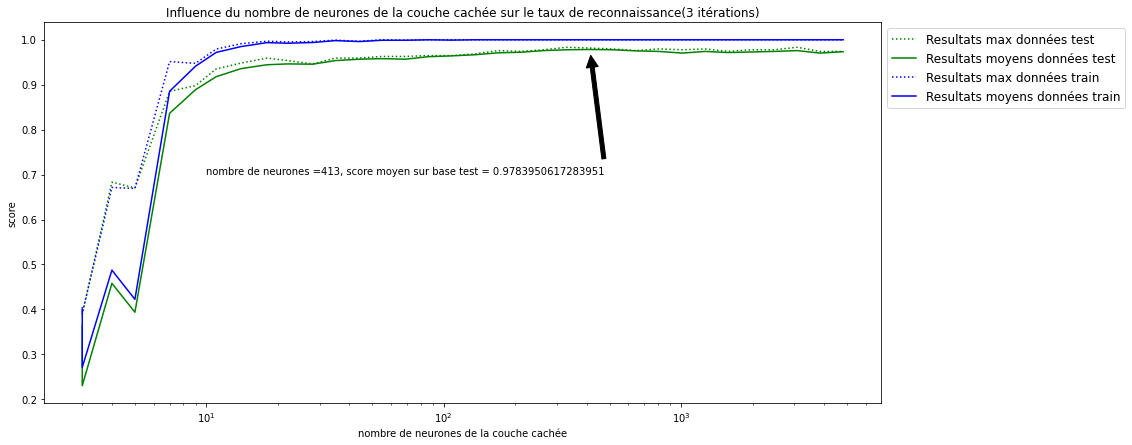

In [122]:
plt.figure(figsize=(15,7))
plt.title("Influence du nombre de neurones de la couche cachée sur le taux de reconnaissance(3 itérations)")
plt.ylabel('score')
plt.xlabel('nombre de neurones de la couche cachée')
plt.annotate('nombre de neurones ='+ str(int(1.25**([np.mean(result) for result in clfResultsTest].index(max([np.mean(result) for result in clfResultsTest])) + 5)))+', score moyen sur base test = ' + str(max([np.mean(result) for result in clfResultsTest])), xy= (int(1.25**([np.mean(result) for result in clfResultsTest].index(max([np.mean(result) for result in clfResultsTest])) + 5)),max([np.mean(result) for result in clfResultsTest])), xytext=( 10,0.7) ,arrowprops=dict(facecolor='black', shrink=0.05),)

plt.plot([int(1.25**x) for x in range(5,39)],[max(result) for result in clfResultsTest],label ="Resultats max données test", color="green", linestyle =':')
plt.plot([int(1.25**x) for x in range(5,39)],[np.mean(result) for result in clfResultsTest],label ="Resultats moyens données test", color="green")
plt.plot([int(1.25**x) for x in range(5,39)],[max(result) for result in clfResultsTrain],label ="Resultats max données train",color="blue", linestyle =':')
plt.plot([int(1.25**x) for x in range(5,39)],[np.mean(result) for result in clfResultsTrain],label ="Resultats moyens données train",color="blue")
plt.xscale('log')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5, fontsize = 'large');

### Nous pouvons déduire de cette courbe que le modèle ne semble pas s'améliorer pour un C suppérieur à environ 500, nous allons donc choisir cette valeur comme notre nombre de neurones sur la couche cachée.

# 3. Cross-validation
### Nous entrainons nos nouveaux modèles en utilisant le paramètre early_stopping avec une validation_fraction à 0.2.

In [11]:
clfCV = []
clfCVResultsTrain = []
clfCVResultsTest = []
i = 0;
for numNeuroneCache in [int(1.25**x) for x in range(5,39)]:
    print("entrainement pour C =",numNeuroneCache)
    clfCV.append(MLPClassifier(hidden_layer_sizes=numNeuroneCache,early_stopping=True, max_iter=500,validation_fraction=0.2, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=1))
    clfCV[i].fit(X_train,y_train)
    clfCVResultsTrain.append(clfCV[i].score(X_train,y_train))
    clfCVResultsTest.append(clfCV[i].score(X_test,y_test))
    i += 1


entrainement pour C = 3
Iteration 1, loss = 2.08200029
Validation score: 0.293651
Iteration 2, loss = 1.85300637
Validation score: 0.309524
Iteration 3, loss = 1.73788970
Validation score: 0.333333
Iteration 4, loss = 1.71068409
Validation score: 0.353175
Iteration 5, loss = 1.65165189
Validation score: 0.289683
Iteration 6, loss = 1.69372385
Validation score: 0.242063
Iteration 7, loss = 1.73956630
Validation score: 0.325397
Iteration 8, loss = 1.60163072
Validation score: 0.325397
Iteration 9, loss = 1.63250441
Validation score: 0.341270
Iteration 10, loss = 1.67720267
Validation score: 0.321429
Iteration 11, loss = 1.52824347
Validation score: 0.321429
Iteration 12, loss = 1.53629038
Validation score: 0.333333
Iteration 13, loss = 1.55573377
Validation score: 0.341270
Iteration 14, loss = 1.55782652
Validation score: 0.301587
Iteration 15, loss = 1.58053024
Validation score: 0.329365
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning 

Iteration 45, loss = 1.72783920
Validation score: 0.142857
Iteration 46, loss = 1.72773351
Validation score: 0.142857
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 47, loss = 1.72709650
Validation score: 0.142857
Iteration 48, loss = 1.72703087
Validation score: 0.142857
Iteration 49, loss = 1.72697148
Validation score: 0.142857
Iteration 50, loss = 1.72691064
Validation score: 0.142857
Iteration 51, loss = 1.72684640
Validation score: 0.142857
Iteration 52, loss = 1.72680607
Validation score: 0.142857
Iteration 53, loss = 1.72676207
Validation score: 0.142857
Iteration 54, loss = 1.72672338
Validation score: 0.142857
Iteration 55, loss = 1.72668461
Validation score: 0.142857
Iteration 56, loss = 1.72665887
Validation score: 0.142857
Iteration 57, loss = 1.72662950
Validation score: 0.142857
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002

Iteration 87, loss = 0.82301785
Validation score: 0.642857
Iteration 88, loss = 0.82301645
Validation score: 0.642857
Iteration 89, loss = 0.82301465
Validation score: 0.642857
Iteration 90, loss = 0.82301281
Validation score: 0.642857
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
entrainement pour C = 5
Iteration 1, loss = 2.13885052
Validation score: 0.226190
Iteration 2, loss = 2.04172424
Validation score: 0.277778
Iteration 3, loss = 1.88057602
Validation score: 0.261905
Iteration 4, loss = 1.71679560
Validation score: 0.297619
Iteration 5, loss = 1.71771674
Validation score: 0.265873
Iteration 6, loss = 1.63900391
Validation score: 0.349206
Iteration 7, loss = 1.60203412
Validation score: 0.317460
Iteration 8, loss = 1.52294977
Validation score: 0.325397
Iteration 9, loss = 1.72994167
Validation score: 0.281746
Iteration 10, loss = 1.61028432
Validation score: 0.341270
Iteration 11, loss = 1.55055574
Validatio

Iteration 32, loss = 0.68012701
Validation score: 0.742063
Iteration 33, loss = 0.52761437
Validation score: 0.793651
Iteration 34, loss = 0.64959529
Validation score: 0.785714
Iteration 35, loss = 0.62308802
Validation score: 0.789683
Iteration 36, loss = 0.65441827
Validation score: 0.658730
Iteration 37, loss = 0.73238385
Validation score: 0.702381
Iteration 38, loss = 0.54905618
Validation score: 0.750000
Iteration 39, loss = 0.60376347
Validation score: 0.789683
Iteration 40, loss = 0.57665891
Validation score: 0.781746
Iteration 41, loss = 0.57671529
Validation score: 0.674603
Iteration 42, loss = 0.57635894
Validation score: 0.829365
Iteration 43, loss = 0.57995617
Validation score: 0.781746
Iteration 44, loss = 0.57034236
Validation score: 0.753968
Iteration 45, loss = 0.68545919
Validation score: 0.797619
Iteration 46, loss = 0.60052245
Validation score: 0.789683
Iteration 47, loss = 0.57302255
Validation score: 0.769841
Iteration 48, loss = 0.56291491
Validation score: 0.8055

Iteration 34, loss = 0.45576428
Validation score: 0.904762
Iteration 35, loss = 0.39224267
Validation score: 0.757937
Iteration 36, loss = 0.37655752
Validation score: 0.793651
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 37, loss = 0.42227386
Validation score: 0.880952
Iteration 38, loss = 0.28938079
Validation score: 0.904762
Iteration 39, loss = 0.26881150
Validation score: 0.888889
Iteration 40, loss = 0.25895653
Validation score: 0.928571
Iteration 41, loss = 0.25490244
Validation score: 0.928571
Iteration 42, loss = 0.24420960
Validation score: 0.924603
Iteration 43, loss = 0.24184711
Validation score: 0.908730
Iteration 44, loss = 0.22813785
Validation score: 0.920635
Iteration 45, loss = 0.22971565
Validation score: 0.924603
Iteration 46, loss = 0.22292689
Validation score: 0.924603
Iteration 47, loss = 0.22578436
Validation score: 0.920635
Iteration 48, loss = 0.22447794
Validation score: 0.92857

Iteration 54, loss = 0.21569569
Validation score: 0.888889
Iteration 55, loss = 0.19928059
Validation score: 0.892857
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 56, loss = 0.20062787
Validation score: 0.896825
Iteration 57, loss = 0.19511945
Validation score: 0.888889
Iteration 58, loss = 0.19115768
Validation score: 0.884921
Iteration 59, loss = 0.19053530
Validation score: 0.884921
Iteration 60, loss = 0.18972344
Validation score: 0.884921
Iteration 61, loss = 0.18886917
Validation score: 0.884921
Iteration 62, loss = 0.18802403
Validation score: 0.884921
Iteration 63, loss = 0.18727232
Validation score: 0.884921
Iteration 64, loss = 0.18621557
Validation score: 0.884921
Iteration 65, loss = 0.18548411
Validation score: 0.884921
Iteration 66, loss = 0.18492188
Validation score: 0.884921
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008

Iteration 78, loss = 0.29748670
Validation score: 0.896825
Iteration 79, loss = 0.29746874
Validation score: 0.896825
Iteration 80, loss = 0.29745032
Validation score: 0.896825
Iteration 81, loss = 0.29742654
Validation score: 0.896825
Iteration 82, loss = 0.29741282
Validation score: 0.896825
Iteration 83, loss = 0.29738811
Validation score: 0.896825
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 84, loss = 0.29729862
Validation score: 0.896825
Iteration 85, loss = 0.29729529
Validation score: 0.896825
Iteration 86, loss = 0.29729028
Validation score: 0.896825
Iteration 87, loss = 0.29728698
Validation score: 0.896825
Iteration 88, loss = 0.29728304
Validation score: 0.896825
Iteration 89, loss = 0.29727803
Validation score: 0.896825
Iteration 90, loss = 0.29727412
Validation score: 0.896825
Iteration 91, loss = 0.29726989
Validation score: 0.896825
Iteration 92, loss = 0.29726575
Validation score: 0.89682

Iteration 1, loss = 1.59630297
Validation score: 0.698413
Iteration 2, loss = 0.92398252
Validation score: 0.650794
Iteration 3, loss = 0.75715217
Validation score: 0.750000
Iteration 4, loss = 0.72087277
Validation score: 0.682540
Iteration 5, loss = 0.70844893
Validation score: 0.845238
Iteration 6, loss = 0.63860513
Validation score: 0.630952
Iteration 7, loss = 0.64013934
Validation score: 0.833333
Iteration 8, loss = 0.54471558
Validation score: 0.837302
Iteration 9, loss = 0.54056760
Validation score: 0.821429
Iteration 10, loss = 0.53039630
Validation score: 0.861111
Iteration 11, loss = 0.58146767
Validation score: 0.805556
Iteration 12, loss = 0.51897617
Validation score: 0.865079
Iteration 13, loss = 0.46283939
Validation score: 0.845238
Iteration 14, loss = 0.47802452
Validation score: 0.773810
Iteration 15, loss = 0.45224152
Validation score: 0.873016
Iteration 16, loss = 0.45566466
Validation score: 0.761905
Iteration 17, loss = 0.46033891
Validation score: 0.821429
Iterat

Iteration 30, loss = 0.18495416
Validation score: 0.936508
Iteration 31, loss = 0.18908064
Validation score: 0.920635
Iteration 32, loss = 0.25955842
Validation score: 0.936508
Iteration 33, loss = 0.16860767
Validation score: 0.912698
Iteration 34, loss = 0.18194086
Validation score: 0.940476
Iteration 35, loss = 0.18290330
Validation score: 0.940476
Iteration 36, loss = 0.23062929
Validation score: 0.892857
Iteration 37, loss = 0.38154727
Validation score: 0.884921
Iteration 38, loss = 0.24819556
Validation score: 0.892857
Iteration 39, loss = 0.26707057
Validation score: 0.892857
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 40, loss = 0.30514847
Validation score: 0.912698
Iteration 41, loss = 0.26036426
Validation score: 0.924603
Iteration 42, loss = 0.22977187
Validation score: 0.908730
Iteration 43, loss = 0.21646940
Validation score: 0.936508
Iteration 44, loss = 0.18881128
Validation score: 0.92857

Iteration 52, loss = 0.07192550
Validation score: 0.928571
Iteration 53, loss = 0.06811128
Validation score: 0.928571
Iteration 54, loss = 0.06541645
Validation score: 0.936508
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 55, loss = 0.06320140
Validation score: 0.936508
Iteration 56, loss = 0.06269165
Validation score: 0.936508
Iteration 57, loss = 0.06241879
Validation score: 0.936508
Iteration 58, loss = 0.06219566
Validation score: 0.936508
Iteration 59, loss = 0.06196877
Validation score: 0.936508
Iteration 60, loss = 0.06175366
Validation score: 0.936508
Iteration 61, loss = 0.06156341
Validation score: 0.932540
Iteration 62, loss = 0.06130729
Validation score: 0.932540
Iteration 63, loss = 0.06109914
Validation score: 0.932540
Iteration 64, loss = 0.06088734
Validation score: 0.932540
Iteration 65, loss = 0.06067301
Validation score: 0.932540
Validation score did not improve more than tol=0.000100 f

Iteration 1, loss = 1.12219186
Validation score: 0.793651
Iteration 2, loss = 0.53104980
Validation score: 0.865079
Iteration 3, loss = 0.37434107
Validation score: 0.900794
Iteration 4, loss = 0.32261865
Validation score: 0.924603
Iteration 5, loss = 0.29261897
Validation score: 0.932540
Iteration 6, loss = 0.27453092
Validation score: 0.936508
Iteration 7, loss = 0.24189969
Validation score: 0.861111
Iteration 8, loss = 0.27106952
Validation score: 0.924603
Iteration 9, loss = 0.24649042
Validation score: 0.912698
Iteration 10, loss = 0.25981692
Validation score: 0.900794
Iteration 11, loss = 0.20517090
Validation score: 0.861111
Iteration 12, loss = 0.21761364
Validation score: 0.908730
Iteration 13, loss = 0.19229389
Validation score: 0.928571
Iteration 14, loss = 0.17926130
Validation score: 0.924603
Iteration 15, loss = 0.19938793
Validation score: 0.948413
Iteration 16, loss = 0.15893978
Validation score: 0.964286
Iteration 17, loss = 0.14430582
Validation score: 0.928571
Iterat

Iteration 42, loss = 0.02254040
Validation score: 0.960317
Iteration 43, loss = 0.02244007
Validation score: 0.960317
Iteration 44, loss = 0.02235191
Validation score: 0.960317
Iteration 45, loss = 0.02226468
Validation score: 0.960317
Iteration 46, loss = 0.02218061
Validation score: 0.960317
Iteration 47, loss = 0.02209391
Validation score: 0.960317
Iteration 48, loss = 0.02201804
Validation score: 0.960317
Iteration 49, loss = 0.02193468
Validation score: 0.960317
Iteration 50, loss = 0.02185287
Validation score: 0.960317
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 51, loss = 0.02169053
Validation score: 0.960317
Iteration 52, loss = 0.02167369
Validation score: 0.960317
Iteration 53, loss = 0.02165921
Validation score: 0.960317
Iteration 54, loss = 0.02164242
Validation score: 0.960317
Iteration 55, loss = 0.02162674
Validation score: 0.960317
Iteration 56, loss = 0.02161043
Validation score: 0.96031

Iteration 2, loss = 0.29582840
Validation score: 0.912698
Iteration 3, loss = 0.23995425
Validation score: 0.896825
Iteration 4, loss = 0.18588312
Validation score: 0.924603
Iteration 5, loss = 0.19171105
Validation score: 0.920635
Iteration 6, loss = 0.16617064
Validation score: 0.892857
Iteration 7, loss = 0.16169739
Validation score: 0.916667
Iteration 8, loss = 0.14658544
Validation score: 0.940476
Iteration 9, loss = 0.13372016
Validation score: 0.944444
Iteration 10, loss = 0.15262446
Validation score: 0.912698
Iteration 11, loss = 0.10348852
Validation score: 0.932540
Iteration 12, loss = 0.10551173
Validation score: 0.932540
Iteration 13, loss = 0.08764325
Validation score: 0.908730
Iteration 14, loss = 0.11290466
Validation score: 0.960317
Iteration 15, loss = 0.08238356
Validation score: 0.944444
Iteration 16, loss = 0.15214483
Validation score: 0.924603
Iteration 17, loss = 0.09394851
Validation score: 0.892857
Iteration 18, loss = 0.07799733
Validation score: 0.928571
Itera

Iteration 45, loss = 0.00189898
Validation score: 0.980159
Iteration 46, loss = 0.00189628
Validation score: 0.980159
Iteration 47, loss = 0.00189391
Validation score: 0.980159
Iteration 48, loss = 0.00189131
Validation score: 0.980159
Iteration 49, loss = 0.00188872
Validation score: 0.980159
Iteration 50, loss = 0.00188610
Validation score: 0.980159
Iteration 51, loss = 0.00188368
Validation score: 0.980159
Iteration 52, loss = 0.00188116
Validation score: 0.980159
Iteration 53, loss = 0.00187863
Validation score: 0.980159
Iteration 54, loss = 0.00187615
Validation score: 0.980159
Iteration 55, loss = 0.00187362
Validation score: 0.980159
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 56, loss = 0.00186905
Validation score: 0.980159
Iteration 57, loss = 0.00186855
Validation score: 0.980159
Iteration 58, loss = 0.00186804
Validation score: 0.980159
Iteration 59, loss = 0.00186755
Validation score: 0.98015

Iteration 78, loss = 0.00133308
Validation score: 0.948413
Iteration 79, loss = 0.00133307
Validation score: 0.948413
Iteration 80, loss = 0.00133306
Validation score: 0.948413
Iteration 81, loss = 0.00133305
Validation score: 0.948413
Iteration 82, loss = 0.00133303
Validation score: 0.948413
Iteration 83, loss = 0.00133302
Validation score: 0.948413
Iteration 84, loss = 0.00133301
Validation score: 0.948413
Iteration 85, loss = 0.00133300
Validation score: 0.948413
Iteration 86, loss = 0.00133298
Validation score: 0.948413
Iteration 87, loss = 0.00133297
Validation score: 0.948413
Iteration 88, loss = 0.00133296
Validation score: 0.948413
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
entrainement pour C = 211
Iteration 1, loss = 0.60464754
Validation score: 0.888889
Iteration 2, loss = 0.23462972
Validation score: 0.928571
Iteration 3, loss = 0.16535111
Validation score: 0.952381
Iteration 4, loss = 0.12706223
Va

Iteration 33, loss = 0.00154885
Validation score: 0.964286
Iteration 34, loss = 0.00153521
Validation score: 0.964286
Iteration 35, loss = 0.00152223
Validation score: 0.964286
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 36, loss = 0.00150081
Validation score: 0.964286
Iteration 37, loss = 0.00149844
Validation score: 0.964286
Iteration 38, loss = 0.00149590
Validation score: 0.964286
Iteration 39, loss = 0.00149318
Validation score: 0.964286
Iteration 40, loss = 0.00149109
Validation score: 0.964286
Iteration 41, loss = 0.00148872
Validation score: 0.964286
Iteration 42, loss = 0.00148635
Validation score: 0.964286
Iteration 43, loss = 0.00148381
Validation score: 0.964286
Iteration 44, loss = 0.00148163
Validation score: 0.964286
Iteration 45, loss = 0.00147925
Validation score: 0.964286
Iteration 46, loss = 0.00147687
Validation score: 0.964286
Validation score did not improve more than tol=0.000100 f

Iteration 1, loss = 0.59647531
Validation score: 0.904762
Iteration 2, loss = 0.22351396
Validation score: 0.908730
Iteration 3, loss = 0.16685984
Validation score: 0.936508
Iteration 4, loss = 0.11087534
Validation score: 0.928571
Iteration 5, loss = 0.12178244
Validation score: 0.972222
Iteration 6, loss = 0.08315257
Validation score: 0.936508
Iteration 7, loss = 0.05936954
Validation score: 0.972222
Iteration 8, loss = 0.04401444
Validation score: 0.976190
Iteration 9, loss = 0.03054244
Validation score: 0.984127
Iteration 10, loss = 0.05611802
Validation score: 0.984127
Iteration 11, loss = 0.04228623
Validation score: 0.968254
Iteration 12, loss = 0.01984161
Validation score: 0.980159
Iteration 13, loss = 0.01142425
Validation score: 0.992063
Iteration 14, loss = 0.01062822
Validation score: 0.964286
Iteration 15, loss = 0.01025166
Validation score: 0.976190
Iteration 16, loss = 0.00538963
Validation score: 0.988095
Iteration 17, loss = 0.00273282
Validation score: 0.988095
Iterat

Iteration 45, loss = 0.00069567
Validation score: 0.976190
Iteration 46, loss = 0.00069466
Validation score: 0.976190
Iteration 47, loss = 0.00069367
Validation score: 0.976190
Iteration 48, loss = 0.00069275
Validation score: 0.976190
Iteration 49, loss = 0.00069180
Validation score: 0.976190
Iteration 50, loss = 0.00069084
Validation score: 0.976190
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 51, loss = 0.00068928
Validation score: 0.976190
Iteration 52, loss = 0.00068910
Validation score: 0.976190
Iteration 53, loss = 0.00068892
Validation score: 0.976190
Iteration 54, loss = 0.00068874
Validation score: 0.976190
Iteration 55, loss = 0.00068854
Validation score: 0.976190
Iteration 56, loss = 0.00068835
Validation score: 0.976190
Iteration 57, loss = 0.00068818
Validation score: 0.976190
Iteration 58, loss = 0.00068799
Validation score: 0.976190
Iteration 59, loss = 0.00068780
Validation score: 0.97619

Iteration 83, loss = 0.00164848
Validation score: 0.980159
Iteration 84, loss = 0.00164841
Validation score: 0.980159
Iteration 85, loss = 0.00164833
Validation score: 0.980159
Iteration 86, loss = 0.00164825
Validation score: 0.980159
Iteration 87, loss = 0.00164818
Validation score: 0.980159
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
entrainement pour C = 807
Iteration 1, loss = 0.75894432
Validation score: 0.880952
Iteration 2, loss = 0.38173152
Validation score: 0.900794
Iteration 3, loss = 0.37045537
Validation score: 0.908730
Iteration 4, loss = 0.33093247
Validation score: 0.912698
Iteration 5, loss = 0.29650497
Validation score: 0.916667
Iteration 6, loss = 0.24691360
Validation score: 0.845238
Iteration 7, loss = 0.20639048
Validation score: 0.956349
Iteration 8, loss = 0.15685847
Validation score: 0.964286
Iteration 9, loss = 0.18924209
Validation score: 0.948413
Iteration 10, loss = 0.20736377
Validat

Iteration 38, loss = 0.01543027
Validation score: 0.980159
Iteration 39, loss = 0.00939777
Validation score: 0.976190
Iteration 40, loss = 0.00579004
Validation score: 0.980159
Iteration 41, loss = 0.00573518
Validation score: 0.980159
Iteration 42, loss = 0.00398195
Validation score: 0.980159
Iteration 43, loss = 0.00339620
Validation score: 0.980159
Iteration 44, loss = 0.00300534
Validation score: 0.980159
Iteration 45, loss = 0.00280704
Validation score: 0.980159
Iteration 46, loss = 0.00264868
Validation score: 0.980159
Iteration 47, loss = 0.00249130
Validation score: 0.980159
Iteration 48, loss = 0.00235336
Validation score: 0.980159
Iteration 49, loss = 0.00230330
Validation score: 0.980159
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 50, loss = 0.00204203
Validation score: 0.980159
Iteration 51, loss = 0.00202456
Validation score: 0.980159
Iteration 52, loss = 0.00200719
Validation score: 0.98015

Iteration 68, loss = 0.00104280
Validation score: 0.968254
Iteration 69, loss = 0.00104252
Validation score: 0.968254
Iteration 70, loss = 0.00104233
Validation score: 0.968254
Iteration 71, loss = 0.00104208
Validation score: 0.968254
Iteration 72, loss = 0.00104182
Validation score: 0.968254
Iteration 73, loss = 0.00104162
Validation score: 0.968254
Iteration 74, loss = 0.00104134
Validation score: 0.968254
Iteration 75, loss = 0.00104112
Validation score: 0.968254
Iteration 76, loss = 0.00104089
Validation score: 0.968254
Iteration 77, loss = 0.00104065
Validation score: 0.968254
Iteration 78, loss = 0.00104040
Validation score: 0.968254
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 79, loss = 0.00103984
Validation score: 0.968254
Iteration 80, loss = 0.00103978
Validation score: 0.968254
Iteration 81, loss = 0.00103974
Validation score: 0.968254
Iteration 82, loss = 0.00103970
Validation score: 0.96825

Iteration 22, loss = 0.70635736
Validation score: 0.880952
Iteration 23, loss = 0.45319430
Validation score: 0.936508
Iteration 24, loss = 0.61255441
Validation score: 0.948413
Iteration 25, loss = 0.48546625
Validation score: 0.936508
Iteration 26, loss = 0.59728847
Validation score: 0.896825
Iteration 27, loss = 0.70529443
Validation score: 0.845238
Iteration 28, loss = 0.50506867
Validation score: 0.932540
Iteration 29, loss = 0.65803664
Validation score: 0.936508
Iteration 30, loss = 0.50754701
Validation score: 0.912698
Iteration 31, loss = 0.59385769
Validation score: 0.912698
Iteration 32, loss = 0.55800036
Validation score: 0.936508
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 33, loss = 0.08252593
Validation score: 0.976190
Iteration 34, loss = 0.01978354
Validation score: 0.976190
Iteration 35, loss = 0.01324809
Validation score: 0.972222
Iteration 36, loss = 0.00742315
Validation score: 0.97222

Iteration 56, loss = 0.00033595
Validation score: 0.968254
Iteration 57, loss = 0.00033553
Validation score: 0.968254
Iteration 58, loss = 0.00033513
Validation score: 0.968254
Iteration 59, loss = 0.00033450
Validation score: 0.968254
Iteration 60, loss = 0.00033395
Validation score: 0.968254
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 61, loss = 0.00033267
Validation score: 0.968254
Iteration 62, loss = 0.00033259
Validation score: 0.968254
Iteration 63, loss = 0.00033249
Validation score: 0.968254
Iteration 64, loss = 0.00033237
Validation score: 0.968254
Iteration 65, loss = 0.00033231
Validation score: 0.968254
Iteration 66, loss = 0.00033219
Validation score: 0.968254
Iteration 67, loss = 0.00033210
Validation score: 0.968254
Iteration 68, loss = 0.00033202
Validation score: 0.968254
Iteration 69, loss = 0.00033191
Validation score: 0.968254
Iteration 70, loss = 0.00033182
Validation score: 0.96825

Iteration 97, loss = 0.00011536
Validation score: 0.964286
Iteration 98, loss = 0.00011536
Validation score: 0.964286
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
entrainement pour C = 3851
Iteration 1, loss = 3.81456023
Validation score: 0.738095
Iteration 2, loss = 2.50674252
Validation score: 0.817460
Iteration 3, loss = 2.58011344
Validation score: 0.761905
Iteration 4, loss = 1.62439984
Validation score: 0.841270
Iteration 5, loss = 1.95691095
Validation score: 0.849206
Iteration 6, loss = 1.94070139
Validation score: 0.825397
Iteration 7, loss = 1.79428620
Validation score: 0.849206
Iteration 8, loss = 2.17999330
Validation score: 0.888889
Iteration 9, loss = 1.76150139
Validation score: 0.781746
Iteration 10, loss = 1.83835505
Validation score: 0.928571
Iteration 11, loss = 1.41268436
Validation score: 0.912698
Iteration 12, loss = 1.49200758
Validation score: 0.904762
Iteration 13, loss = 1.31393606
Valida

Iteration 39, loss = 0.00099175
Validation score: 0.964286
Iteration 40, loss = 0.00004255
Validation score: 0.964286
Iteration 41, loss = 0.00003632
Validation score: 0.964286
Iteration 42, loss = 0.00003292
Validation score: 0.964286
Iteration 43, loss = 0.00003056
Validation score: 0.964286
Iteration 44, loss = 0.00002874
Validation score: 0.964286
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 45, loss = 0.00002656
Validation score: 0.964286
Iteration 46, loss = 0.00002631
Validation score: 0.964286
Iteration 47, loss = 0.00002607
Validation score: 0.964286
Iteration 48, loss = 0.00002583
Validation score: 0.964286
Iteration 49, loss = 0.00002560
Validation score: 0.964286
Iteration 50, loss = 0.00002537
Validation score: 0.964286
Iteration 51, loss = 0.00002516
Validation score: 0.964286
Iteration 52, loss = 0.00002494
Validation score: 0.964286
Iteration 53, loss = 0.00002474
Validation score: 0.96428

In [36]:
clfV = []
clfVResultsTrain = []
clfVResultsTest = []
i = 0;
for numNeuroneCache in [int(1.25**x) for x in range(5,39)]:
    localClfArray = []
    localClfResultsTest = []
    localClfResultsTrain = []
    for iterateur in range (3): 
        print("Entrainement, avec C=", numNeuroneCache)
        print("Itération numéro : ", iterateur)
        localClfArray.append(MLPClassifier(hidden_layer_sizes=numNeuroneCache,max_iter=500,early_stopping=True, validation_fraction=0.2, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=1))
        localClfArray[iterateur].fit(X_train,y_train)
        localClfResultsTest.append(localClfArray[iterateur].score(X_test,y_test))
        localClfResultsTrain.append(localClfArray[iterateur].score(X_train,y_train))
    clfV.append(localClfArray)
    clfVResultsTest.append(localClfResultsTest)
    clfVResultsTrain.append(localClfResultsTrain)
    i += 1

Entrainement, avec C= 3
Itération numéro :  0
Iteration 1, loss = 2.25661765
Validation score: 0.273810
Iteration 2, loss = 1.87339098
Validation score: 0.349206
Iteration 3, loss = 1.67021419
Validation score: 0.329365
Iteration 4, loss = 1.60522467
Validation score: 0.511905
Iteration 5, loss = 1.41360378
Validation score: 0.511905
Iteration 6, loss = 1.29477706
Validation score: 0.496032
Iteration 7, loss = 1.22558183
Validation score: 0.369048
Iteration 8, loss = 1.26315117
Validation score: 0.567460
Iteration 9, loss = 1.22349942
Validation score: 0.583333
Iteration 10, loss = 1.25409217
Validation score: 0.404762
Iteration 11, loss = 1.18834579
Validation score: 0.531746
Iteration 12, loss = 1.08028483
Validation score: 0.599206
Iteration 13, loss = 1.03153148
Validation score: 0.611111
Iteration 14, loss = 1.02129369
Validation score: 0.599206
Iteration 15, loss = 0.97962657
Validation score: 0.630952
Iteration 16, loss = 1.04975584
Validation score: 0.642857
Iteration 17, loss 

Iteration 37, loss = 1.24712080
Validation score: 0.380952
Iteration 38, loss = 1.24659047
Validation score: 0.380952
Iteration 39, loss = 1.24593698
Validation score: 0.380952
Iteration 40, loss = 1.24558334
Validation score: 0.380952
Iteration 41, loss = 1.24427223
Validation score: 0.380952
Iteration 42, loss = 1.24548111
Validation score: 0.380952
Iteration 43, loss = 1.24069131
Validation score: 0.380952
Iteration 44, loss = 1.24032698
Validation score: 0.380952
Iteration 45, loss = 1.23897834
Validation score: 0.380952
Iteration 46, loss = 1.23882475
Validation score: 0.380952
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 47, loss = 1.23815754
Validation score: 0.380952
Iteration 48, loss = 1.23808909
Validation score: 0.380952
Iteration 49, loss = 1.23802039
Validation score: 0.380952
Iteration 50, loss = 1.23794796
Validation score: 0.380952
Iteration 51, loss = 1.23786640
Validation score: 0.38095

Iteration 83, loss = 0.87336008
Validation score: 0.607143
Iteration 84, loss = 0.87331312
Validation score: 0.607143
Iteration 85, loss = 0.87326983
Validation score: 0.607143
Iteration 86, loss = 0.87321930
Validation score: 0.607143
Iteration 87, loss = 0.87316941
Validation score: 0.607143
Iteration 88, loss = 0.87313073
Validation score: 0.607143
Iteration 89, loss = 0.87307952
Validation score: 0.607143
Iteration 90, loss = 0.87303801
Validation score: 0.607143
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 91, loss = 0.87291786
Validation score: 0.607143
Iteration 92, loss = 0.87290813
Validation score: 0.607143
Iteration 93, loss = 0.87289705
Validation score: 0.607143
Iteration 94, loss = 0.87288581
Validation score: 0.607143
Iteration 95, loss = 0.87287619
Validation score: 0.607143
Iteration 96, loss = 0.87286687
Validation score: 0.607143
Iteration 97, loss = 0.87285684
Validation score: 0.60714

Iteration 15, loss = 1.85960907
Validation score: 0.198413
Iteration 16, loss = 1.84872908
Validation score: 0.198413
Iteration 17, loss = 1.85716927
Validation score: 0.194444
Iteration 18, loss = 1.84546104
Validation score: 0.190476
Iteration 19, loss = 1.85296154
Validation score: 0.194444
Iteration 20, loss = 1.84855582
Validation score: 0.198413
Iteration 21, loss = 1.85448754
Validation score: 0.202381
Iteration 22, loss = 1.83707493
Validation score: 0.198413
Iteration 23, loss = 1.83371343
Validation score: 0.198413
Iteration 24, loss = 1.81983234
Validation score: 0.198413
Iteration 25, loss = 1.81973341
Validation score: 0.198413
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 26, loss = 1.81793235
Validation score: 0.202381
Iteration 27, loss = 1.81453374
Validation score: 0.198413
Iteration 28, loss = 1.81129787
Validation score: 0.198413
Iteration 29, loss = 1.81087119
Validation score: 0.19841

Iteration 68, loss = 1.34755914
Validation score: 0.357143
Iteration 69, loss = 1.34755362
Validation score: 0.357143
Iteration 70, loss = 1.34754570
Validation score: 0.357143
Iteration 71, loss = 1.34753854
Validation score: 0.357143
Iteration 72, loss = 1.34753117
Validation score: 0.357143
Iteration 73, loss = 1.34752382
Validation score: 0.357143
Iteration 74, loss = 1.34751677
Validation score: 0.357143
Iteration 75, loss = 1.34751024
Validation score: 0.357143
Iteration 76, loss = 1.34750371
Validation score: 0.357143
Iteration 77, loss = 1.34749654
Validation score: 0.357143
Iteration 78, loss = 1.34748914
Validation score: 0.357143
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 79, loss = 1.34746615
Validation score: 0.357143
Iteration 80, loss = 1.34746470
Validation score: 0.357143
Iteration 81, loss = 1.34746333
Validation score: 0.357143
Iteration 82, loss = 1.34746206
Validation score: 0.35714

Iteration 22, loss = 1.60879898
Validation score: 0.341270
Iteration 23, loss = 1.52612378
Validation score: 0.333333
Iteration 24, loss = 1.49705206
Validation score: 0.333333
Iteration 25, loss = 1.48511433
Validation score: 0.361111
Iteration 26, loss = 1.46491612
Validation score: 0.329365
Iteration 27, loss = 1.46330488
Validation score: 0.361111
Iteration 28, loss = 1.45566162
Validation score: 0.357143
Iteration 29, loss = 1.43940427
Validation score: 0.361111
Iteration 30, loss = 1.42974352
Validation score: 0.361111
Iteration 31, loss = 1.44856241
Validation score: 0.365079
Iteration 32, loss = 1.43044938
Validation score: 0.365079
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 33, loss = 1.41561172
Validation score: 0.369048
Iteration 34, loss = 1.41499013
Validation score: 0.373016
Iteration 35, loss = 1.40836853
Validation score: 0.373016
Iteration 36, loss = 1.40782671
Validation score: 0.37301

Iteration 67, loss = 1.19677130
Validation score: 0.357143
Iteration 68, loss = 1.19675049
Validation score: 0.357143
Iteration 69, loss = 1.19673969
Validation score: 0.357143
Iteration 70, loss = 1.19672560
Validation score: 0.357143
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 71, loss = 1.19668059
Validation score: 0.357143
Iteration 72, loss = 1.19667626
Validation score: 0.357143
Iteration 73, loss = 1.19667338
Validation score: 0.357143
Iteration 74, loss = 1.19667071
Validation score: 0.357143
Iteration 75, loss = 1.19666762
Validation score: 0.357143
Iteration 76, loss = 1.19666505
Validation score: 0.357143
Iteration 77, loss = 1.19666192
Validation score: 0.357143
Iteration 78, loss = 1.19665848
Validation score: 0.357143
Iteration 79, loss = 1.19665565
Validation score: 0.357143
Iteration 80, loss = 1.19665215
Validation score: 0.357143
Iteration 81, loss = 1.19664950
Validation score: 0.35714

Iteration 16, loss = 0.92879623
Validation score: 0.591270
Iteration 17, loss = 0.94507210
Validation score: 0.619048
Iteration 18, loss = 1.06562663
Validation score: 0.523810
Iteration 19, loss = 1.01636112
Validation score: 0.587302
Iteration 20, loss = 0.90462118
Validation score: 0.686508
Iteration 21, loss = 0.79544724
Validation score: 0.690476
Iteration 22, loss = 0.67574173
Validation score: 0.674603
Iteration 23, loss = 0.74830235
Validation score: 0.690476
Iteration 24, loss = 0.79973150
Validation score: 0.710317
Iteration 25, loss = 0.66038705
Validation score: 0.666667
Iteration 26, loss = 0.81845120
Validation score: 0.607143
Iteration 27, loss = 0.73298155
Validation score: 0.642857
Iteration 28, loss = 0.62989693
Validation score: 0.654762
Iteration 29, loss = 0.60970878
Validation score: 0.765873
Iteration 30, loss = 0.63967306
Validation score: 0.789683
Iteration 31, loss = 0.63204172
Validation score: 0.789683
Iteration 32, loss = 0.75913278
Validation score: 0.7857

Iteration 33, loss = 0.99091690
Validation score: 0.666667
Iteration 34, loss = 1.01853510
Validation score: 0.642857
Iteration 35, loss = 0.99546732
Validation score: 0.579365
Iteration 36, loss = 0.97529257
Validation score: 0.626984
Iteration 37, loss = 0.97498456
Validation score: 0.678571
Iteration 38, loss = 0.93490855
Validation score: 0.662698
Iteration 39, loss = 0.93788269
Validation score: 0.634921
Iteration 40, loss = 0.87218856
Validation score: 0.666667
Iteration 41, loss = 0.90876406
Validation score: 0.567460
Iteration 42, loss = 0.92818222
Validation score: 0.595238
Iteration 43, loss = 0.95414821
Validation score: 0.496032
Iteration 44, loss = 0.91082964
Validation score: 0.654762
Iteration 45, loss = 0.90275454
Validation score: 0.599206
Iteration 46, loss = 0.90412223
Validation score: 0.630952
Iteration 47, loss = 0.85494288
Validation score: 0.666667
Iteration 48, loss = 0.86130514
Validation score: 0.638889
Validation score did not improve more than tol=0.000100 

Iteration 55, loss = 0.64682178
Validation score: 0.698413
Iteration 56, loss = 0.64604240
Validation score: 0.686508
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 57, loss = 0.64641734
Validation score: 0.690476
Iteration 58, loss = 0.64463051
Validation score: 0.690476
Iteration 59, loss = 0.64443601
Validation score: 0.686508
Iteration 60, loss = 0.64422280
Validation score: 0.686508
Iteration 61, loss = 0.64394183
Validation score: 0.686508
Iteration 62, loss = 0.64357342
Validation score: 0.682540
Iteration 63, loss = 0.64331636
Validation score: 0.682540
Iteration 64, loss = 0.64255423
Validation score: 0.686508
Iteration 65, loss = 0.64174612
Validation score: 0.682540
Iteration 66, loss = 0.64152008
Validation score: 0.682540
Iteration 67, loss = 0.64137956
Validation score: 0.682540
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008

Iteration 76, loss = 0.50614737
Validation score: 0.718254
Iteration 77, loss = 0.50612427
Validation score: 0.718254
Iteration 78, loss = 0.50610075
Validation score: 0.718254
Iteration 79, loss = 0.50607686
Validation score: 0.718254
Iteration 80, loss = 0.50605502
Validation score: 0.718254
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 81, loss = 0.50599763
Validation score: 0.718254
Iteration 82, loss = 0.50599332
Validation score: 0.718254
Iteration 83, loss = 0.50598828
Validation score: 0.718254
Iteration 84, loss = 0.50598407
Validation score: 0.718254
Iteration 85, loss = 0.50597943
Validation score: 0.718254
Iteration 86, loss = 0.50597483
Validation score: 0.718254
Iteration 87, loss = 0.50597055
Validation score: 0.718254
Iteration 88, loss = 0.50596537
Validation score: 0.718254
Iteration 89, loss = 0.50596113
Validation score: 0.718254
Iteration 90, loss = 0.50595666
Validation score: 0.71825

Iteration 25, loss = 0.72636439
Validation score: 0.738095
Iteration 26, loss = 0.68281910
Validation score: 0.761905
Iteration 27, loss = 0.68327312
Validation score: 0.841270
Iteration 28, loss = 0.81894880
Validation score: 0.757937
Iteration 29, loss = 0.62867174
Validation score: 0.801587
Iteration 30, loss = 0.60499137
Validation score: 0.742063
Iteration 31, loss = 0.70361600
Validation score: 0.734127
Iteration 32, loss = 0.60151986
Validation score: 0.829365
Iteration 33, loss = 0.65493035
Validation score: 0.623016
Iteration 34, loss = 0.78501280
Validation score: 0.773810
Iteration 35, loss = 0.70598572
Validation score: 0.805556
Iteration 36, loss = 0.65955992
Validation score: 0.825397
Iteration 37, loss = 0.57274662
Validation score: 0.789683
Iteration 38, loss = 0.67184649
Validation score: 0.813492
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 39, loss = 0.63176087
Validation score: 0.81349

Iteration 30, loss = 0.68206362
Validation score: 0.781746
Iteration 31, loss = 0.67023919
Validation score: 0.777778
Iteration 32, loss = 0.67930373
Validation score: 0.789683
Iteration 33, loss = 0.64924795
Validation score: 0.757937
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 34, loss = 0.56149420
Validation score: 0.797619
Iteration 35, loss = 0.57550697
Validation score: 0.765873
Iteration 36, loss = 0.56607171
Validation score: 0.773810
Iteration 37, loss = 0.55171752
Validation score: 0.797619
Iteration 38, loss = 0.53158611
Validation score: 0.789683
Iteration 39, loss = 0.54295284
Validation score: 0.805556
Iteration 40, loss = 0.52007390
Validation score: 0.797619
Iteration 41, loss = 0.51304224
Validation score: 0.801587
Iteration 42, loss = 0.53723688
Validation score: 0.801587
Iteration 43, loss = 0.52194312
Validation score: 0.789683
Iteration 44, loss = 0.53785039
Validation score: 0.80952

Iteration 50, loss = 0.18883667
Validation score: 0.920635
Iteration 51, loss = 0.18808461
Validation score: 0.916667
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 52, loss = 0.18163541
Validation score: 0.916667
Iteration 53, loss = 0.17914587
Validation score: 0.916667
Iteration 54, loss = 0.17848679
Validation score: 0.916667
Iteration 55, loss = 0.17779019
Validation score: 0.920635
Iteration 56, loss = 0.17743923
Validation score: 0.920635
Iteration 57, loss = 0.17713548
Validation score: 0.920635
Iteration 58, loss = 0.17666255
Validation score: 0.920635
Iteration 59, loss = 0.17591997
Validation score: 0.924603
Iteration 60, loss = 0.17561459
Validation score: 0.924603
Iteration 61, loss = 0.17466385
Validation score: 0.924603
Iteration 62, loss = 0.17376908
Validation score: 0.924603
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008

Iteration 78, loss = 0.23937261
Validation score: 0.888889
Iteration 79, loss = 0.23932474
Validation score: 0.888889
Iteration 80, loss = 0.23926976
Validation score: 0.888889
Iteration 81, loss = 0.23922566
Validation score: 0.888889
Iteration 82, loss = 0.23915711
Validation score: 0.888889
Iteration 83, loss = 0.23910351
Validation score: 0.888889
Iteration 84, loss = 0.23903488
Validation score: 0.888889
Iteration 85, loss = 0.23894989
Validation score: 0.888889
Iteration 86, loss = 0.23888160
Validation score: 0.888889
Iteration 87, loss = 0.23880192
Validation score: 0.888889
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 88, loss = 0.23864752
Validation score: 0.888889
Iteration 89, loss = 0.23863301
Validation score: 0.888889
Iteration 90, loss = 0.23862123
Validation score: 0.888889
Iteration 91, loss = 0.23860995
Validation score: 0.888889
Iteration 92, loss = 0.23859811
Validation score: 0.88888

Iteration 96, loss = 0.28788712
Validation score: 0.880952
Iteration 97, loss = 0.28788328
Validation score: 0.880952
Iteration 98, loss = 0.28787875
Validation score: 0.880952
Iteration 99, loss = 0.28787365
Validation score: 0.880952
Iteration 100, loss = 0.28786938
Validation score: 0.880952
Iteration 101, loss = 0.28786494
Validation score: 0.880952
Iteration 102, loss = 0.28786085
Validation score: 0.880952
Iteration 103, loss = 0.28785627
Validation score: 0.880952
Iteration 104, loss = 0.28785187
Validation score: 0.880952
Iteration 105, loss = 0.28784695
Validation score: 0.880952
Iteration 106, loss = 0.28784272
Validation score: 0.880952
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 107, loss = 0.28782863
Validation score: 0.880952
Iteration 108, loss = 0.28782785
Validation score: 0.880952
Iteration 109, loss = 0.28782692
Validation score: 0.880952
Iteration 110, loss = 0.28782610
Validation sco

Iteration 103, loss = 0.22988042
Validation score: 0.904762
Iteration 104, loss = 0.22987181
Validation score: 0.904762
Iteration 105, loss = 0.22986422
Validation score: 0.904762
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Entrainement, avec C= 14
Itération numéro :  0
Iteration 1, loss = 1.75508675
Validation score: 0.619048
Iteration 2, loss = 1.12288474
Validation score: 0.734127
Iteration 3, loss = 0.91313343
Validation score: 0.821429
Iteration 4, loss = 0.72997065
Validation score: 0.785714
Iteration 5, loss = 0.61583753
Validation score: 0.829365
Iteration 6, loss = 0.57351051
Validation score: 0.777778
Iteration 7, loss = 0.75178176
Validation score: 0.718254
Iteration 8, loss = 0.75815670
Validation score: 0.694444
Iteration 9, loss = 0.55080257
Validation score: 0.777778
Iteration 10, loss = 0.47811191
Validation score: 0.825397
Iteration 11, loss = 0.44935017
Validation score: 0.865079
Iteration 12, l

Iteration 35, loss = 0.40136992
Validation score: 0.817460
Iteration 36, loss = 0.37379039
Validation score: 0.825397
Iteration 37, loss = 0.37780489
Validation score: 0.809524
Iteration 38, loss = 0.37807178
Validation score: 0.837302
Iteration 39, loss = 0.36730736
Validation score: 0.841270
Iteration 40, loss = 0.35873394
Validation score: 0.829365
Iteration 41, loss = 0.38070424
Validation score: 0.845238
Iteration 42, loss = 0.34907249
Validation score: 0.841270
Iteration 43, loss = 0.34061930
Validation score: 0.833333
Iteration 44, loss = 0.34036823
Validation score: 0.833333
Iteration 45, loss = 0.31993323
Validation score: 0.841270
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 46, loss = 0.30304079
Validation score: 0.849206
Iteration 47, loss = 0.29915536
Validation score: 0.849206
Iteration 48, loss = 0.29833039
Validation score: 0.849206
Iteration 49, loss = 0.29733743
Validation score: 0.84920

Iteration 69, loss = 0.05170564
Validation score: 0.936508
Iteration 70, loss = 0.05170264
Validation score: 0.936508
Iteration 71, loss = 0.05169965
Validation score: 0.936508
Iteration 72, loss = 0.05169669
Validation score: 0.936508
Iteration 73, loss = 0.05169368
Validation score: 0.936508
Iteration 74, loss = 0.05169072
Validation score: 0.936508
Iteration 75, loss = 0.05168782
Validation score: 0.936508
Iteration 76, loss = 0.05168485
Validation score: 0.936508
Iteration 77, loss = 0.05168191
Validation score: 0.936508
Iteration 78, loss = 0.05167897
Validation score: 0.936508
Iteration 79, loss = 0.05167586
Validation score: 0.936508
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 80, loss = 0.05167112
Validation score: 0.936508
Iteration 81, loss = 0.05167052
Validation score: 0.936508
Iteration 82, loss = 0.05166991
Validation score: 0.936508
Iteration 83, loss = 0.05166933
Validation score: 0.93650

Iteration 4, loss = 0.69055328
Validation score: 0.769841
Iteration 5, loss = 0.56698113
Validation score: 0.916667
Iteration 6, loss = 0.54859721
Validation score: 0.845238
Iteration 7, loss = 0.55108086
Validation score: 0.777778
Iteration 8, loss = 0.38134023
Validation score: 0.884921
Iteration 9, loss = 0.49001754
Validation score: 0.857143
Iteration 10, loss = 0.52975363
Validation score: 0.742063
Iteration 11, loss = 0.41924265
Validation score: 0.853175
Iteration 12, loss = 0.42454401
Validation score: 0.793651
Iteration 13, loss = 0.58933570
Validation score: 0.750000
Iteration 14, loss = 0.49710712
Validation score: 0.805556
Iteration 15, loss = 0.46065067
Validation score: 0.869048
Iteration 16, loss = 0.42231894
Validation score: 0.869048
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 17, loss = 0.28673586
Validation score: 0.880952
Iteration 18, loss = 0.23861069
Validation score: 0.904762
Iter

Iteration 43, loss = 0.11902362
Validation score: 0.888889
Iteration 44, loss = 0.11617515
Validation score: 0.880952
Iteration 45, loss = 0.11562023
Validation score: 0.880952
Iteration 46, loss = 0.11489880
Validation score: 0.880952
Iteration 47, loss = 0.11426214
Validation score: 0.880952
Iteration 48, loss = 0.11350221
Validation score: 0.880952
Iteration 49, loss = 0.11298190
Validation score: 0.880952
Iteration 50, loss = 0.11258514
Validation score: 0.880952
Iteration 51, loss = 0.11214402
Validation score: 0.880952
Iteration 52, loss = 0.11180683
Validation score: 0.880952
Iteration 53, loss = 0.11143016
Validation score: 0.880952
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 54, loss = 0.11094044
Validation score: 0.880952
Iteration 55, loss = 0.11087912
Validation score: 0.880952
Iteration 56, loss = 0.11082168
Validation score: 0.880952
Iteration 57, loss = 0.11076534
Validation score: 0.88095

Iteration 80, loss = 0.08263827
Validation score: 0.924603
Iteration 81, loss = 0.08263129
Validation score: 0.924603
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 82, loss = 0.08261795
Validation score: 0.924603
Iteration 83, loss = 0.08261667
Validation score: 0.924603
Iteration 84, loss = 0.08261516
Validation score: 0.924603
Iteration 85, loss = 0.08261373
Validation score: 0.924603
Iteration 86, loss = 0.08261232
Validation score: 0.924603
Iteration 87, loss = 0.08261100
Validation score: 0.924603
Iteration 88, loss = 0.08260950
Validation score: 0.924603
Iteration 89, loss = 0.08260807
Validation score: 0.924603
Iteration 90, loss = 0.08260671
Validation score: 0.924603
Iteration 91, loss = 0.08260532
Validation score: 0.924603
Iteration 92, loss = 0.08260387
Validation score: 0.924603
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping

Iteration 4, loss = 0.61899866
Validation score: 0.698413
Iteration 5, loss = 0.56727044
Validation score: 0.801587
Iteration 6, loss = 0.54705626
Validation score: 0.809524
Iteration 7, loss = 0.39826481
Validation score: 0.805556
Iteration 8, loss = 0.48771317
Validation score: 0.753968
Iteration 9, loss = 0.44535623
Validation score: 0.793651
Iteration 10, loss = 0.58021346
Validation score: 0.837302
Iteration 11, loss = 0.42053492
Validation score: 0.797619
Iteration 12, loss = 0.35974821
Validation score: 0.825397
Iteration 13, loss = 0.28644899
Validation score: 0.880952
Iteration 14, loss = 0.41504611
Validation score: 0.825397
Iteration 15, loss = 0.36876830
Validation score: 0.805556
Iteration 16, loss = 0.32238927
Validation score: 0.849206
Iteration 17, loss = 0.48218216
Validation score: 0.781746
Iteration 18, loss = 0.40868154
Validation score: 0.817460
Iteration 19, loss = 0.39847346
Validation score: 0.833333
Iteration 20, loss = 0.28521034
Validation score: 0.821429
Ite

Iteration 5, loss = 0.49375077
Validation score: 0.849206
Iteration 6, loss = 0.41181791
Validation score: 0.888889
Iteration 7, loss = 0.37187029
Validation score: 0.853175
Iteration 8, loss = 0.39919284
Validation score: 0.900794
Iteration 9, loss = 0.35824692
Validation score: 0.833333
Iteration 10, loss = 0.42854885
Validation score: 0.861111
Iteration 11, loss = 0.32352329
Validation score: 0.690476
Iteration 12, loss = 0.35605715
Validation score: 0.833333
Iteration 13, loss = 0.33191622
Validation score: 0.896825
Iteration 14, loss = 0.25259308
Validation score: 0.876984
Iteration 15, loss = 0.24261147
Validation score: 0.904762
Iteration 16, loss = 0.28414540
Validation score: 0.797619
Iteration 17, loss = 0.37266907
Validation score: 0.869048
Iteration 18, loss = 0.29806851
Validation score: 0.928571
Iteration 19, loss = 0.25444895
Validation score: 0.920635
Iteration 20, loss = 0.23602538
Validation score: 0.900794
Iteration 21, loss = 0.22969092
Validation score: 0.884921
It

Iteration 33, loss = 0.13494811
Validation score: 0.940476
Iteration 34, loss = 0.13132716
Validation score: 0.948413
Iteration 35, loss = 0.12125327
Validation score: 0.952381
Iteration 36, loss = 0.11678161
Validation score: 0.948413
Iteration 37, loss = 0.10184378
Validation score: 0.944444
Iteration 38, loss = 0.09906110
Validation score: 0.944444
Iteration 39, loss = 0.09791583
Validation score: 0.948413
Iteration 40, loss = 0.09485696
Validation score: 0.956349
Iteration 41, loss = 0.09407488
Validation score: 0.956349
Iteration 42, loss = 0.09900196
Validation score: 0.956349
Iteration 43, loss = 0.08625294
Validation score: 0.960317
Iteration 44, loss = 0.08346051
Validation score: 0.964286
Iteration 45, loss = 0.08588878
Validation score: 0.968254
Iteration 46, loss = 0.08368038
Validation score: 0.968254
Iteration 47, loss = 0.07826833
Validation score: 0.968254
Iteration 48, loss = 0.07692531
Validation score: 0.968254
Iteration 49, loss = 0.07612787
Validation score: 0.9682

Iteration 60, loss = 0.05504468
Validation score: 0.960317
Iteration 61, loss = 0.05459163
Validation score: 0.960317
Iteration 62, loss = 0.05348019
Validation score: 0.960317
Iteration 63, loss = 0.05392558
Validation score: 0.956349
Iteration 64, loss = 0.05252216
Validation score: 0.960317
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 65, loss = 0.05153676
Validation score: 0.960317
Iteration 66, loss = 0.05143003
Validation score: 0.956349
Iteration 67, loss = 0.05136467
Validation score: 0.956349
Iteration 68, loss = 0.05128016
Validation score: 0.956349
Iteration 69, loss = 0.05119915
Validation score: 0.956349
Iteration 70, loss = 0.05113643
Validation score: 0.956349
Iteration 71, loss = 0.05105457
Validation score: 0.956349
Iteration 72, loss = 0.05098547
Validation score: 0.956349
Iteration 73, loss = 0.05090700
Validation score: 0.956349
Iteration 74, loss = 0.05083689
Validation score: 0.95634

Iteration 73, loss = 0.06679049
Validation score: 0.924603
Iteration 74, loss = 0.06677070
Validation score: 0.924603
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 75, loss = 0.06673770
Validation score: 0.924603
Iteration 76, loss = 0.06673362
Validation score: 0.924603
Iteration 77, loss = 0.06672984
Validation score: 0.924603
Iteration 78, loss = 0.06672566
Validation score: 0.924603
Iteration 79, loss = 0.06672182
Validation score: 0.924603
Iteration 80, loss = 0.06671791
Validation score: 0.924603
Iteration 81, loss = 0.06671393
Validation score: 0.924603
Iteration 82, loss = 0.06671009
Validation score: 0.924603
Iteration 83, loss = 0.06670605
Validation score: 0.924603
Iteration 84, loss = 0.06670218
Validation score: 0.924603
Iteration 85, loss = 0.06669829
Validation score: 0.924603
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping

Iteration 1, loss = 1.62716679
Validation score: 0.742063
Iteration 2, loss = 0.88821638
Validation score: 0.769841
Iteration 3, loss = 0.61481245
Validation score: 0.769841
Iteration 4, loss = 0.55865441
Validation score: 0.829365
Iteration 5, loss = 0.47776015
Validation score: 0.924603
Iteration 6, loss = 0.47082868
Validation score: 0.710317
Iteration 7, loss = 0.48581187
Validation score: 0.912698
Iteration 8, loss = 0.39663337
Validation score: 0.892857
Iteration 9, loss = 0.43627503
Validation score: 0.876984
Iteration 10, loss = 0.36638291
Validation score: 0.884921
Iteration 11, loss = 0.44723526
Validation score: 0.793651
Iteration 12, loss = 0.43724545
Validation score: 0.829365
Iteration 13, loss = 0.38228887
Validation score: 0.920635
Iteration 14, loss = 0.32614242
Validation score: 0.876984
Iteration 15, loss = 0.33506723
Validation score: 0.916667
Iteration 16, loss = 0.27033678
Validation score: 0.924603
Validation score did not improve more than tol=0.000100 for 10 co

Iteration 45, loss = 0.04922191
Validation score: 0.968254
Iteration 46, loss = 0.04812873
Validation score: 0.968254
Iteration 47, loss = 0.04747383
Validation score: 0.968254
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 48, loss = 0.04628403
Validation score: 0.968254
Iteration 49, loss = 0.04600752
Validation score: 0.968254
Iteration 50, loss = 0.04581315
Validation score: 0.968254
Iteration 51, loss = 0.04557089
Validation score: 0.968254
Iteration 52, loss = 0.04545014
Validation score: 0.968254
Iteration 53, loss = 0.04504657
Validation score: 0.968254
Iteration 54, loss = 0.04504358
Validation score: 0.968254
Iteration 55, loss = 0.04485230
Validation score: 0.968254
Iteration 56, loss = 0.04463422
Validation score: 0.968254
Iteration 57, loss = 0.04455826
Validation score: 0.968254
Iteration 58, loss = 0.04441489
Validation score: 0.968254
Validation score did not improve more than tol=0.000100 f

Iteration 76, loss = 0.06815635
Validation score: 0.964286
Iteration 77, loss = 0.06815186
Validation score: 0.964286
Iteration 78, loss = 0.06814760
Validation score: 0.964286
Iteration 79, loss = 0.06814249
Validation score: 0.964286
Iteration 80, loss = 0.06813868
Validation score: 0.964286
Iteration 81, loss = 0.06813408
Validation score: 0.964286
Iteration 82, loss = 0.06812968
Validation score: 0.964286
Iteration 83, loss = 0.06812411
Validation score: 0.964286
Iteration 84, loss = 0.06812070
Validation score: 0.964286
Iteration 85, loss = 0.06811510
Validation score: 0.964286
Iteration 86, loss = 0.06811181
Validation score: 0.964286
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 87, loss = 0.06809937
Validation score: 0.964286
Iteration 88, loss = 0.06809843
Validation score: 0.964286
Iteration 89, loss = 0.06809764
Validation score: 0.964286
Iteration 90, loss = 0.06809675
Validation score: 0.96428

Iteration 14, loss = 0.16110574
Validation score: 0.960317
Iteration 15, loss = 0.19336819
Validation score: 0.956349
Iteration 16, loss = 0.15361783
Validation score: 0.920635
Iteration 17, loss = 0.15676893
Validation score: 0.936508
Iteration 18, loss = 0.12220076
Validation score: 0.948413
Iteration 19, loss = 0.15605300
Validation score: 0.932540
Iteration 20, loss = 0.19614896
Validation score: 0.940476
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 21, loss = 0.13237778
Validation score: 0.964286
Iteration 22, loss = 0.10305212
Validation score: 0.968254
Iteration 23, loss = 0.08744371
Validation score: 0.968254
Iteration 24, loss = 0.06636229
Validation score: 0.960317
Iteration 25, loss = 0.05847285
Validation score: 0.956349
Iteration 26, loss = 0.05010369
Validation score: 0.956349
Iteration 27, loss = 0.04634001
Validation score: 0.956349
Iteration 28, loss = 0.04399028
Validation score: 0.95634

Iteration 58, loss = 0.02364481
Validation score: 0.972222
Iteration 59, loss = 0.02361941
Validation score: 0.972222
Iteration 60, loss = 0.02359629
Validation score: 0.972222
Iteration 61, loss = 0.02356971
Validation score: 0.972222
Iteration 62, loss = 0.02354700
Validation score: 0.972222
Iteration 63, loss = 0.02352172
Validation score: 0.972222
Iteration 64, loss = 0.02349745
Validation score: 0.972222
Iteration 65, loss = 0.02347320
Validation score: 0.972222
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 66, loss = 0.02342873
Validation score: 0.972222
Iteration 67, loss = 0.02342361
Validation score: 0.972222
Iteration 68, loss = 0.02341857
Validation score: 0.972222
Iteration 69, loss = 0.02341364
Validation score: 0.972222
Iteration 70, loss = 0.02340844
Validation score: 0.972222
Iteration 71, loss = 0.02340333
Validation score: 0.972222
Iteration 72, loss = 0.02339861
Validation score: 0.97222

Iteration 7, loss = 0.20886441
Validation score: 0.920635
Iteration 8, loss = 0.23139933
Validation score: 0.924603
Iteration 9, loss = 0.18700480
Validation score: 0.904762
Iteration 10, loss = 0.26340030
Validation score: 0.861111
Iteration 11, loss = 0.24622283
Validation score: 0.876984
Iteration 12, loss = 0.19701019
Validation score: 0.936508
Iteration 13, loss = 0.23286777
Validation score: 0.928571
Iteration 14, loss = 0.18165038
Validation score: 0.932540
Iteration 15, loss = 0.14610167
Validation score: 0.908730
Iteration 16, loss = 0.12669973
Validation score: 0.900794
Iteration 17, loss = 0.21448848
Validation score: 0.924603
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 18, loss = 0.12808649
Validation score: 0.936508
Iteration 19, loss = 0.08191578
Validation score: 0.900794
Iteration 20, loss = 0.07209450
Validation score: 0.928571
Iteration 21, loss = 0.05899037
Validation score: 0.924603
I

Iteration 42, loss = 0.03072599
Validation score: 0.972222
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 43, loss = 0.03029966
Validation score: 0.972222
Iteration 44, loss = 0.03024689
Validation score: 0.972222
Iteration 45, loss = 0.03019926
Validation score: 0.972222
Iteration 46, loss = 0.03015386
Validation score: 0.972222
Iteration 47, loss = 0.03010774
Validation score: 0.972222
Iteration 48, loss = 0.03006330
Validation score: 0.972222
Iteration 49, loss = 0.03001807
Validation score: 0.972222
Iteration 50, loss = 0.02997753
Validation score: 0.972222
Iteration 51, loss = 0.02993379
Validation score: 0.972222
Iteration 52, loss = 0.02989402
Validation score: 0.972222
Iteration 53, loss = 0.02984965
Validation score: 0.972222
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 54, loss = 0.02976677
Validation score: 0.972222

Iteration 5, loss = 0.26544383
Validation score: 0.857143
Iteration 6, loss = 0.24086378
Validation score: 0.960317
Iteration 7, loss = 0.19518493
Validation score: 0.900794
Iteration 8, loss = 0.18421233
Validation score: 0.908730
Iteration 9, loss = 0.16396649
Validation score: 0.924603
Iteration 10, loss = 0.18678510
Validation score: 0.948413
Iteration 11, loss = 0.18627947
Validation score: 0.940476
Iteration 12, loss = 0.19039900
Validation score: 0.884921
Iteration 13, loss = 0.20047435
Validation score: 0.916667
Iteration 14, loss = 0.16060765
Validation score: 0.916667
Iteration 15, loss = 0.13560584
Validation score: 0.896825
Iteration 16, loss = 0.14181603
Validation score: 0.932540
Iteration 17, loss = 0.11134715
Validation score: 0.944444
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 18, loss = 0.05471213
Validation score: 0.960317
Iteration 19, loss = 0.04357568
Validation score: 0.960317
Ite

Iteration 47, loss = 0.03391439
Validation score: 0.968254
Iteration 48, loss = 0.03371149
Validation score: 0.968254
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 49, loss = 0.03327537
Validation score: 0.968254
Iteration 50, loss = 0.03323811
Validation score: 0.968254
Iteration 51, loss = 0.03320086
Validation score: 0.968254
Iteration 52, loss = 0.03316612
Validation score: 0.968254
Iteration 53, loss = 0.03313315
Validation score: 0.968254
Iteration 54, loss = 0.03309994
Validation score: 0.968254
Iteration 55, loss = 0.03306428
Validation score: 0.968254
Iteration 56, loss = 0.03303216
Validation score: 0.968254
Iteration 57, loss = 0.03299688
Validation score: 0.968254
Iteration 58, loss = 0.03296394
Validation score: 0.968254
Iteration 59, loss = 0.03292860
Validation score: 0.968254
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002

Iteration 4, loss = 0.20186955
Validation score: 0.900794
Iteration 5, loss = 0.17413261
Validation score: 0.924603
Iteration 6, loss = 0.16967542
Validation score: 0.888889
Iteration 7, loss = 0.19964118
Validation score: 0.920635
Iteration 8, loss = 0.16931766
Validation score: 0.884921
Iteration 9, loss = 0.15140317
Validation score: 0.912698
Iteration 10, loss = 0.16069176
Validation score: 0.932540
Iteration 11, loss = 0.14028580
Validation score: 0.904762
Iteration 12, loss = 0.13787332
Validation score: 0.916667
Iteration 13, loss = 0.13860107
Validation score: 0.940476
Iteration 14, loss = 0.11723090
Validation score: 0.896825
Iteration 15, loss = 0.13985729
Validation score: 0.896825
Iteration 16, loss = 0.15579414
Validation score: 0.896825
Iteration 17, loss = 0.11845793
Validation score: 0.896825
Iteration 18, loss = 0.09039623
Validation score: 0.924603
Iteration 19, loss = 0.11432233
Validation score: 0.936508
Iteration 20, loss = 0.09715647
Validation score: 0.904762
Ite

Iteration 42, loss = 0.01135786
Validation score: 0.984127
Iteration 43, loss = 0.01134015
Validation score: 0.984127
Iteration 44, loss = 0.01132314
Validation score: 0.984127
Iteration 45, loss = 0.01130674
Validation score: 0.984127
Iteration 46, loss = 0.01128971
Validation score: 0.984127
Iteration 47, loss = 0.01127293
Validation score: 0.984127
Iteration 48, loss = 0.01125608
Validation score: 0.984127
Iteration 49, loss = 0.01123937
Validation score: 0.984127
Iteration 50, loss = 0.01122206
Validation score: 0.984127
Iteration 51, loss = 0.01120541
Validation score: 0.984127
Iteration 52, loss = 0.01118901
Validation score: 0.984127
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 53, loss = 0.01115948
Validation score: 0.984127
Iteration 54, loss = 0.01115591
Validation score: 0.984127
Iteration 55, loss = 0.01115269
Validation score: 0.984127
Iteration 56, loss = 0.01114932
Validation score: 0.98412

Iteration 15, loss = 0.07694899
Validation score: 0.960317
Iteration 16, loss = 0.12767200
Validation score: 0.948413
Iteration 17, loss = 0.10310707
Validation score: 0.932540
Iteration 18, loss = 0.09956043
Validation score: 0.948413
Iteration 19, loss = 0.08658902
Validation score: 0.960317
Iteration 20, loss = 0.07838702
Validation score: 0.956349
Iteration 21, loss = 0.08679999
Validation score: 0.944444
Iteration 22, loss = 0.05589890
Validation score: 0.972222
Iteration 23, loss = 0.06000736
Validation score: 0.960317
Iteration 24, loss = 0.05447263
Validation score: 0.920635
Iteration 25, loss = 0.11932432
Validation score: 0.936508
Iteration 26, loss = 0.07051616
Validation score: 0.944444
Iteration 27, loss = 0.06914742
Validation score: 0.948413
Iteration 28, loss = 0.05784708
Validation score: 0.944444
Iteration 29, loss = 0.07600597
Validation score: 0.960317
Iteration 30, loss = 0.03570133
Validation score: 0.952381
Iteration 31, loss = 0.03245526
Validation score: 0.9603

Iteration 48, loss = 0.01039995
Validation score: 0.952381
Iteration 49, loss = 0.01038571
Validation score: 0.952381
Iteration 50, loss = 0.01037099
Validation score: 0.952381
Iteration 51, loss = 0.01035780
Validation score: 0.952381
Iteration 52, loss = 0.01034389
Validation score: 0.952381
Iteration 53, loss = 0.01032950
Validation score: 0.952381
Iteration 54, loss = 0.01031633
Validation score: 0.952381
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 55, loss = 0.01029122
Validation score: 0.952381
Iteration 56, loss = 0.01028849
Validation score: 0.952381
Iteration 57, loss = 0.01028577
Validation score: 0.952381
Iteration 58, loss = 0.01028321
Validation score: 0.952381
Iteration 59, loss = 0.01028054
Validation score: 0.952381
Iteration 60, loss = 0.01027789
Validation score: 0.952381
Iteration 61, loss = 0.01027523
Validation score: 0.952381
Iteration 62, loss = 0.01027264
Validation score: 0.95238

Iteration 1, loss = 0.67654192
Validation score: 0.853175
Iteration 2, loss = 0.25741721
Validation score: 0.948413
Iteration 3, loss = 0.17122473
Validation score: 0.916667
Iteration 4, loss = 0.12474856
Validation score: 0.944444
Iteration 5, loss = 0.13107105
Validation score: 0.972222
Iteration 6, loss = 0.13839649
Validation score: 0.932540
Iteration 7, loss = 0.13473442
Validation score: 0.964286
Iteration 8, loss = 0.12390897
Validation score: 0.980159
Iteration 9, loss = 0.11485587
Validation score: 0.968254
Iteration 10, loss = 0.09439574
Validation score: 0.952381
Iteration 11, loss = 0.10249487
Validation score: 0.904762
Iteration 12, loss = 0.08128650
Validation score: 0.968254
Iteration 13, loss = 0.08108598
Validation score: 0.960317
Iteration 14, loss = 0.06799633
Validation score: 0.964286
Iteration 15, loss = 0.04941814
Validation score: 0.972222
Iteration 16, loss = 0.03479432
Validation score: 0.972222
Iteration 17, loss = 0.02734956
Validation score: 0.976190
Iterat

Iteration 48, loss = 0.00589158
Validation score: 0.956349
Iteration 49, loss = 0.00588512
Validation score: 0.956349
Iteration 50, loss = 0.00587848
Validation score: 0.956349
Iteration 51, loss = 0.00587241
Validation score: 0.956349
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 52, loss = 0.00586091
Validation score: 0.956349
Iteration 53, loss = 0.00585958
Validation score: 0.956349
Iteration 54, loss = 0.00585826
Validation score: 0.956349
Iteration 55, loss = 0.00585702
Validation score: 0.956349
Iteration 56, loss = 0.00585574
Validation score: 0.956349
Iteration 57, loss = 0.00585450
Validation score: 0.956349
Iteration 58, loss = 0.00585327
Validation score: 0.956349
Iteration 59, loss = 0.00585200
Validation score: 0.956349
Iteration 60, loss = 0.00585074
Validation score: 0.956349
Iteration 61, loss = 0.00584949
Validation score: 0.956349
Iteration 62, loss = 0.00584822
Validation score: 0.95634

Iteration 20, loss = 0.01478702
Validation score: 0.968254
Iteration 21, loss = 0.01355744
Validation score: 0.968254
Iteration 22, loss = 0.01271516
Validation score: 0.968254
Iteration 23, loss = 0.01177887
Validation score: 0.968254
Iteration 24, loss = 0.01112826
Validation score: 0.968254
Iteration 25, loss = 0.01050611
Validation score: 0.964286
Iteration 26, loss = 0.00991878
Validation score: 0.964286
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 27, loss = 0.00916470
Validation score: 0.964286
Iteration 28, loss = 0.00905686
Validation score: 0.964286
Iteration 29, loss = 0.00897277
Validation score: 0.968254
Iteration 30, loss = 0.00889007
Validation score: 0.968254
Iteration 31, loss = 0.00881047
Validation score: 0.968254
Iteration 32, loss = 0.00873590
Validation score: 0.968254
Iteration 33, loss = 0.00866358
Validation score: 0.968254
Iteration 34, loss = 0.00859022
Validation score: 0.96825

Iteration 69, loss = 0.00165803
Validation score: 0.964286
Iteration 70, loss = 0.00165800
Validation score: 0.964286
Iteration 71, loss = 0.00165797
Validation score: 0.964286
Iteration 72, loss = 0.00165795
Validation score: 0.964286
Iteration 73, loss = 0.00165792
Validation score: 0.964286
Iteration 74, loss = 0.00165790
Validation score: 0.964286
Iteration 75, loss = 0.00165787
Validation score: 0.964286
Iteration 76, loss = 0.00165785
Validation score: 0.964286
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Entrainement, avec C= 211
Itération numéro :  2
Iteration 1, loss = 0.63362800
Validation score: 0.924603
Iteration 2, loss = 0.25407343
Validation score: 0.948413
Iteration 3, loss = 0.20307829
Validation score: 0.948413
Iteration 4, loss = 0.17640697
Validation score: 0.956349
Iteration 5, loss = 0.10717006
Validation score: 0.968254
Iteration 6, loss = 0.12221956
Validation score: 0.936508
Iteration 7, l

Iteration 38, loss = 0.00128804
Validation score: 0.984127
Iteration 39, loss = 0.00127858
Validation score: 0.988095
Iteration 40, loss = 0.00126972
Validation score: 0.988095
Iteration 41, loss = 0.00126078
Validation score: 0.988095
Iteration 42, loss = 0.00125247
Validation score: 0.988095
Iteration 43, loss = 0.00124504
Validation score: 0.988095
Iteration 44, loss = 0.00123692
Validation score: 0.988095
Iteration 45, loss = 0.00122954
Validation score: 0.988095
Iteration 46, loss = 0.00122193
Validation score: 0.988095
Iteration 47, loss = 0.00121425
Validation score: 0.988095
Iteration 48, loss = 0.00120683
Validation score: 0.988095
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 49, loss = 0.00119347
Validation score: 0.988095
Iteration 50, loss = 0.00119209
Validation score: 0.988095
Iteration 51, loss = 0.00119059
Validation score: 0.988095
Iteration 52, loss = 0.00118920
Validation score: 0.98809

Iteration 65, loss = 0.00148405
Validation score: 0.972222
Iteration 66, loss = 0.00148403
Validation score: 0.972222
Iteration 67, loss = 0.00148401
Validation score: 0.972222
Iteration 68, loss = 0.00148398
Validation score: 0.972222
Iteration 69, loss = 0.00148396
Validation score: 0.972222
Iteration 70, loss = 0.00148394
Validation score: 0.972222
Iteration 71, loss = 0.00148391
Validation score: 0.972222
Iteration 72, loss = 0.00148389
Validation score: 0.972222
Iteration 73, loss = 0.00148387
Validation score: 0.972222
Iteration 74, loss = 0.00148384
Validation score: 0.972222
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Entrainement, avec C= 264
Itération numéro :  2
Iteration 1, loss = 0.61017041
Validation score: 0.884921
Iteration 2, loss = 0.25546195
Validation score: 0.924603
Iteration 3, loss = 0.17090612
Validation score: 0.976190
Iteration 4, loss = 0.15891006
Validation score: 0.936508
Iteration 5,

Iteration 34, loss = 0.00120660
Validation score: 0.976190
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 35, loss = 0.00118946
Validation score: 0.976190
Iteration 36, loss = 0.00118750
Validation score: 0.976190
Iteration 37, loss = 0.00118553
Validation score: 0.976190
Iteration 38, loss = 0.00118363
Validation score: 0.976190
Iteration 39, loss = 0.00118166
Validation score: 0.976190
Iteration 40, loss = 0.00117979
Validation score: 0.976190
Iteration 41, loss = 0.00117793
Validation score: 0.976190
Iteration 42, loss = 0.00117603
Validation score: 0.976190
Iteration 43, loss = 0.00117416
Validation score: 0.976190
Iteration 44, loss = 0.00117222
Validation score: 0.976190
Iteration 45, loss = 0.00117033
Validation score: 0.976190
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 46, loss = 0.00116713
Validation score: 0.976190

Iteration 77, loss = 0.00090797
Validation score: 0.976190
Iteration 78, loss = 0.00090797
Validation score: 0.976190
Iteration 79, loss = 0.00090796
Validation score: 0.976190
Iteration 80, loss = 0.00090795
Validation score: 0.976190
Iteration 81, loss = 0.00090794
Validation score: 0.976190
Iteration 82, loss = 0.00090793
Validation score: 0.976190
Iteration 83, loss = 0.00090792
Validation score: 0.976190
Iteration 84, loss = 0.00090791
Validation score: 0.976190
Iteration 85, loss = 0.00090790
Validation score: 0.976190
Iteration 86, loss = 0.00090789
Validation score: 0.976190
Iteration 87, loss = 0.00090789
Validation score: 0.976190
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Entrainement, avec C= 330
Itération numéro :  2
Iteration 1, loss = 0.61115713
Validation score: 0.940476
Iteration 2, loss = 0.20940528
Validation score: 0.952381
Iteration 3, loss = 0.20967190
Validation score: 0.920635
Iteration 4

Iteration 27, loss = 0.00225977
Validation score: 0.976190
Iteration 28, loss = 0.00219783
Validation score: 0.976190
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 29, loss = 0.00212464
Validation score: 0.976190
Iteration 30, loss = 0.00211515
Validation score: 0.976190
Iteration 31, loss = 0.00210396
Validation score: 0.976190
Iteration 32, loss = 0.00209415
Validation score: 0.976190
Iteration 33, loss = 0.00208419
Validation score: 0.976190
Iteration 34, loss = 0.00207463
Validation score: 0.976190
Iteration 35, loss = 0.00206531
Validation score: 0.976190
Iteration 36, loss = 0.00205548
Validation score: 0.976190
Iteration 37, loss = 0.00204638
Validation score: 0.976190
Iteration 38, loss = 0.00203741
Validation score: 0.976190
Iteration 39, loss = 0.00202862
Validation score: 0.976190
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008

Iteration 76, loss = 0.00069510
Validation score: 0.980159
Iteration 77, loss = 0.00069507
Validation score: 0.980159
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 78, loss = 0.00069501
Validation score: 0.980159
Iteration 79, loss = 0.00069500
Validation score: 0.980159
Iteration 80, loss = 0.00069500
Validation score: 0.980159
Iteration 81, loss = 0.00069499
Validation score: 0.980159
Iteration 82, loss = 0.00069498
Validation score: 0.980159
Iteration 83, loss = 0.00069498
Validation score: 0.980159
Iteration 84, loss = 0.00069497
Validation score: 0.980159
Iteration 85, loss = 0.00069496
Validation score: 0.980159
Iteration 86, loss = 0.00069496
Validation score: 0.980159
Iteration 87, loss = 0.00069495
Validation score: 0.980159
Iteration 88, loss = 0.00069494
Validation score: 0.980159
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping

Iteration 31, loss = 0.00074127
Validation score: 0.976190
Iteration 32, loss = 0.00073520
Validation score: 0.976190
Iteration 33, loss = 0.00072978
Validation score: 0.976190
Iteration 34, loss = 0.00072395
Validation score: 0.976190
Iteration 35, loss = 0.00071877
Validation score: 0.976190
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 36, loss = 0.00070998
Validation score: 0.976190
Iteration 37, loss = 0.00070892
Validation score: 0.976190
Iteration 38, loss = 0.00070781
Validation score: 0.976190
Iteration 39, loss = 0.00070678
Validation score: 0.976190
Iteration 40, loss = 0.00070575
Validation score: 0.976190
Iteration 41, loss = 0.00070469
Validation score: 0.976190
Iteration 42, loss = 0.00070363
Validation score: 0.976190
Iteration 43, loss = 0.00070259
Validation score: 0.976190
Iteration 44, loss = 0.00070155
Validation score: 0.976190
Iteration 45, loss = 0.00070056
Validation score: 0.97619

Iteration 73, loss = 0.00059215
Validation score: 0.964286
Iteration 74, loss = 0.00059212
Validation score: 0.964286
Iteration 75, loss = 0.00059209
Validation score: 0.964286
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 76, loss = 0.00059204
Validation score: 0.964286
Iteration 77, loss = 0.00059203
Validation score: 0.964286
Iteration 78, loss = 0.00059203
Validation score: 0.964286
Iteration 79, loss = 0.00059202
Validation score: 0.964286
Iteration 80, loss = 0.00059201
Validation score: 0.964286
Iteration 81, loss = 0.00059201
Validation score: 0.964286
Iteration 82, loss = 0.00059200
Validation score: 0.964286
Iteration 83, loss = 0.00059200
Validation score: 0.964286
Iteration 84, loss = 0.00059199
Validation score: 0.964286
Iteration 85, loss = 0.00059198
Validation score: 0.964286
Iteration 86, loss = 0.00059198
Validation score: 0.964286
Validation score did not improve more than tol=0.000100 f

Iteration 28, loss = 0.00364668
Validation score: 0.976190
Iteration 29, loss = 0.00311560
Validation score: 0.976190
Iteration 30, loss = 0.00287097
Validation score: 0.976190
Iteration 31, loss = 0.00266494
Validation score: 0.976190
Iteration 32, loss = 0.00251932
Validation score: 0.976190
Iteration 33, loss = 0.00236434
Validation score: 0.976190
Iteration 34, loss = 0.00224007
Validation score: 0.976190
Iteration 35, loss = 0.00216057
Validation score: 0.976190
Iteration 36, loss = 0.00206402
Validation score: 0.976190
Iteration 37, loss = 0.00198104
Validation score: 0.976190
Iteration 38, loss = 0.00190593
Validation score: 0.976190
Iteration 39, loss = 0.00180746
Validation score: 0.976190
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 40, loss = 0.00172829
Validation score: 0.976190
Iteration 41, loss = 0.00171589
Validation score: 0.976190
Iteration 42, loss = 0.00170398
Validation score: 0.97619

Iteration 68, loss = 0.00170063
Validation score: 0.980159
Iteration 69, loss = 0.00169894
Validation score: 0.980159
Iteration 70, loss = 0.00169744
Validation score: 0.980159
Iteration 71, loss = 0.00169587
Validation score: 0.980159
Iteration 72, loss = 0.00169428
Validation score: 0.980159
Iteration 73, loss = 0.00169283
Validation score: 0.980159
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 74, loss = 0.00168965
Validation score: 0.980159
Iteration 75, loss = 0.00168936
Validation score: 0.980159
Iteration 76, loss = 0.00168901
Validation score: 0.980159
Iteration 77, loss = 0.00168871
Validation score: 0.980159
Iteration 78, loss = 0.00168836
Validation score: 0.980159
Iteration 79, loss = 0.00168811
Validation score: 0.980159
Iteration 80, loss = 0.00168774
Validation score: 0.980159
Iteration 81, loss = 0.00168747
Validation score: 0.980159
Iteration 82, loss = 0.00168715
Validation score: 0.98015

Iteration 15, loss = 0.15251512
Validation score: 0.932540
Iteration 16, loss = 0.17887526
Validation score: 0.956349
Iteration 17, loss = 0.20869088
Validation score: 0.912698
Iteration 18, loss = 0.22817920
Validation score: 0.960317
Iteration 19, loss = 0.08984500
Validation score: 0.980159
Iteration 20, loss = 0.09256922
Validation score: 0.968254
Iteration 21, loss = 0.12646240
Validation score: 0.920635
Iteration 22, loss = 0.14937166
Validation score: 0.980159
Iteration 23, loss = 0.15667103
Validation score: 0.948413
Iteration 24, loss = 0.13123349
Validation score: 0.948413
Iteration 25, loss = 0.15601003
Validation score: 0.960317
Iteration 26, loss = 0.09682127
Validation score: 0.972222
Iteration 27, loss = 0.11996286
Validation score: 0.944444
Iteration 28, loss = 0.19328845
Validation score: 0.956349
Iteration 29, loss = 0.17276507
Validation score: 0.880952
Iteration 30, loss = 0.14788943
Validation score: 0.861111
Validation score did not improve more than tol=0.000100 

Iteration 42, loss = 0.00128665
Validation score: 0.984127
Iteration 43, loss = 0.00127998
Validation score: 0.984127
Iteration 44, loss = 0.00127388
Validation score: 0.984127
Iteration 45, loss = 0.00126771
Validation score: 0.984127
Iteration 46, loss = 0.00126146
Validation score: 0.984127
Iteration 47, loss = 0.00125537
Validation score: 0.984127
Iteration 48, loss = 0.00124921
Validation score: 0.984127
Iteration 49, loss = 0.00124374
Validation score: 0.984127
Iteration 50, loss = 0.00123776
Validation score: 0.984127
Iteration 51, loss = 0.00123185
Validation score: 0.984127
Iteration 52, loss = 0.00122668
Validation score: 0.984127
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 53, loss = 0.00121677
Validation score: 0.984127
Iteration 54, loss = 0.00121563
Validation score: 0.984127
Iteration 55, loss = 0.00121453
Validation score: 0.984127
Iteration 56, loss = 0.00121347
Validation score: 0.98412

Iteration 80, loss = 0.00292200
Validation score: 0.972222
Iteration 81, loss = 0.00292109
Validation score: 0.972222
Iteration 82, loss = 0.00292028
Validation score: 0.972222
Iteration 83, loss = 0.00291908
Validation score: 0.972222
Iteration 84, loss = 0.00291828
Validation score: 0.972222
Iteration 85, loss = 0.00291711
Validation score: 0.972222
Iteration 86, loss = 0.00291609
Validation score: 0.972222
Iteration 87, loss = 0.00291512
Validation score: 0.972222
Iteration 88, loss = 0.00291444
Validation score: 0.972222
Iteration 89, loss = 0.00291318
Validation score: 0.972222
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 90, loss = 0.00291071
Validation score: 0.972222
Iteration 91, loss = 0.00291051
Validation score: 0.972222
Iteration 92, loss = 0.00291032
Validation score: 0.972222
Iteration 93, loss = 0.00291014
Validation score: 0.972222
Iteration 94, loss = 0.00290992
Validation score: 0.97222

Iteration 11, loss = 0.28245416
Validation score: 0.861111
Iteration 12, loss = 0.28374417
Validation score: 0.932540
Iteration 13, loss = 0.33807921
Validation score: 0.956349
Iteration 14, loss = 0.28555272
Validation score: 0.920635
Iteration 15, loss = 0.20146792
Validation score: 0.829365
Iteration 16, loss = 0.27633005
Validation score: 0.960317
Iteration 17, loss = 0.27975853
Validation score: 0.924603
Iteration 18, loss = 0.33528906
Validation score: 0.920635
Iteration 19, loss = 0.38125478
Validation score: 0.928571
Iteration 20, loss = 0.21513520
Validation score: 0.960317
Iteration 21, loss = 0.30393035
Validation score: 0.869048
Iteration 22, loss = 0.24997844
Validation score: 0.912698
Iteration 23, loss = 0.25452460
Validation score: 0.876984
Iteration 24, loss = 0.27824415
Validation score: 0.944444
Iteration 25, loss = 0.31621411
Validation score: 0.944444
Iteration 26, loss = 0.28766764
Validation score: 0.892857
Iteration 27, loss = 0.29697841
Validation score: 0.9404

Iteration 49, loss = 0.00150644
Validation score: 0.976190
Iteration 50, loss = 0.00149588
Validation score: 0.976190
Iteration 51, loss = 0.00148595
Validation score: 0.972222
Iteration 52, loss = 0.00147454
Validation score: 0.972222
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 53, loss = 0.00145521
Validation score: 0.972222
Iteration 54, loss = 0.00145319
Validation score: 0.972222
Iteration 55, loss = 0.00145123
Validation score: 0.972222
Iteration 56, loss = 0.00144926
Validation score: 0.972222
Iteration 57, loss = 0.00144717
Validation score: 0.972222
Iteration 58, loss = 0.00144520
Validation score: 0.972222
Iteration 59, loss = 0.00144333
Validation score: 0.972222
Iteration 60, loss = 0.00144127
Validation score: 0.972222
Iteration 61, loss = 0.00143921
Validation score: 0.972222
Iteration 62, loss = 0.00143721
Validation score: 0.972222
Iteration 63, loss = 0.00143512
Validation score: 0.97222

Iteration 85, loss = 0.00138786
Validation score: 0.972222
Iteration 86, loss = 0.00138780
Validation score: 0.972222
Iteration 87, loss = 0.00138774
Validation score: 0.972222
Iteration 88, loss = 0.00138767
Validation score: 0.972222
Iteration 89, loss = 0.00138760
Validation score: 0.972222
Iteration 90, loss = 0.00138755
Validation score: 0.972222
Iteration 91, loss = 0.00138747
Validation score: 0.972222
Iteration 92, loss = 0.00138742
Validation score: 0.972222
Iteration 93, loss = 0.00138734
Validation score: 0.972222
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Entrainement, avec C= 1262
Itération numéro :  1
Iteration 1, loss = 1.21482926
Validation score: 0.777778
Iteration 2, loss = 0.77376272
Validation score: 0.722222
Iteration 3, loss = 0.58433918
Validation score: 0.912698
Iteration 4, loss = 0.53087302
Validation score: 0.833333
Iteration 5, loss = 0.50900230
Validation score: 0.833333
Iteration 6,

Iteration 27, loss = 0.00439780
Validation score: 0.964286
Iteration 28, loss = 0.00316062
Validation score: 0.968254
Iteration 29, loss = 0.00283166
Validation score: 0.972222
Iteration 30, loss = 0.00241391
Validation score: 0.972222
Iteration 31, loss = 0.00185363
Validation score: 0.972222
Iteration 32, loss = 0.00196883
Validation score: 0.972222
Iteration 33, loss = 0.00162241
Validation score: 0.972222
Iteration 34, loss = 0.00157433
Validation score: 0.972222
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 35, loss = 0.00139446
Validation score: 0.972222
Iteration 36, loss = 0.00134477
Validation score: 0.972222
Iteration 37, loss = 0.00131307
Validation score: 0.972222
Iteration 38, loss = 0.00129319
Validation score: 0.972222
Iteration 39, loss = 0.00127640
Validation score: 0.972222
Iteration 40, loss = 0.00126508
Validation score: 0.972222
Iteration 41, loss = 0.00125144
Validation score: 0.97222

Iteration 70, loss = 0.00097823
Validation score: 0.972222
Iteration 71, loss = 0.00097801
Validation score: 0.972222
Iteration 72, loss = 0.00097774
Validation score: 0.972222
Iteration 73, loss = 0.00097754
Validation score: 0.972222
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 74, loss = 0.00097657
Validation score: 0.972222
Iteration 75, loss = 0.00097652
Validation score: 0.972222
Iteration 76, loss = 0.00097647
Validation score: 0.972222
Iteration 77, loss = 0.00097642
Validation score: 0.972222
Iteration 78, loss = 0.00097637
Validation score: 0.972222
Iteration 79, loss = 0.00097632
Validation score: 0.972222
Iteration 80, loss = 0.00097627
Validation score: 0.972222
Iteration 81, loss = 0.00097623
Validation score: 0.972222
Iteration 82, loss = 0.00097618
Validation score: 0.972222
Iteration 83, loss = 0.00097612
Validation score: 0.972222
Iteration 84, loss = 0.00097608
Validation score: 0.97222

Iteration 23, loss = 0.53230432
Validation score: 0.829365
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 24, loss = 0.13016502
Validation score: 0.960317
Iteration 25, loss = 0.03103666
Validation score: 0.956349
Iteration 26, loss = 0.00894607
Validation score: 0.964286
Iteration 27, loss = 0.00381448
Validation score: 0.960317
Iteration 28, loss = 0.00341534
Validation score: 0.968254
Iteration 29, loss = 0.00293905
Validation score: 0.968254
Iteration 30, loss = 0.00212463
Validation score: 0.968254
Iteration 31, loss = 0.00181365
Validation score: 0.968254
Iteration 32, loss = 0.00162663
Validation score: 0.968254
Iteration 33, loss = 0.00145152
Validation score: 0.968254
Iteration 34, loss = 0.00146064
Validation score: 0.968254
Iteration 35, loss = 0.00132284
Validation score: 0.968254
Iteration 36, loss = 0.00125383
Validation score: 0.968254
Iteration 37, loss = 0.00125312
Validation score: 0.96825

Iteration 59, loss = 0.00036396
Validation score: 0.956349
Iteration 60, loss = 0.00036385
Validation score: 0.956349
Iteration 61, loss = 0.00036374
Validation score: 0.956349
Iteration 62, loss = 0.00036363
Validation score: 0.956349
Iteration 63, loss = 0.00036351
Validation score: 0.956349
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 64, loss = 0.00036329
Validation score: 0.956349
Iteration 65, loss = 0.00036327
Validation score: 0.956349
Iteration 66, loss = 0.00036325
Validation score: 0.956349
Iteration 67, loss = 0.00036323
Validation score: 0.956349
Iteration 68, loss = 0.00036321
Validation score: 0.956349
Iteration 69, loss = 0.00036319
Validation score: 0.956349
Iteration 70, loss = 0.00036317
Validation score: 0.956349
Iteration 71, loss = 0.00036314
Validation score: 0.956349
Iteration 72, loss = 0.00036313
Validation score: 0.956349
Iteration 73, loss = 0.00036310
Validation score: 0.95634

Iteration 27, loss = 0.00071678
Validation score: 0.972222
Iteration 28, loss = 0.00070977
Validation score: 0.972222
Iteration 29, loss = 0.00060193
Validation score: 0.972222
Iteration 30, loss = 0.00055235
Validation score: 0.972222
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 31, loss = 0.00049618
Validation score: 0.972222
Iteration 32, loss = 0.00048979
Validation score: 0.972222
Iteration 33, loss = 0.00048431
Validation score: 0.972222
Iteration 34, loss = 0.00047947
Validation score: 0.972222
Iteration 35, loss = 0.00047512
Validation score: 0.972222
Iteration 36, loss = 0.00047092
Validation score: 0.972222
Iteration 37, loss = 0.00046704
Validation score: 0.972222
Iteration 38, loss = 0.00046299
Validation score: 0.972222
Iteration 39, loss = 0.00045958
Validation score: 0.972222
Iteration 40, loss = 0.00045620
Validation score: 0.972222
Iteration 41, loss = 0.00045269
Validation score: 0.97222

Iteration 72, loss = 0.00028816
Validation score: 0.976190
Iteration 73, loss = 0.00028814
Validation score: 0.976190
Iteration 74, loss = 0.00028813
Validation score: 0.976190
Iteration 75, loss = 0.00028812
Validation score: 0.976190
Iteration 76, loss = 0.00028810
Validation score: 0.976190
Iteration 77, loss = 0.00028809
Validation score: 0.976190
Iteration 78, loss = 0.00028808
Validation score: 0.976190
Iteration 79, loss = 0.00028806
Validation score: 0.976190
Iteration 80, loss = 0.00028805
Validation score: 0.976190
Iteration 81, loss = 0.00028803
Validation score: 0.976190
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Entrainement, avec C= 2465
Itération numéro :  1
Iteration 1, loss = 2.39646240
Validation score: 0.678571
Iteration 2, loss = 1.63808201
Validation score: 0.813492
Iteration 3, loss = 1.70789868
Validation score: 0.750000
Iteration 4, loss = 1.43923940
Validation score: 0.821429
Iteration 5

Iteration 36, loss = 0.00022963
Validation score: 0.984127
Iteration 37, loss = 0.00022843
Validation score: 0.984127
Iteration 38, loss = 0.00022696
Validation score: 0.984127
Iteration 39, loss = 0.00022607
Validation score: 0.984127
Iteration 40, loss = 0.00022463
Validation score: 0.984127
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 41, loss = 0.00022128
Validation score: 0.984127
Iteration 42, loss = 0.00022104
Validation score: 0.984127
Iteration 43, loss = 0.00022077
Validation score: 0.984127
Iteration 44, loss = 0.00022055
Validation score: 0.984127
Iteration 45, loss = 0.00022032
Validation score: 0.984127
Iteration 46, loss = 0.00022007
Validation score: 0.984127
Iteration 47, loss = 0.00021985
Validation score: 0.984127
Iteration 48, loss = 0.00021959
Validation score: 0.984127
Iteration 49, loss = 0.00021936
Validation score: 0.984127
Iteration 50, loss = 0.00021910
Validation score: 0.98412

Iteration 12, loss = 1.58443543
Validation score: 0.924603
Iteration 13, loss = 1.09989039
Validation score: 0.896825
Iteration 14, loss = 1.23614591
Validation score: 0.928571
Iteration 15, loss = 1.20740175
Validation score: 0.825397
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 16, loss = 0.19913563
Validation score: 0.964286
Iteration 17, loss = 0.05545154
Validation score: 0.972222
Iteration 18, loss = 0.02620239
Validation score: 0.980159
Iteration 19, loss = 0.01770608
Validation score: 0.980159
Iteration 20, loss = 0.00500494
Validation score: 0.984127
Iteration 21, loss = 0.00512461
Validation score: 0.976190
Iteration 22, loss = 0.00038797
Validation score: 0.980159
Iteration 23, loss = 0.00020327
Validation score: 0.980159
Iteration 24, loss = 0.00018527
Validation score: 0.980159
Iteration 25, loss = 0.00017593
Validation score: 0.980159
Iteration 26, loss = 0.00016447
Validation score: 0.98015

Iteration 58, loss = 0.00010258
Validation score: 0.956349
Iteration 59, loss = 0.00010244
Validation score: 0.956349
Iteration 60, loss = 0.00010231
Validation score: 0.956349
Iteration 61, loss = 0.00010217
Validation score: 0.956349
Iteration 62, loss = 0.00010202
Validation score: 0.956349
Iteration 63, loss = 0.00010191
Validation score: 0.956349
Iteration 64, loss = 0.00010177
Validation score: 0.956349
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 65, loss = 0.00010151
Validation score: 0.956349
Iteration 66, loss = 0.00010149
Validation score: 0.956349
Iteration 67, loss = 0.00010146
Validation score: 0.956349
Iteration 68, loss = 0.00010143
Validation score: 0.956349
Iteration 69, loss = 0.00010141
Validation score: 0.956349
Iteration 70, loss = 0.00010138
Validation score: 0.956349
Iteration 71, loss = 0.00010136
Validation score: 0.956349
Iteration 72, loss = 0.00010133
Validation score: 0.95634

Iteration 13, loss = 1.58672074
Validation score: 0.833333
Iteration 14, loss = 1.75202894
Validation score: 0.936508
Iteration 15, loss = 1.64689338
Validation score: 0.793651
Iteration 16, loss = 1.58880341
Validation score: 0.932540
Iteration 17, loss = 1.45272929
Validation score: 0.904762
Iteration 18, loss = 1.57002924
Validation score: 0.829365
Iteration 19, loss = 1.74464308
Validation score: 0.896825
Iteration 20, loss = 1.24952789
Validation score: 0.777778
Iteration 21, loss = 1.54619527
Validation score: 0.888889
Iteration 22, loss = 1.19772746
Validation score: 0.809524
Iteration 23, loss = 1.58031257
Validation score: 0.865079
Iteration 24, loss = 1.23388639
Validation score: 0.956349
Iteration 25, loss = 1.06086791
Validation score: 0.900794
Iteration 26, loss = 1.22842641
Validation score: 0.916667
Iteration 27, loss = 0.96689584
Validation score: 0.900794
Iteration 28, loss = 1.25713079
Validation score: 0.869048
Iteration 29, loss = 1.20468825
Validation score: 0.7738

Iteration 41, loss = 0.00004421
Validation score: 0.960317
Iteration 42, loss = 0.00004397
Validation score: 0.960317
Iteration 43, loss = 0.00004374
Validation score: 0.960317
Iteration 44, loss = 0.00004351
Validation score: 0.960317
Iteration 45, loss = 0.00004330
Validation score: 0.960317
Iteration 46, loss = 0.00004308
Validation score: 0.960317
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 47, loss = 0.00004269
Validation score: 0.960317
Iteration 48, loss = 0.00004264
Validation score: 0.960317
Iteration 49, loss = 0.00004260
Validation score: 0.960317
Iteration 50, loss = 0.00004256
Validation score: 0.960317
Iteration 51, loss = 0.00004252
Validation score: 0.960317
Iteration 52, loss = 0.00004248
Validation score: 0.960317
Iteration 53, loss = 0.00004243
Validation score: 0.960317
Iteration 54, loss = 0.00004239
Validation score: 0.960317
Iteration 55, loss = 0.00004234
Validation score: 0.96031

Entrainement, avec C= 4814
Itération numéro :  1
Iteration 1, loss = 4.38504835
Validation score: 0.702381
Iteration 2, loss = 3.62003542
Validation score: 0.853175
Iteration 3, loss = 3.08370262
Validation score: 0.876984
Iteration 4, loss = 2.89534184
Validation score: 0.916667
Iteration 5, loss = 2.40809363
Validation score: 0.861111
Iteration 6, loss = 2.69855429
Validation score: 0.837302
Iteration 7, loss = 2.11581071
Validation score: 0.801587
Iteration 8, loss = 2.53428626
Validation score: 0.928571
Iteration 9, loss = 2.37986251
Validation score: 0.932540
Iteration 10, loss = 1.96796711
Validation score: 0.888889
Iteration 11, loss = 2.07717403
Validation score: 0.575397
Iteration 12, loss = 2.21429973
Validation score: 0.873016
Iteration 13, loss = 2.07083909
Validation score: 0.908730
Iteration 14, loss = 1.90454970
Validation score: 0.785714
Iteration 15, loss = 1.46757601
Validation score: 0.880952
Iteration 16, loss = 1.81080277
Validation score: 0.841270
Iteration 17, lo

Iteration 36, loss = 0.02907155
Validation score: 0.976190
Iteration 37, loss = 0.00226386
Validation score: 0.972222
Iteration 38, loss = 0.00188230
Validation score: 0.972222
Iteration 39, loss = 0.00091045
Validation score: 0.976190
Iteration 40, loss = 0.00008660
Validation score: 0.976190
Iteration 41, loss = 0.00005465
Validation score: 0.976190
Iteration 42, loss = 0.00004649
Validation score: 0.976190
Iteration 43, loss = 0.00004136
Validation score: 0.976190
Iteration 44, loss = 0.00003794
Validation score: 0.976190
Iteration 45, loss = 0.00003547
Validation score: 0.976190
Iteration 46, loss = 0.00003330
Validation score: 0.976190
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 47, loss = 0.00003132
Validation score: 0.976190
Iteration 48, loss = 0.00003103
Validation score: 0.976190
Iteration 49, loss = 0.00003074
Validation score: 0.976190
Iteration 50, loss = 0.00003047
Validation score: 0.97619

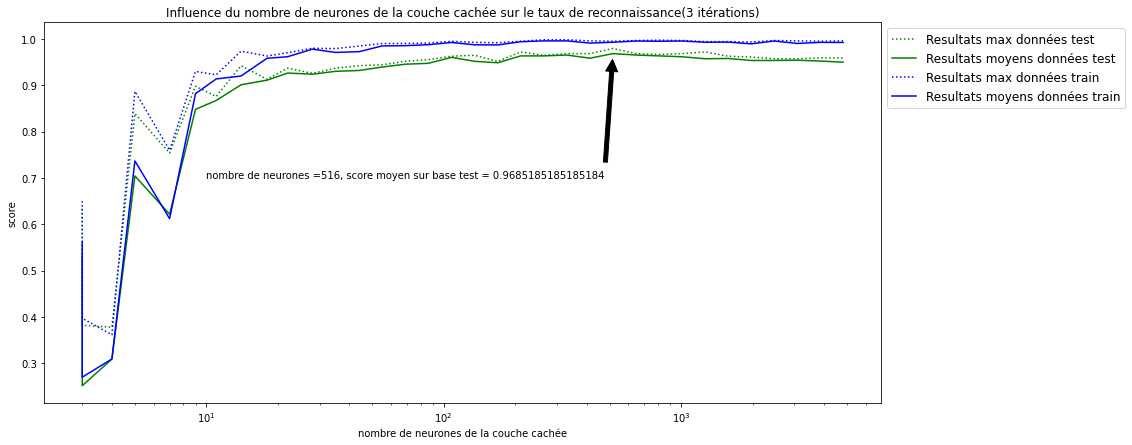

In [39]:
plt.figure(figsize=(15,7))
plt.title("Influence du nombre de neurones de la couche cachée sur le taux de reconnaissance(3 itérations)")
plt.ylabel('score')
plt.xlabel('nombre de neurones de la couche cachée')
plt.annotate('nombre de neurones ='+ str(int(1.25**([np.mean(result) for result in clfVResultsTest].index(max([np.mean(result) for result in clfVResultsTest])) + 5)))+', score moyen sur base test = ' + str(max([np.mean(result) for result in clfVResultsTest])), xy= (int(1.25**([np.mean(result) for result in clfVResultsTest].index(max([np.mean(result) for result in clfVResultsTest])) + 5)),max([np.mean(result) for result in clfVResultsTest])), xytext=( 10,0.7) ,arrowprops=dict(facecolor='black', shrink=0.05),)

plt.plot([int(1.25**x) for x in range(5,39)],[max(result) for result in clfVResultsTest],label ="Resultats max données test", color="green", linestyle =':')
plt.plot([int(1.25**x) for x in range(5,39)],[np.mean(result) for result in clfVResultsTest],label ="Resultats moyens données test", color="green")
plt.plot([int(1.25**x) for x in range(5,39)],[max(result) for result in clfVResultsTrain],label ="Resultats max données train",color="blue", linestyle =':')
plt.plot([int(1.25**x) for x in range(5,39)],[np.mean(result) for result in clfVResultsTrain],label ="Resultats moyens données train",color="blue")
plt.xscale('log')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5, fontsize = 'large');

### On voit qu'avec la cross validation, le nombre de neurones de la couche cachée pour un résultat optimal semble être autour de 500 comme pour la dernière fois

## Etudions la moyenne et l’écart-type des taux en apprentissage  et  en  validation 


### Sans cross-validation

In [53]:
clf2 = []
clf2ResultsTrain = []
clf2ResultsTest = []

for it in range(10):
    print("entrainement num",it)
    clf2.append(MLPClassifier(hidden_layer_sizes=500, max_iter=500, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=1))
    clf2[it].fit(X_train,y_train)
    clf2ResultsTrain.append(clf2[it].score(X_train,y_train))
    clf2ResultsTest.append(clf2[it].score(X_test,y_test))

entrainement num 0
Iteration 1, loss = 0.56573661
Iteration 2, loss = 0.27245819
Iteration 3, loss = 0.21063412
Iteration 4, loss = 0.20041157
Iteration 5, loss = 0.18590901
Iteration 6, loss = 0.13615437
Iteration 7, loss = 0.10210021
Iteration 8, loss = 0.09388047
Iteration 9, loss = 0.14354804
Iteration 10, loss = 0.07580510
Iteration 11, loss = 0.07123304
Iteration 12, loss = 0.07522424
Iteration 13, loss = 0.11092629
Iteration 14, loss = 0.06588143
Iteration 15, loss = 0.09509132
Iteration 16, loss = 0.11775036
Iteration 17, loss = 0.06756559
Iteration 18, loss = 0.06132921
Iteration 19, loss = 0.06016694
Iteration 20, loss = 0.07685395
Iteration 21, loss = 0.06042184
Iteration 22, loss = 0.08909925
Iteration 23, loss = 0.06258407
Iteration 24, loss = 0.07426134
Iteration 25, loss = 0.05043325
Iteration 26, loss = 0.08365840
Iteration 27, loss = 0.05036800
Iteration 28, loss = 0.05854084
Iteration 29, loss = 0.04716836
Iteration 30, loss = 0.05378730
Iteration 31, loss = 0.0641272

Iteration 102, loss = 0.00066437
Iteration 103, loss = 0.00066436
Iteration 104, loss = 0.00066436
Iteration 105, loss = 0.00066435
Iteration 106, loss = 0.00066434
Iteration 107, loss = 0.00066434
Iteration 108, loss = 0.00066433
Iteration 109, loss = 0.00066433
Iteration 110, loss = 0.00066432
Iteration 111, loss = 0.00066432
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
entrainement num 2
Iteration 1, loss = 0.53423456
Iteration 2, loss = 0.24916888
Iteration 3, loss = 0.19500229
Iteration 4, loss = 0.15931505
Iteration 5, loss = 0.17429552
Iteration 6, loss = 0.14238656
Iteration 7, loss = 0.08089629
Iteration 8, loss = 0.10998845
Iteration 9, loss = 0.10377030
Iteration 10, loss = 0.11564020
Iteration 11, loss = 0.08358350
Iteration 12, loss = 0.07225851
Iteration 13, loss = 0.08293544
Iteration 14, loss = 0.06468104
Iteration 15, loss = 0.08726082
Iteration 16, loss = 0.11744284
Iteration 17, loss = 0.08465172
I

Iteration 92, loss = 0.00065482
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 93, loss = 0.00065455
Iteration 94, loss = 0.00065452
Iteration 95, loss = 0.00065449
Iteration 96, loss = 0.00065446
Iteration 97, loss = 0.00065443
Iteration 98, loss = 0.00065440
Iteration 99, loss = 0.00065437
Iteration 100, loss = 0.00065434
Iteration 101, loss = 0.00065431
Iteration 102, loss = 0.00065429
Iteration 103, loss = 0.00065426
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 104, loss = 0.00065420
Iteration 105, loss = 0.00065419
Iteration 106, loss = 0.00065419
Iteration 107, loss = 0.00065418
Iteration 108, loss = 0.00065418
Iteration 109, loss = 0.00065417
Iteration 110, loss = 0.00065417
Iteration 111, loss = 0.00065416
Iteration 112, loss = 0.00065415
Iteration 113, loss = 0.00065415
Iteration 114, loss = 0.00065414
Training loss did not

Iteration 82, loss = 0.00063468
Iteration 83, loss = 0.00063468
Iteration 84, loss = 0.00063467
Iteration 85, loss = 0.00063467
Iteration 86, loss = 0.00063466
Iteration 87, loss = 0.00063465
Iteration 88, loss = 0.00063465
Iteration 89, loss = 0.00063464
Iteration 90, loss = 0.00063464
Iteration 91, loss = 0.00063463
Iteration 92, loss = 0.00063462
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
entrainement num 6
Iteration 1, loss = 0.52677295
Iteration 2, loss = 0.22723937
Iteration 3, loss = 0.18574606
Iteration 4, loss = 0.17678072
Iteration 5, loss = 0.12278217
Iteration 6, loss = 0.16328193
Iteration 7, loss = 0.17807279
Iteration 8, loss = 0.10598204
Iteration 9, loss = 0.13668991
Iteration 10, loss = 0.14473710
Iteration 11, loss = 0.14298184
Iteration 12, loss = 0.09959919
Iteration 13, loss = 0.10069633
Iteration 14, loss = 0.13087709
Iteration 15, loss = 0.11594646
Iteration 16, loss = 0.12874053
Iteration 1

Iteration 99, loss = 0.00207987
Iteration 100, loss = 0.00207858
Iteration 101, loss = 0.00207719
Iteration 102, loss = 0.00207600
Iteration 103, loss = 0.00207474
Iteration 104, loss = 0.00207343
Iteration 105, loss = 0.00207218
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 106, loss = 0.00206867
Iteration 107, loss = 0.00206846
Iteration 108, loss = 0.00206821
Iteration 109, loss = 0.00206795
Iteration 110, loss = 0.00206770
Iteration 111, loss = 0.00206744
Iteration 112, loss = 0.00206722
Iteration 113, loss = 0.00206693
Iteration 114, loss = 0.00206669
Iteration 115, loss = 0.00206646
Iteration 116, loss = 0.00206620
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 117, loss = 0.00206550
Iteration 118, loss = 0.00206544
Iteration 119, loss = 0.00206539
Iteration 120, loss = 0.00206534
Iteration 121, loss = 0.00206529
Iteration 122,

Iteration 71, loss = 0.00059298
Iteration 72, loss = 0.00059235
Iteration 73, loss = 0.00059169
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 74, loss = 0.00059052
Iteration 75, loss = 0.00059038
Iteration 76, loss = 0.00059026
Iteration 77, loss = 0.00059013
Iteration 78, loss = 0.00059001
Iteration 79, loss = 0.00058988
Iteration 80, loss = 0.00058975
Iteration 81, loss = 0.00058963
Iteration 82, loss = 0.00058950
Iteration 83, loss = 0.00058939
Iteration 84, loss = 0.00058925
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 85, loss = 0.00058901
Iteration 86, loss = 0.00058898
Iteration 87, loss = 0.00058896
Iteration 88, loss = 0.00058893
Iteration 89, loss = 0.00058891
Iteration 90, loss = 0.00058888
Iteration 91, loss = 0.00058886
Iteration 92, loss = 0.00058883
Iteration 93, loss = 0.00058881
Iteration 94, loss = 0.00058878
Iter

In [60]:
print('La moyenne pour un nombre de neurones cachés sans cross-validation et de 500 est de',np.mean(clf2ResultsTest))
print("L'écart type est de :", np.std(clf2ResultsTest))

La moyenne pour un nombre de neurones cachés sans cross-validation et de 500 est de 0.9288888888888888
L'écart type est de : 0.013887654266113087


### Avec cross-validation

In [58]:
clfCV2 = []
clfCVResultsTrain2 = []
clfCVResultsTest2 = []

for it in range(10):
    print("entrainement num",it)
    clfCV2.append(MLPClassifier(hidden_layer_sizes=500,early_stopping=True, max_iter=500,validation_fraction=0.2, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=1))
    clfCV2[it].fit(X_train,y_train)
    clfCVResultsTrain2.append(clfCV2[it].score(X_train,y_train))
    clfCVResultsTest2.append(clfCV2[it].score(X_test,y_test))
    
    

entrainement num 0
Iteration 1, loss = 0.64591213
Validation score: 0.809524
Iteration 2, loss = 0.24160027
Validation score: 0.912698
Iteration 3, loss = 0.23157543
Validation score: 0.920635
Iteration 4, loss = 0.12290691
Validation score: 0.940476
Iteration 5, loss = 0.10208840
Validation score: 0.920635
Iteration 6, loss = 0.09789246
Validation score: 0.944444
Iteration 7, loss = 0.08496277
Validation score: 0.936508
Iteration 8, loss = 0.10087218
Validation score: 0.964286
Iteration 9, loss = 0.08185323
Validation score: 0.964286
Iteration 10, loss = 0.08114490
Validation score: 0.940476
Iteration 11, loss = 0.06376789
Validation score: 0.964286
Iteration 12, loss = 0.07771212
Validation score: 0.960317
Iteration 13, loss = 0.06050488
Validation score: 0.948413
Iteration 14, loss = 0.08866334
Validation score: 0.980159
Iteration 15, loss = 0.09562122
Validation score: 0.952381
Iteration 16, loss = 0.03991115
Validation score: 0.968254
Iteration 17, loss = 0.02899302
Validation sco

Iteration 44, loss = 0.00067530
Validation score: 0.972222
Iteration 45, loss = 0.00067433
Validation score: 0.972222
Iteration 46, loss = 0.00067323
Validation score: 0.972222
Iteration 47, loss = 0.00067222
Validation score: 0.972222
Iteration 48, loss = 0.00067117
Validation score: 0.972222
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 49, loss = 0.00066963
Validation score: 0.972222
Iteration 50, loss = 0.00066943
Validation score: 0.972222
Iteration 51, loss = 0.00066922
Validation score: 0.972222
Iteration 52, loss = 0.00066901
Validation score: 0.972222
Iteration 53, loss = 0.00066881
Validation score: 0.972222
Iteration 54, loss = 0.00066860
Validation score: 0.972222
Iteration 55, loss = 0.00066840
Validation score: 0.972222
Iteration 56, loss = 0.00066820
Validation score: 0.972222
Iteration 57, loss = 0.00066800
Validation score: 0.972222
Iteration 58, loss = 0.00066780
Validation score: 0.97222

Iteration 8, loss = 0.08099688
Validation score: 0.948413
Iteration 9, loss = 0.04536812
Validation score: 0.968254
Iteration 10, loss = 0.06179217
Validation score: 0.948413
Iteration 11, loss = 0.05459570
Validation score: 0.964286
Iteration 12, loss = 0.06291386
Validation score: 0.956349
Iteration 13, loss = 0.05269281
Validation score: 0.956349
Iteration 14, loss = 0.06209780
Validation score: 0.928571
Iteration 15, loss = 0.05929175
Validation score: 0.972222
Iteration 16, loss = 0.02113432
Validation score: 0.956349
Iteration 17, loss = 0.01706098
Validation score: 0.972222
Iteration 18, loss = 0.00322171
Validation score: 0.976190
Iteration 19, loss = 0.00208259
Validation score: 0.976190
Iteration 20, loss = 0.00166502
Validation score: 0.976190
Iteration 21, loss = 0.00143641
Validation score: 0.976190
Iteration 22, loss = 0.00130560
Validation score: 0.976190
Iteration 23, loss = 0.00118192
Validation score: 0.976190
Iteration 24, loss = 0.00110200
Validation score: 0.976190

Iteration 47, loss = 0.00072111
Validation score: 0.968254
Iteration 48, loss = 0.00072001
Validation score: 0.968254
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 49, loss = 0.00071819
Validation score: 0.968254
Iteration 50, loss = 0.00071797
Validation score: 0.968254
Iteration 51, loss = 0.00071777
Validation score: 0.968254
Iteration 52, loss = 0.00071755
Validation score: 0.968254
Iteration 53, loss = 0.00071732
Validation score: 0.968254
Iteration 54, loss = 0.00071711
Validation score: 0.968254
Iteration 55, loss = 0.00071690
Validation score: 0.968254
Iteration 56, loss = 0.00071666
Validation score: 0.968254
Iteration 57, loss = 0.00071646
Validation score: 0.968254
Iteration 58, loss = 0.00071625
Validation score: 0.968254
Iteration 59, loss = 0.00071605
Validation score: 0.968254
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002

Iteration 87, loss = 0.00071564
Validation score: 0.984127
Iteration 88, loss = 0.00071564
Validation score: 0.984127
Iteration 89, loss = 0.00071563
Validation score: 0.984127
Iteration 90, loss = 0.00071562
Validation score: 0.984127
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
entrainement num 6
Iteration 1, loss = 0.62442488
Validation score: 0.853175
Iteration 2, loss = 0.28124499
Validation score: 0.916667
Iteration 3, loss = 0.18990787
Validation score: 0.928571
Iteration 4, loss = 0.20372684
Validation score: 0.940476
Iteration 5, loss = 0.12137824
Validation score: 0.900794
Iteration 6, loss = 0.14911960
Validation score: 0.892857
Iteration 7, loss = 0.09604681
Validation score: 0.952381
Iteration 8, loss = 0.08531193
Validation score: 0.968254
Iteration 9, loss = 0.11396360
Validation score: 0.956349
Iteration 10, loss = 0.07466554
Validation score: 0.888889
Iteration 11, loss = 0.07278055
Validation sco

Iteration 39, loss = 0.00062663
Validation score: 0.980159
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 40, loss = 0.00061920
Validation score: 0.980159
Iteration 41, loss = 0.00061847
Validation score: 0.980159
Iteration 42, loss = 0.00061770
Validation score: 0.980159
Iteration 43, loss = 0.00061700
Validation score: 0.980159
Iteration 44, loss = 0.00061623
Validation score: 0.980159
Iteration 45, loss = 0.00061545
Validation score: 0.980159
Iteration 46, loss = 0.00061477
Validation score: 0.980159
Iteration 47, loss = 0.00061404
Validation score: 0.980159
Iteration 48, loss = 0.00061330
Validation score: 0.980159
Iteration 49, loss = 0.00061257
Validation score: 0.980159
Iteration 50, loss = 0.00061187
Validation score: 0.980159
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 51, loss = 0.00061044
Validation score: 0.980159

Iteration 76, loss = 0.00096437
Validation score: 0.980159
Iteration 77, loss = 0.00096436
Validation score: 0.980159
Iteration 78, loss = 0.00096434
Validation score: 0.980159
Iteration 79, loss = 0.00096432
Validation score: 0.980159
Iteration 80, loss = 0.00096431
Validation score: 0.980159
Iteration 81, loss = 0.00096429
Validation score: 0.980159
Iteration 82, loss = 0.00096427
Validation score: 0.980159
Iteration 83, loss = 0.00096426
Validation score: 0.980159
Iteration 84, loss = 0.00096424
Validation score: 0.980159
Iteration 85, loss = 0.00096422
Validation score: 0.980159
Iteration 86, loss = 0.00096421
Validation score: 0.980159
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
entrainement num 9
Iteration 1, loss = 0.61686216
Validation score: 0.821429
Iteration 2, loss = 0.24691916
Validation score: 0.928571
Iteration 3, loss = 0.19888654
Validation score: 0.821429
Iteration 4, loss = 0.15969858
Validatio

In [59]:
print('La moyenne pour un nombre de neurones cachés avec cross-validation et de 500 est de',np.mean(clfCVResultsTest2))
print("L'écart type est de :", np.std(clfCVResultsTest2))


La moyenne pour un nombre de neurones cachés avec cross-validation et de 500 est de 0.9683333333333332
L'écart type est de : 0.005267208390121449


In [56]:
clf2 = []
clf2ResultsTrain = []
clf2ResultsTest = []

for it in range(10):
    print("entrainement num",it)
    clf2.append(MLPClassifier(hidden_layer_sizes=20, max_iter=500, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=1))
    clf2[it].fit(X_train,y_train)
    clf2ResultsTrain.append(clf2[it].score(X_train,y_train))
    clf2ResultsTest.append(clf2[it].score(X_test,y_test))

entrainement num 0
Iteration 1, loss = 1.63297953
Iteration 2, loss = 0.95963018
Iteration 3, loss = 0.74393089
Iteration 4, loss = 0.62392109
Iteration 5, loss = 0.59932873
Iteration 6, loss = 0.53065056
Iteration 7, loss = 0.49594504
Iteration 8, loss = 0.51592606
Iteration 9, loss = 0.49829614
Iteration 10, loss = 0.39546410
Iteration 11, loss = 0.51677752
Iteration 12, loss = 0.41273299
Iteration 13, loss = 0.46887430
Iteration 14, loss = 0.47569389
Iteration 15, loss = 0.43218908
Iteration 16, loss = 0.43646551
Iteration 17, loss = 0.50557275
Iteration 18, loss = 0.53101215
Iteration 19, loss = 0.48965339
Iteration 20, loss = 0.52586171
Iteration 21, loss = 0.47588284
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 22, loss = 0.36772763
Iteration 23, loss = 0.32401358
Iteration 24, loss = 0.30403844
Iteration 25, loss = 0.27899266
Iteration 26, loss = 0.27503529
Iteration 27, loss = 0.27122213
Iteration 28

Iteration 242, loss = 0.08819325
Iteration 243, loss = 0.08818956
Iteration 244, loss = 0.08818788
Iteration 245, loss = 0.08818471
Iteration 246, loss = 0.08818169
Iteration 247, loss = 0.08817840
Iteration 248, loss = 0.08817640
Iteration 249, loss = 0.08817098
Iteration 250, loss = 0.08816887
Iteration 251, loss = 0.08816484
Iteration 252, loss = 0.08816585
Iteration 253, loss = 0.08816061
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 254, loss = 0.08812949
Iteration 255, loss = 0.08812955
Iteration 256, loss = 0.08812870
Iteration 257, loss = 0.08812850
Iteration 258, loss = 0.08812786
Iteration 259, loss = 0.08812694
Iteration 260, loss = 0.08812671
Iteration 261, loss = 0.08812574
Iteration 262, loss = 0.08812517
Iteration 263, loss = 0.08812489
Iteration 264, loss = 0.08812468
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 265

Iteration 205, loss = 0.04333892
Iteration 206, loss = 0.04322507
Iteration 207, loss = 0.04331079
Iteration 208, loss = 0.04626943
Iteration 209, loss = 0.04408368
Iteration 210, loss = 0.04297466
Iteration 211, loss = 0.04353835
Iteration 212, loss = 0.04298172
Iteration 213, loss = 0.04288949
Iteration 214, loss = 0.04272565
Iteration 215, loss = 0.04278691
Iteration 216, loss = 0.04264831
Iteration 217, loss = 0.04257804
Iteration 218, loss = 0.04254105
Iteration 219, loss = 0.04236964
Iteration 220, loss = 0.04237451
Iteration 221, loss = 0.04233557
Iteration 222, loss = 0.04226703
Iteration 223, loss = 0.04215461
Iteration 224, loss = 0.04201428
Iteration 225, loss = 0.04199366
Iteration 226, loss = 0.04236471
Iteration 227, loss = 0.04216742
Iteration 228, loss = 0.04184697
Iteration 229, loss = 0.04180184
Iteration 230, loss = 0.04186056
Iteration 231, loss = 0.04177923
Iteration 232, loss = 0.04177165
Iteration 233, loss = 0.04167100
Iteration 234, loss = 0.04158295
Iteration 

Iteration 104, loss = 0.06400001
Iteration 105, loss = 0.06367882
Iteration 106, loss = 0.06320933
Iteration 107, loss = 0.06292356
Iteration 108, loss = 0.06388539
Iteration 109, loss = 0.06337749
Iteration 110, loss = 0.06168235
Iteration 111, loss = 0.06178643
Iteration 112, loss = 0.06109721
Iteration 113, loss = 0.06212990
Iteration 114, loss = 0.06414515
Iteration 115, loss = 0.06153298
Iteration 116, loss = 0.06065538
Iteration 117, loss = 0.06031386
Iteration 118, loss = 0.06005775
Iteration 119, loss = 0.05985454
Iteration 120, loss = 0.05942614
Iteration 121, loss = 0.05907701
Iteration 122, loss = 0.05876545
Iteration 123, loss = 0.05914256
Iteration 124, loss = 0.05824283
Iteration 125, loss = 0.05814050
Iteration 126, loss = 0.05796254
Iteration 127, loss = 0.05806826
Iteration 128, loss = 0.05734465
Iteration 129, loss = 0.05996736
Iteration 130, loss = 0.05733086
Iteration 131, loss = 0.05696297
Iteration 132, loss = 0.05675361
Iteration 133, loss = 0.05655891
Iteration 

Iteration 56, loss = 0.16346960
Iteration 57, loss = 0.15487690
Iteration 58, loss = 0.16422568
Iteration 59, loss = 0.17456660
Iteration 60, loss = 0.14655141
Iteration 61, loss = 0.14262119
Iteration 62, loss = 0.13799408
Iteration 63, loss = 0.13025292
Iteration 64, loss = 0.12182490
Iteration 65, loss = 0.11505684
Iteration 66, loss = 0.11430512
Iteration 67, loss = 0.11214354
Iteration 68, loss = 0.11449456
Iteration 69, loss = 0.11075819
Iteration 70, loss = 0.10781165
Iteration 71, loss = 0.10788706
Iteration 72, loss = 0.10589320
Iteration 73, loss = 0.10650998
Iteration 74, loss = 0.10507140
Iteration 75, loss = 0.10433290
Iteration 76, loss = 0.10478684
Iteration 77, loss = 0.10766426
Iteration 78, loss = 0.10339590
Iteration 79, loss = 0.10339747
Iteration 80, loss = 0.10221791
Iteration 81, loss = 0.10164860
Iteration 82, loss = 0.10246873
Iteration 83, loss = 0.10057162
Iteration 84, loss = 0.10003070
Iteration 85, loss = 0.10481155
Iteration 86, loss = 0.10185634
Iteratio

Iteration 101, loss = 0.06525338
Iteration 102, loss = 0.06527978
Iteration 103, loss = 0.06469988
Iteration 104, loss = 0.06543202
Iteration 105, loss = 0.06466435
Iteration 106, loss = 0.06341399
Iteration 107, loss = 0.06326725
Iteration 108, loss = 0.06309385
Iteration 109, loss = 0.06293042
Iteration 110, loss = 0.06270523
Iteration 111, loss = 0.06261934
Iteration 112, loss = 0.06230922
Iteration 113, loss = 0.06212129
Iteration 114, loss = 0.06187246
Iteration 115, loss = 0.06189261
Iteration 116, loss = 0.06141499
Iteration 117, loss = 0.06118083
Iteration 118, loss = 0.06103011
Iteration 119, loss = 0.06093283
Iteration 120, loss = 0.06067880
Iteration 121, loss = 0.06054092
Iteration 122, loss = 0.06038093
Iteration 123, loss = 0.06026368
Iteration 124, loss = 0.06012804
Iteration 125, loss = 0.05996339
Iteration 126, loss = 0.05986716
Iteration 127, loss = 0.05969991
Iteration 128, loss = 0.05951839
Iteration 129, loss = 0.05943061
Iteration 130, loss = 0.05928173
Iteration 

Iteration 22, loss = 0.50803513
Iteration 23, loss = 0.40151619
Iteration 24, loss = 0.37967751
Iteration 25, loss = 0.31281379
Iteration 26, loss = 0.30354065
Iteration 27, loss = 0.32920909
Iteration 28, loss = 0.28565641
Iteration 29, loss = 0.27350203
Iteration 30, loss = 0.25513382
Iteration 31, loss = 0.29104279
Iteration 32, loss = 0.21330019
Iteration 33, loss = 0.22629018
Iteration 34, loss = 0.28109620
Iteration 35, loss = 0.30430727
Iteration 36, loss = 0.33803503
Iteration 37, loss = 0.36713510
Iteration 38, loss = 0.34052021
Iteration 39, loss = 0.30994981
Iteration 40, loss = 0.25903597
Iteration 41, loss = 0.21444771
Iteration 42, loss = 0.18742557
Iteration 43, loss = 0.19714103
Iteration 44, loss = 0.27753657
Iteration 45, loss = 0.19386855
Iteration 46, loss = 0.26422113
Iteration 47, loss = 0.15858111
Iteration 48, loss = 0.19098323
Iteration 49, loss = 0.14276864
Iteration 50, loss = 0.15619211
Iteration 51, loss = 0.16410122
Iteration 52, loss = 0.16884444
Iteratio

Iteration 21, loss = 0.35602974
Iteration 22, loss = 0.35345692
Iteration 23, loss = 0.46036599
Iteration 24, loss = 0.43187467
Iteration 25, loss = 0.48818637
Iteration 26, loss = 0.38177297
Iteration 27, loss = 0.36380551
Iteration 28, loss = 0.35558766
Iteration 29, loss = 0.34267831
Iteration 30, loss = 0.39389440
Iteration 31, loss = 0.27502325
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 32, loss = 0.20950542
Iteration 33, loss = 0.18846806
Iteration 34, loss = 0.18226292
Iteration 35, loss = 0.18469552
Iteration 36, loss = 0.17453662
Iteration 37, loss = 0.16528071
Iteration 38, loss = 0.15554499
Iteration 39, loss = 0.15203623
Iteration 40, loss = 0.14258556
Iteration 41, loss = 0.14491390
Iteration 42, loss = 0.13887214
Iteration 43, loss = 0.12969609
Iteration 44, loss = 0.13048955
Iteration 45, loss = 0.12563118
Iteration 46, loss = 0.12513211
Iteration 47, loss = 0.12256974
Iteration 48, loss = 0

Iteration 269, loss = 0.06114393
Iteration 270, loss = 0.06100684
Iteration 271, loss = 0.06094988
Iteration 272, loss = 0.06082907
Iteration 273, loss = 0.06074931
Iteration 274, loss = 0.06068784
Iteration 275, loss = 0.06059217
Iteration 276, loss = 0.06062651
Iteration 277, loss = 0.06050800
Iteration 278, loss = 0.06044817
Iteration 279, loss = 0.06039540
Iteration 280, loss = 0.06031700
Iteration 281, loss = 0.06022924
Iteration 282, loss = 0.06015245
Iteration 283, loss = 0.05992286
Iteration 284, loss = 0.06031152
Iteration 285, loss = 0.06003795
Iteration 286, loss = 0.05995545
Iteration 287, loss = 0.05969433
Iteration 288, loss = 0.05997510
Iteration 289, loss = 0.05988754
Iteration 290, loss = 0.05973837
Iteration 291, loss = 0.05948498
Iteration 292, loss = 0.05928162
Iteration 293, loss = 0.05908823
Iteration 294, loss = 0.05886298
Iteration 295, loss = 0.05863649
Iteration 296, loss = 0.05881972
Iteration 297, loss = 0.05852024
Iteration 298, loss = 0.05846102
Iteration 

Iteration 97, loss = 0.05878942
Iteration 98, loss = 0.05825911
Iteration 99, loss = 0.05795286
Iteration 100, loss = 0.05766136
Iteration 101, loss = 0.05729455
Iteration 102, loss = 0.05716239
Iteration 103, loss = 0.05697954
Iteration 104, loss = 0.05660307
Iteration 105, loss = 0.05673800
Iteration 106, loss = 0.06565568
Iteration 107, loss = 0.05987448
Iteration 108, loss = 0.05728972
Iteration 109, loss = 0.05719742
Iteration 110, loss = 0.05594366
Iteration 111, loss = 0.07010579
Iteration 112, loss = 0.06335026
Iteration 113, loss = 0.05998941
Iteration 114, loss = 0.05716767
Iteration 115, loss = 0.05707768
Iteration 116, loss = 0.05547075
Iteration 117, loss = 0.05553870
Iteration 118, loss = 0.05440887
Iteration 119, loss = 0.05417152
Iteration 120, loss = 0.05390543
Iteration 121, loss = 0.05371202
Iteration 122, loss = 0.05498581
Iteration 123, loss = 0.05331655
Iteration 124, loss = 0.05313502
Iteration 125, loss = 0.05286716
Iteration 126, loss = 0.05293325
Iteration 127

Iteration 339, loss = 0.03503600
Iteration 340, loss = 0.03499295
Iteration 341, loss = 0.03496926
Iteration 342, loss = 0.03496087
Iteration 343, loss = 0.03495610
Iteration 344, loss = 0.03495332
Iteration 345, loss = 0.03495151
Iteration 346, loss = 0.03494787
Iteration 347, loss = 0.03494548
Iteration 348, loss = 0.03494219
Iteration 349, loss = 0.03493999
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 350, loss = 0.03492827
Iteration 351, loss = 0.03492790
Iteration 352, loss = 0.03492742
Iteration 353, loss = 0.03492682
Iteration 354, loss = 0.03492646
Iteration 355, loss = 0.03492591
Iteration 356, loss = 0.03492539
Iteration 357, loss = 0.03492502
Iteration 358, loss = 0.03492430
Iteration 359, loss = 0.03492391
Iteration 360, loss = 0.03492341
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 361, loss = 0.03492114
Iteration 362

Iteration 206, loss = 0.03356984
Iteration 207, loss = 0.03347925
Iteration 208, loss = 0.03339429
Iteration 209, loss = 0.03331143
Iteration 210, loss = 0.03323684
Iteration 211, loss = 0.03315857
Iteration 212, loss = 0.03309290
Iteration 213, loss = 0.03301330
Iteration 214, loss = 0.03294436
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 215, loss = 0.03266743
Iteration 216, loss = 0.03264978
Iteration 217, loss = 0.03263567
Iteration 218, loss = 0.03262733
Iteration 219, loss = 0.03260460
Iteration 220, loss = 0.03258886
Iteration 221, loss = 0.03257528
Iteration 222, loss = 0.03255848
Iteration 223, loss = 0.03254383
Iteration 224, loss = 0.03252897
Iteration 225, loss = 0.03251020
Iteration 226, loss = 0.03250039
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 227, loss = 0.03244283
Iteration 228, loss = 0.03244068
Iteration 229

Iteration 178, loss = 0.04105672
Iteration 179, loss = 0.03716789
Iteration 180, loss = 0.03677014
Iteration 181, loss = 0.03838239
Iteration 182, loss = 0.03890109
Iteration 183, loss = 0.03806740
Iteration 184, loss = 0.03660457
Iteration 185, loss = 0.03704966
Iteration 186, loss = 0.03757085
Iteration 187, loss = 0.03598873
Iteration 188, loss = 0.03571458
Iteration 189, loss = 0.03561734
Iteration 190, loss = 0.03546929
Iteration 191, loss = 0.03534453
Iteration 192, loss = 0.03524237
Iteration 193, loss = 0.03515577
Iteration 194, loss = 0.03511814
Iteration 195, loss = 0.03498145
Iteration 196, loss = 0.03487219
Iteration 197, loss = 0.03487506
Iteration 198, loss = 0.03466998
Iteration 199, loss = 0.03458725
Iteration 200, loss = 0.03455184
Iteration 201, loss = 0.03444395
Iteration 202, loss = 0.03436316
Iteration 203, loss = 0.03426971
Iteration 204, loss = 0.03415437
Iteration 205, loss = 0.03409677
Iteration 206, loss = 0.03397443
Iteration 207, loss = 0.03392584
Iteration 

In [57]:
print('La moyenne pour un nombre de neurones cachés sans cross-validation et de 500 est de',np.mean(clf2ResultsTest))
print("L'écart type est de :", np.std(clf2ResultsTest))


La moyenne pour un nombre de neurones cachés sans cross-validation et de 500 est de 0.9288888888888888
L'écart type est de : 0.013887654266113087


### On remarque donc que l'utilisation de la cross validation a réduit de façon significative l'écart type et a légèrement augmenté le score de classification.
### On récupère les poids du réseau optimal dans une variable

In [20]:
poids = clfCV2[clfCVResultsTest2.index(max(clfCVResultsTest2))].coefs_
print ("Nous voyons les ",len(poids[0]),"puis les",len(poids[1]),"poids des neurones cachés")

Nous voyons les  64 puis les 500 poids des neurones cachés


## Etudions la matrice de confusion

In [29]:
yTestPredicted=clfCV2[clfCVResultsTest2.index(max(clfCVResultsTest2))].predict(X_test)
matriceConfusion = metrics.confusion_matrix(y_test,yTestPredicted)

### Nous utilisons de façon optionnelle la librairie seaborn qui permet de donner une carte de couleur plus parlente.

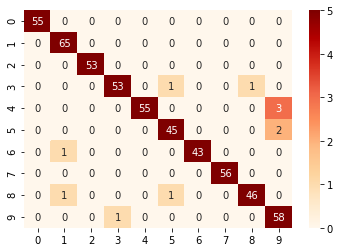

In [38]:
sn.heatmap(matriceConfusion, annot=True,cmap="OrRd",vmax = 5);

### Nous remarquons que la majorité des erreurs provient de la classification de 4 dans la classe 9

### Etudions le temps que prends notre modèle pour faire des prédictions

In [141]:
start_time = time.time()
clfCV2[clfCVResultsTest2.index(max(clfCVResultsTest2))].predict(X_test)
tempsExecution = time.time() - start_time
print("Le temps de classification est de", tempsExecution, "secondes, soit",tempsExecution/len(X_test) ," sec par classification" )

Le temps de classification est de 0.010979175567626953 secondes, soit 2.033180660671658e-05  sec par classification


## Etude avec un modèle KNN
### Nous pouvons déduire du dataset que le K optimal sera compris entre 1 et 54 autrement dit la taille du dataset/nombre de classes étant donné que nous allons tester sur le dataset de test de taille 540

In [39]:
len(X_test)

540

In [65]:
knnModels = []
KnnResultsTest = []
knnClassificationTime = []
KnnResultsTrain = []
for k in range (1,100):
    knnModels.append(KNeighborsClassifier(n_neighbors=k, algorithm='brute'))
    knnModels[k-1].fit(X_train,y_train)
    
    start_time=time.time()
    knnModels[k-1].predict(X_test)
    knnClassificationTime.append(time.time() - start_time)
    
    KnnResultsTest.append(knnModels[k-1].score(X_test,y_test))
    KnnResultsTrain.append(knnModels[k-1].score(X_train,y_train))

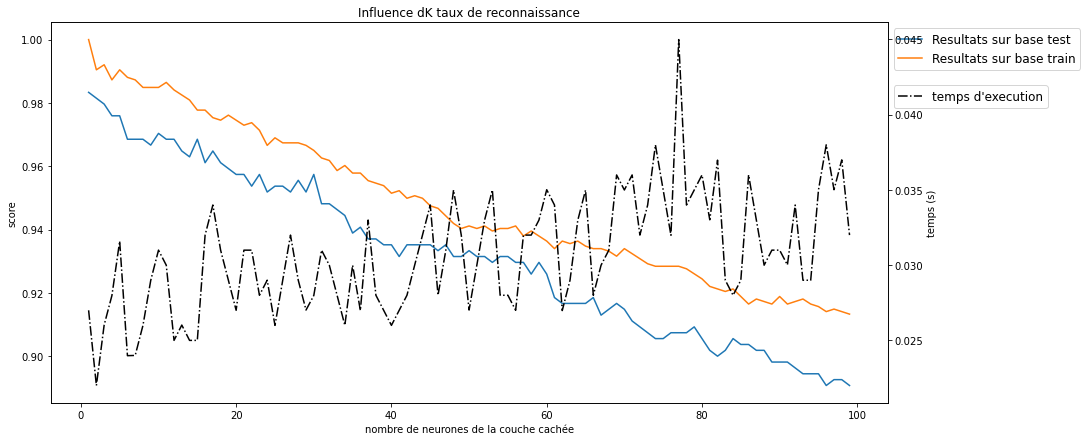

In [149]:
plt.figure(figsize=(15,7))
plt.title("Influence de K taux de reconnaissance")
plt.ylabel('score')
plt.xlabel('nombre de neurones de la couche cachée')
plt.plot(range(1,100),KnnResultsTest,label="Resultats sur base test")
plt.plot(range(1,100) ,KnnResultsTrain,label="Resultats sur base train")
#plt.plot(range(1,100),knnClassificationTime,label="Temps de classification")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5, fontsize = 'large');
axTime = plt.gca().twinx()
plt.ylabel('temps (s)')
axTime.plot(range(1,100),knnClassificationTime, color = 'black',linestyle ='-.',label="temps d'execution")
plt.legend(bbox_to_anchor=(1, 0.85), loc='upper left', borderaxespad=0.5, fontsize = 'large');

In [147]:
print("Le nombre optimal K semble être :",KnnResultsTest.index(max(KnnResultsTest)) + 1)
print("Pour ce dernier, le taux de reconnaissance est de  :",max(KnnResultsTest))

Le nombre optimal K semble être : 1
Pour ce dernier, le taux de reconnaissance est de  : 0.9833333333333333


## Le fait que K optimal soit 1 est surprenant, mais en réalité, cela signifie que la meilleure façon est de comparer chaque image qui doit être classifiée, à celle qui lui ressemble le plus de la base d'entrainement.

In [142]:
print("Le temps de classification est de", knnClassificationTime[KnnResultsTest.index(max(KnnResultsTest))], "secondes, soit",knnClassificationTime[KnnResultsTest.index(max(KnnResultsTest))]/len(X_test) ," sec par classification" )

Le temps de classification est de 0.02699112892150879 secondes, soit 4.998357207686813e-05  sec par classification


In [146]:
print("La classification par MLP avec C= 500 est ", knnClassificationTime[KnnResultsTest.index(max(KnnResultsTest))] / tempsExecution, "plus rapide qu'avec KNN, K = 1")

La classification par MLP avec C= 500 est  2.4583930510314875 plus rapide qu'avec KNN, K = 1


## On peut déduire de cela qu'en optimisant le paramètre de chaque modèle, KNN nous donne ici un taux de reconnaissance un peu meilleur, mais il éxécute aussi les classifications 2.5 fois moins vite.

# 4. Rejet
## a) Rejet de distance

In [72]:
def argmax_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=1) < threshold))

    return y_masked.filled(-1)

 

def argmax_top2_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_top2 = np.sort(y, axis=1)[:,-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[:,0] - y_top2[:,1]) < threshold))

    return y_masked.filled(-1)

In [221]:
yPredcV=clfCV2[clfCVResultsTest2.index(max(clfCVResultsTest2))].predict_proba(X_test)
arrayTauxRejet = []
arrayTauxReconnaissance = []
arrayExBienClasse = []
arrayNbRejete = []
for seuil in np.arange(0, 1, 0.01):
    arrayTauxRejet.append(np.count_nonzero(argmax_reject_threshold(yPredcV, seuil) == -1)/len(yPredcV))
    nbErreur = 0
    i = 0
    nbClasse = 0
    for el in argmax_reject_threshold(yPredcV, seuil):
        if el != -1:
            nbClasse+= 1
            if el != y_test[i]:
                nbErreur += 1
        i += 1
    arrayExBienClasse.append(nbClasse - nbErreur)
    arrayNbRejete.append(len(yPredcV) - nbClasse)
    arrayTauxReconnaissance.append((nbClasse-nbErreur)/nbClasse)


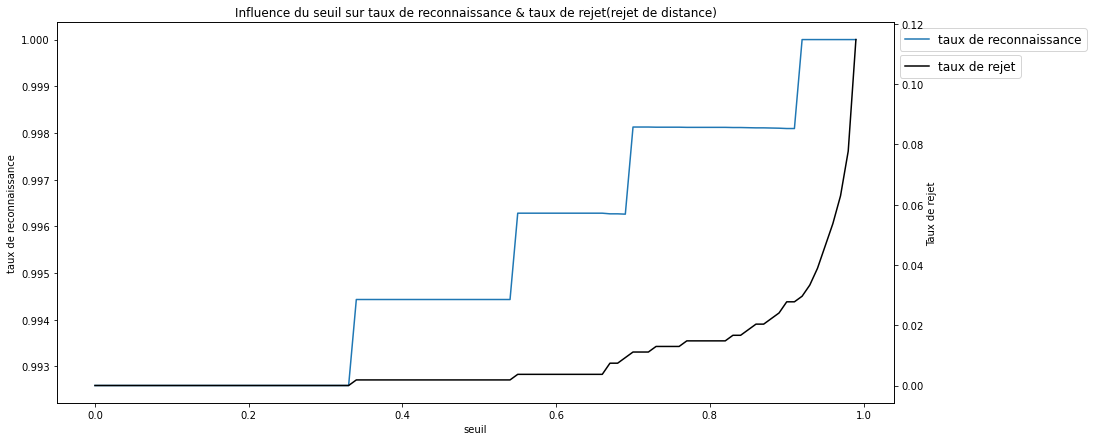

In [222]:
plt.figure(figsize=(15,7))
plt.title("Influence du seuil sur taux de reconnaissance & taux de rejet(rejet de distance)")
plt.ylabel('taux de reconnaissance')
plt.xlabel('seuil')
plt.plot(np.arange(0, 1, 0.01),arrayTauxReconnaissance,label="taux de reconnaissance")
#plt.plot(np.arange(0, 1, 0.01),arrayTauxRejet,label="taux de rejet")
#plt.plot(range(1,100),knnClassificationTime,label="Temps de classification")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5, fontsize = 'large');
axRejet = plt.gca().twinx()
plt.ylabel('Taux de rejet')
axRejet.plot(np.arange(0, 1, 0.01),arrayTauxRejet, color = 'black',label="taux de rejet")
plt.legend(bbox_to_anchor=(1, 0.93), loc='upper left', borderaxespad=0.5, fontsize = 'large');

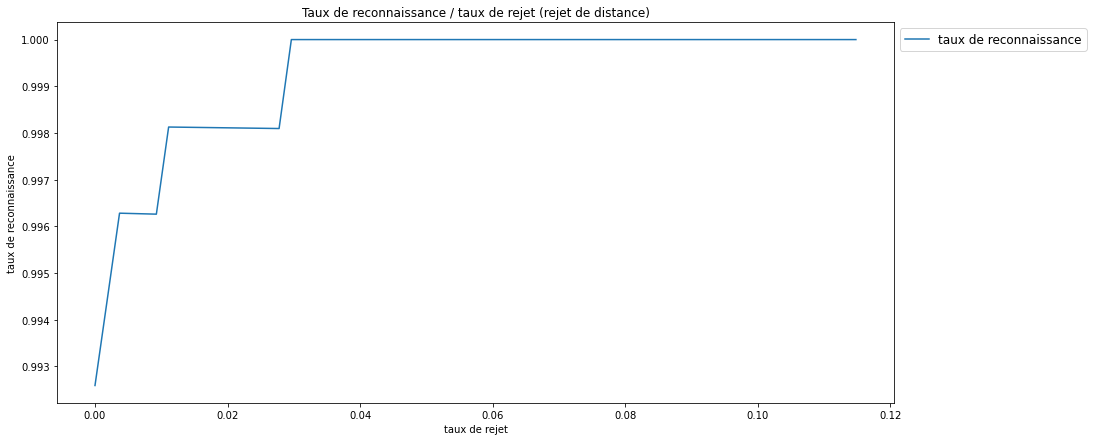

In [183]:
plt.figure(figsize=(15,7))
plt.title("Taux de reconnaissance / taux de rejet (rejet de distance)")
plt.ylabel('taux de reconnaissance')
plt.xlabel('taux de rejet')
plt.plot(arrayTauxRejet,arrayTauxReconnaissance,label="taux de reconnaissance")
#plt.plot(np.arange(0, 1, 0.01),arrayTauxRejet,label="taux de rejet")
#plt.plot(range(1,100),knnClassificationTime,label="Temps de classification")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5, fontsize = 'large');

## b) Rejet d'ambigüité

In [204]:
arrayTauxRejet2 = []
arrayTauxReconnaissance2 = []
arrayExBienClasse2 = []
arrayNbRejete2 = []
for seuil in np.arange(0, 1, 0.01):
    arrayTauxRejet2.append(np.count_nonzero(argmax_top2_reject_threshold(yPredcV, seuil) == -1)/len(yPredcV))
    nbErreur = 0
    i = 0
    nbClasse = 0
    for el in argmax_reject_threshold(yPredcV, seuil):
        if el != -1:
            nbClasse+= 1
            if el != y_test[i]:
                nbErreur += 1
        i += 1
    arrayExBienClasse2.append(nbClasse - nbErreur)
    arrayNbRejete2.append(len(yPredcV) - nbClasse)
    arrayTauxReconnaissance2.append((nbClasse-nbErreur)/nbClasse)
    

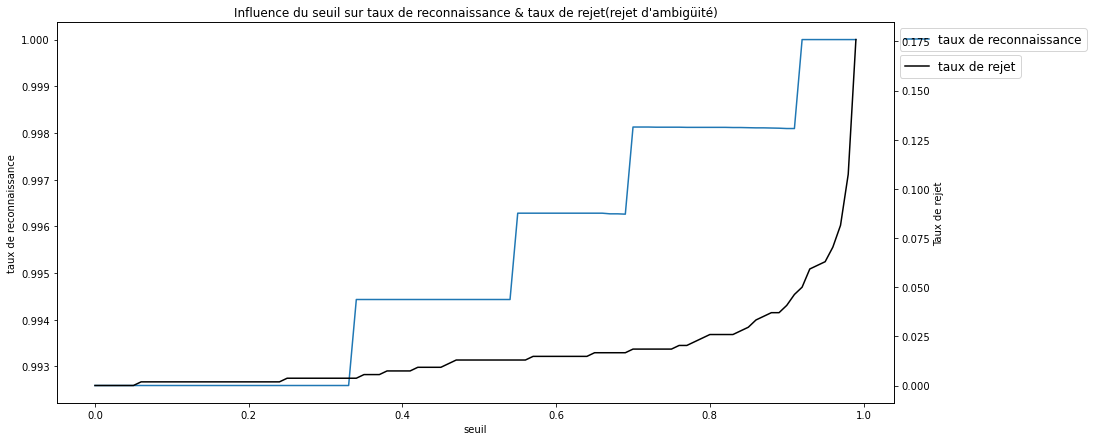

In [216]:
plt.figure(figsize=(15,7))
plt.title("Influence du seuil sur taux de reconnaissance & taux de rejet(rejet d'ambigüité)")
plt.ylabel('taux de reconnaissance')
plt.xlabel('seuil')
plt.plot(np.arange(0, 1, 0.01),arrayTauxReconnaissance2,label="taux de reconnaissance")
#plt.plot(np.arange(0, 1, 0.01),arrayTauxRejet,label="taux de rejet")
#plt.plot(range(1,100),knnClassificationTime,label="Temps de classification")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5, fontsize = 'large');
axRejet = plt.gca().twinx()
plt.ylabel('Taux de rejet')
axRejet.plot(np.arange(0, 1, 0.01),arrayTauxRejet2, color = 'black',label="taux de rejet")
plt.legend(bbox_to_anchor=(1, 0.93), loc='upper left', borderaxespad=0.5, fontsize = 'large');

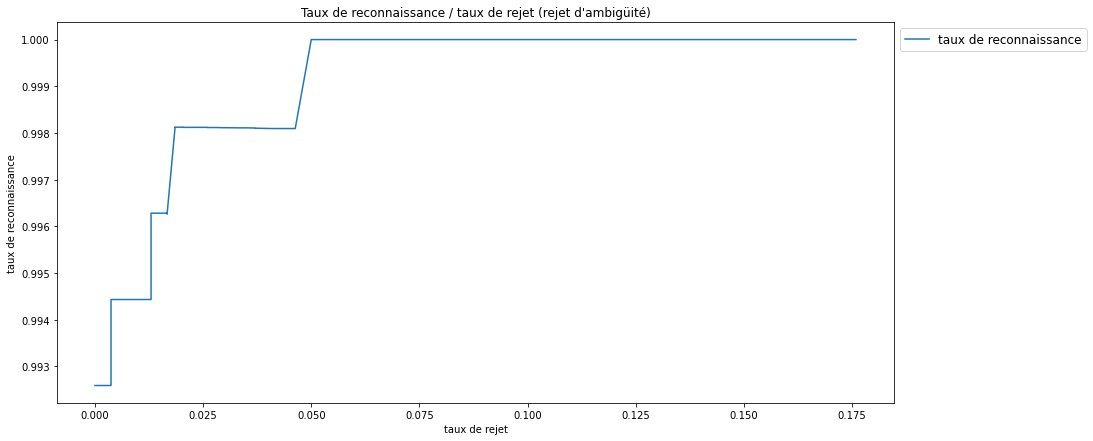

In [206]:
plt.figure(figsize=(15,7))
plt.title("Taux de reconnaissance / taux de rejet (rejet d'ambigüité)")
plt.ylabel('taux de reconnaissance')
plt.xlabel('taux de rejet')
plt.plot(arrayTauxRejet2,arrayTauxReconnaissance2,label="taux de reconnaissance")
#plt.plot(np.arange(0, 1, 0.01),arrayTauxRejet,label="taux de rejet")
#plt.plot(range(1,100),knnClassificationTime,label="Temps de classification")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5, fontsize = 'large');

## c) Conclusion

In [233]:
# Calculons a partir de quel seuil, au moins un exemple est rejeté.
iminRejet = 0
while arrayTauxRejet[iminRejet] == 0:
    iminRejet+= 1

iminAmbiguite = 0
while arrayNbRejete2[iminAmbiguite] == 0:
    iminAmbiguite+= 1
#print([arrayExBienClasse[i]/arrayNbRejete[i] for i in range(iminRejet,100)].index(max([arrayExBienClasse[i]/arrayNbRejete[i] for i in range(iminRejet,100)]))+ iminRejet)
#print([arrayExBienClasse2[i]/arrayNbRejete2[i] for i in range(iminAmbiguite,100)].index(max([arrayExBienClasse[i]/arrayNbRejete[i] for i in range(iminAmbiguite,100)])) + iminAmbiguite)
print("le meilleur score pour le rejet par distance est :", max([arrayExBienClasse[i]/arrayNbRejete[i] for i in range(iminRejet,100)]))
print("le meilleur score pour le rejet par distance est :", max([arrayExBienClasse2[i]/arrayNbRejete2[i] for i in range(iminAmbiguite,100)]))

le meilleur score pour le rejet par distance est : 536.0
le meilleur score pour le rejet par distance est : 536.0


### Ce résultat nous apprends que dans notre cas, les erreurs ne sont pas distribuées de façon à ce qu'aucun de ces méthodes ne permette d'améliorer l'efficacité du modèle selon la formule du cours (meilleur  rapport  #exemples  bien  classés  /  #exemples rejetés). En d'autre termes, les premiers exemples rejettés nes sont pas ceux qui sont mal classés, ce qui est donc contreproductif. Et le d'éxemple rejetés est toujours trop grand par rapport au nombre d'erreurs évitées
### Pour autant, cela ne nous empèche pas de voir que pour nous, si nous devions réduire le nombre d'exemple classés de façon érronnée, la meilleure méthode serait celle de la distance. Car avec un taux de rejet de seulement 3.5% environ, nous arriverions à n'avoir aucune erreur de classification sur notre dataset de test.

# 5. Cascade de classifieurs
## Comme expliqué plus haut, étant donné que notre résultat ne semble pas bénéficier d'une amélioration avec un rejet, nous allons choisir un seuil de façon arbitraire afin de continuer le TD.

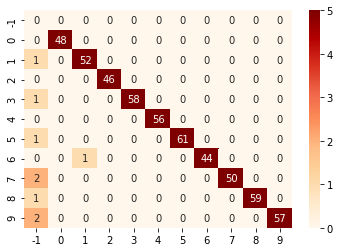

In [317]:
#yPredRej = argmax_reject_threshold(clfCV2[clfCVResultsTest2.index(max(clfCVResultsTest2))].predict(X_test),0.6)

yp=clfCV2[clfCVResultsTest2.index(max(clfCVResultsTest2))].predict_proba(X_test)
etage1 = argmax_reject_threshold(yp, 0.8)
matriceConfusionEtage1 = metrics.confusion_matrix(y_test,etage1)
sn.heatmap(matriceConfusionEtage1, annot=True,cmap="OrRd",vmax = 5,xticklabels = range(-1,10),yticklabels = range(-1,10));

## On remarque qu'avec un seuil à 0.8, sur les 4 erreurs, il n'y en a plus qu'une qui est classée, les autres sont rejetées aux côtés de 5 données qui auraient été bien classées. 



In [333]:
yKNN = knnModels[0] # le modèle qui a eu le meilleur score
etage2 = np.copy(etage1)
for i in range(len(etage1)):
    if etage1[i] == -1:
        etage2[i] = yKNN.predict([X_test[i]]).item(0)
        

## Nous remarquons que les éléments rejetés on bien été remplacés par le KNN. Pour autant, sur les 8 éléments rejetés seul 5 ont été bien placés, et évidement, cela n'a pas eu d'incidence sur l'élément qui n'a pas été rejeté 

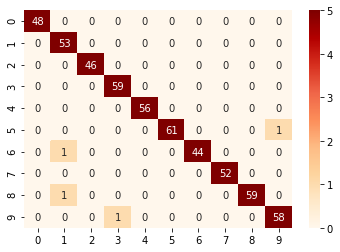

In [334]:
matriceConfusionEtage2 = metrics.confusion_matrix(y_test,etage2)
sn.heatmap(matriceConfusionEtage2, annot=True,cmap="OrRd",vmax = 5);

## Taux d'erreur global pour les deux étages: (taux d'éléments non classés plus éléments mal classés)

In [324]:
ErreursEtage1 = 0
for element in range(len(etage1)):
    if etage1[element] != y_test[element]:
        ErreursEtage1 += 1
        
ErreursEtage2 = 0
for element in range(len(etage2)):
    if etage2[element] != y_test[element]:
        ErreursEtage2 += 1
print("Le taux d'erreur de l'étage 1 est de : ",ErreursEtage1/len(y_test)*100 ,"% , celui de l'étage 2 est de :",ErreursEtage2/len(y_test) * 100,"%")
        

Le taux d'erreur de l'étage 1 est de :  1.6666666666666667 % , celui de l'étage 2 est de : 0.7407407407407408 %


## On remarque que la cascade permet de réduire fortement le taux d'erreur global, de plus on peut imaginer que dans d'autres cas, la cascade permet de donner une deuxième chance pour la classification d'un exemple, quand le premier algorithme n'est par exemple pas très précis pour classifier certains exemples spéciaux, dans le cas ou il y a un deuxième algorihtme qui lui est peut être mieux pour ces exemples. De plus, cela peut permettre de réduire le temps de classification, en utilisant un algorithme pour les exemples "faciles" et un deuxième plus lourd pour les exemples où il y a un doute.